# PREDICTION OF RENTAL PRICE OF APARTMENTS IN GERMANY



INTRODUCTION:

According to the 2021,World Economic Forum report more the 150 million people worldwide dosen't own a house,and majority of them find it convenient to rent a house or a building for living. Often the house owners alone decides the rent amount which can be sometimes over than the usual standards,and it can be hard on people who try to make a living. This project primarly addresses this issue of inconsitancy in apartment rental price decision,and helps to predict a fair rent amount based on LinearRegression Machine Learning model which is trained over a large amount of dataset related to apartment features and rent amount.As a first step of solving this problem The model is trained over the the data which is limited to Germany.

ABOUT THE DATA:

The dataset named 'Apartment rental offers in Germany' is choosen from kaggle. The raw dataset contains 286650 data points and 48 features which decides the rental prices for apartments. The dataset contains most of the important properties, such as living area size, the rent, both base rent as well as total rent, the location (street and house number, if available, ZIP code and state), type of energy etc. It also has two variables containing longer free text descriptions: description with a text describing the offer and facilities describing all available facilities, newest renovation etc. The date column was added to give the time of scraping.

EDA is done to gain insights about the dataset and to find answers to some basic questions like, Did rents increase over time? Which areas are the most expensive? Which areas saw the largest increase, which areas became cheaper? Are there any duplicates? How many? What could be gained from a text analysis of the free text variables?

FEATURES PRESENT IN THE DATASET


regio1: Bundesland

serviceCharge: Auxiliary costs such as electricty or internet [Euro]

heatingType: Type of heating

telekomTvOffer: Is payed TV included? If so, which offer?

telekomHybridUploadSpeed: How fast is the hybrid inter upload speed?

newlyConst: Is the building newly constructed?

balcony: Does the object have a balcony?

picturecount: How many pictures were uploaded to the listing?

pricetrend: Price trend as calculated by Immoscout

telekomUploadSpeed: How fast is the internet upload speed?

totalRent: Total rent (usually a sum of base rent, service charge and heating cost)

yearConstructed: Construction year

scoutId: Immoscout Id

noParkSpaces: Number of parking spaces

firingTypes: Main energy sources, separated by colon

hasKitchen: Has a kitchen

geo_bln: Same as regio1

cellar: Has a cellar

yearConstructedRange: Binned construction year, 1 to 9

baseRent: Base rent without electricity and heating

houseNumber: House number

livingSpace: Living space in sqm

geo_krs: District, above ZIP code

condition: Condition of the flat

interiorQual: Interior quality

petsAllowed: Are pets allowed, can be yes, no or negotiable

street: Street name

streetPlain: Street name (plain, different formating)

lift: Is elevator available

baseRentRange: Binned base rent, 1 to 9

typeOfFlat: Type of flat

geo_plz: ZIP code

noRooms: Number of rooms

thermalChar: Energy need in kWh/(m^2a), defines the energy efficiency class

floor: Which floor is the flat on

numberOfFloors: Number of floors in the building

noRoomsRange: Binned number of rooms, 1 to 5

garden: Has a garden

livingSpaceRange: Binned living space, 1 to 7

regio2: District or Kreis, same as geo krs

regio3: City/town

description: Free text description of the object

facilities: Free text description about available facilities

heatingCosts: Monthly heating costs in [Euro]

energyEfficiencyClass: Energy efficiency class (based on binned thermalChar, deprecated since Feb 2020)

lastRefurbish: Year of last renovation

electricityBasePrice: Monthly base price for electricity in € (deprecated since Feb 2020)

electricityKwhPrice: Electricity price per kwh (deprecated since Feb 2020)

date: Time of scraping

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from collections import Counter
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_absolute_error,mean_squared_error
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



2024-01-19 10:56:58.837412: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-19 10:56:58.887611: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 10:56:59.277132: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 10:56:59.281061: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 10:57:00.499592: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

DATA LOADING: The data which is available in the csv format is read and converted to pandas dataframe

In [2]:
data=pd.read_csv('/home/ashik/Downloads/datasets/immo_data.csv')
print(data.shape)

(268850, 49)


In [3]:
pd.set_option('display.max_columns',None)
data.head()

regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen         245.00                 central_heating   
1      Rheinland_Pfalz         134.00  self_contained_central_heating   
2              Sachsen         255.00                   floor_heating   
3              Sachsen          58.15                district_heating   
4               Bremen         138.00  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       NaN       False    False             6   
1  ONE_YEAR_FREE                       NaN       False     True             8   
2  ONE_YEAR_FREE                      10.0        True     True             8   
3  ONE_YEAR_FREE                       NaN       False     True             9   
4            NaN                       NaN       False     True            19   

   pricetrend  telekomUploadSpeed  totalRent  yearConstructed    scoutId  \
0        4.62                10.0      840.0           1965.0   96107057   
1        3.47                10.0        NaN           1871.0  111378734   
2        2.72                 2.4     1300.0           2019.0  113147523   
3        1.53                40.0        NaN           1964.0  108890903   
4        2.46                 NaN      903.0           1950.0  114751222   

   noParkSpaces       firingTypes  hasKitchen              geo_bln  cellar  \
0           1.0               oil       False  Nordrhein_Westfalen    True   
1           2.0               gas       False      Rheinland_Pfalz   False   
2           1.0               NaN       False              Sachsen    True   
3           NaN  district_heating       False              Sachsen   False   
4           NaN               gas       False               Bremen   False   

   yearConstructedRange  baseRent houseNumber  livingSpace  \
0                   2.0     595.0         244        86.00   
1                   1.0     800.0         NaN        89.00   
2                   9.0     965.0           4        83.80   
3                   2.0     343.0          35        58.15   
4                   1.0     765.0          10        84.97   

               geo_krs       condition   interiorQual petsAllowed  \
0             Dortmund       well_kept         normal         NaN   
1    Rhein_Pfalz_Kreis     refurbished         normal          no   
2              Dresden  first_time_use  sophisticated         NaN   
3  Mittelsachsen_Kreis             NaN            NaN         NaN   
4               Bremen     refurbished            NaN         NaN   

                        street                  streetPlain   lift  \
0   Sch&uuml;ruferstra&szlig;e              Schüruferstraße  False   
1               no_information                          NaN  False   
2                    Turnerweg                    Turnerweg   True   
3  Gl&uuml;ck-Auf-Stra&szlig;e             Glück-Auf-Straße  False   
4  Hermann-Henrich-Meier-Allee  Hermann-Henrich-Meier-Allee  False   

   baseRentRange    typeOfFlat  geo_plz  noRooms  thermalChar  floor  \
0              4  ground_floor    44269      4.0        181.4    1.0   
1              5  ground_floor    67459      3.0          NaN    NaN   
2              6     apartment     1097      3.0          NaN    3.0   
3              2         other     9599      3.0         86.0    3.0   
4              5     apartment    28213      3.0        188.9    1.0   

   numberOfFloors  noRoomsRange  garden  livingSpaceRange  \
0             3.0             4    True                 4   
1             NaN             3   False                 4   
2             4.0             3   False                 4   
3             NaN             3   False                 2   
4             NaN             3   False                 4   

                regio2                      regio3  \
0             Dortmund                     Schüren   
1    Rhein_Pfalz_Kreis              Böhl_Iggelh

In [3]:
data.tail()

regio1  serviceCharge      heatingType telekomTvOffer  \
268845               Bayern           90.0        heat_pump  ONE_YEAR_FREE   
268846               Hessen          220.0      gas_heating            NaN   
268847               Hessen          220.0  central_heating  ONE_YEAR_FREE   
268848  Nordrhein_Westfalen          175.0        heat_pump            NaN   
268849               Hessen          315.0  central_heating            NaN   

        telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
268845                       NaN       False     True             0   
268846                       NaN       False     True            12   
268847                       NaN       False     True            21   
268848                       NaN        True     True            16   
268849                       NaN       False     True             9   

        pricetrend  telekomUploadSpeed  totalRent  yearConstructed    scoutId  \
268845        2.74                10.0      910.0           2016.0  115641081   
268846        6.49                 NaN     1150.0           1983.0   96981497   
268847        2.90                40.0      930.0           1965.0   66924271   
268848        4.39                 NaN     1015.0           2019.0  110938302   
268849        5.00                 NaN        NaN           1972.0  115524054   

        noParkSpaces       firingTypes  hasKitchen              geo_bln  \
268845           1.0        geothermal       False               Bayern   
268846           1.0               gas        True               Hessen   
268847           1.0               gas       False               Hessen   
268848           1.0               gas       False  Nordrhein_Westfalen   
268849           1.0  district_heating        True               Hessen   

        cellar  yearConstructedRange  baseRent houseNumber  livingSpace  \
268845    True                   9.0     820.0         NaN         90.0   
268846   False                   4.0     930.0         NaN        115.0   
268847    True                   2.0     650.0          10         95.0   
268848    True                   9.0     840.0          58         70.0   
268849    True                   3.0     935.0           8         77.0   

                        geo_krs       condition   interiorQual petsAllowed  \
268845  Weilheim_Schongau_Kreis  mint_condition  sophisticated          no   
268846         Bergstraße_Kreis       well_kept  sophisticated  negotiable   
268847   Limburg_Weilburg_Kreis       well_kept            NaN  negotiable   
268848                     Köln  first_time_use  sophisticated          no   
268849        Frankfurt_am_Main      modernized            NaN         NaN   

                           street          streetPlain   lift  baseRentRange  \
268845             no_information                  NaN  False              6   
268846             no_information                  NaN  False              6   
268847             Emsbachstrasse       Emsbachstrasse  False              5   
268848            Idastra&szlig;e            Idastraße   True              6   
268849  Robert-Di&szlig;mann-Str.  Robert-Dißmann-Str.   True              6   

         typeOfFlat  geo_plz  noRooms  thermalChar  floor  numberOfFloors  \
268845  roof_storey    82390      3.0          NaN    NaN             NaN   
268846    apartment    68519      3.5          NaN    1.0             1.0   
268847    apartment    65552      4.0       160.77    1.0             2.0   
268848    apartment    51069      2.0        24.70    NaN             5.0   
268849    apartment    65936      3.0          NaN    NaN            13.0   

        noRoomsRange  garden  livingSpaceRange                   regio2  \
268845             3   False                 4  Weilheim_Schongau_Kreis   
268846             3   False                 5         Bergstraße_Kreis   
268847             4    True                 4   Limburg_Weilburg_Kreis   
268848             2   

In [4]:
data.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [3]:
data.describe().T

count          mean           std           min  \
serviceCharge             261941.0  1.512061e+02  3.082958e+02  0.000000e+00   
telekomHybridUploadSpeed   45020.0  1.000000e+01  0.000000e+00  1.000000e+01   
picturecount              268850.0  9.791958e+00  6.408399e+00  0.000000e+00   
pricetrend                267018.0  3.389001e+00  1.964874e+00 -1.233000e+01   
telekomUploadSpeed        235492.0  2.880493e+01  1.633715e+01  1.000000e+00   
totalRent                 228333.0  9.013315e+02  3.323833e+04  0.000000e+00   
yearConstructed           211805.0  1.966401e+03  4.699221e+01  1.000000e+03   
scoutId                   268850.0  1.069697e+08  1.250093e+07  2.887174e+07   
noParkSpaces               93052.0  1.327634e+00  8.361403e+00  0.000000e+00   
yearConstructedRange      211805.0  3.714544e+00  2.738134e+00  1.000000e+00   
baseRent                  268850.0  6.941294e+02  1.953602e+04  0.000000e+00   
livingSpace               268850.0  7.435555e+01  2.547592e+02  0.000000e+00   
baseRentRange             268850.0  3.765256e+00  2.214357e+00  1.000000e+00   
geo_plz                   268850.0  3.728302e+04  2.779804e+04  8.520000e+02   
noRooms                   268850.0  2.641261e+00  2.633440e+00  1.000000e+00   
thermalChar               162344.0  1.147495e+02  6.165366e+01  1.000000e-01   
floor                     217541.0  2.122405e+00  3.634934e+00 -1.000000e+00   
numberOfFloors            171118.0  3.572319e+00  6.375496e+00  0.000000e+00   
noRoomsRange              268850.0  2.571542e+00  9.375940e-01  1.000000e+00   
livingSpaceRange          268850.0  3.070790e+00  1.407127e+00  1.000000e+00   
heatingCosts               85518.0  7.699087e+01  1.477163e+02  0.000000e+00   
lastRefurbish              80711.0  2.013905e+03  1.096312e+01  1.015000e+03   
electricityBasePrice       46846.0  8.911361e+01  5.395805e+00  7.143000e+01   
electricityKwhPrice        46846.0  1.997693e-01  9.667084e-03  1.705000e-01   

                                   25%           50%           75%  \
serviceCharge             9.500000e+01  1.350000e+02  1.900000e+02   
telekomHybridUploadSpeed  1.000000e+01  1.000000e+01  1.000000e+01   
picturecount              6.000000e+00  9.000000e+00  1.300000e+01   
pricetrend                2.000000e+00  3.390000e+00  4.570000e+00   
telekomUploadSpeed        1.000000e+01  4.000000e+01  4.000000e+01   
totalRent                 4.698000e+02  6.500000e+02  9.850000e+02   
yearConstructed           1.950000e+03  1.973000e+03  1.996000e+03   
scoutId                   1.066910e+08  1.111584e+08  1.137688e+08   
noParkSpaces              1.000000e+00  1.000000e+00  1.000000e+00   
yearConstructedRange      1.000000e+00  3.000000e+00  5.000000e+00   
baseRent                  3.380000e+02  4.900000e+02  7.990000e+02   
livingSpace               5.400000e+01  6.732000e+01  8.700000e+01   
baseRentRange             2.000000e+00  3.000000e+00  5.000000e+00   
geo_plz                   9.128000e+03  3.866700e+04  5.707200e+04   
noRooms                   2.000000e+00  3.000000e+00  3.000000e+00   
thermalChar               7.900000e+01  1.070000e+02  1.403000e+02   
floor                     1.000000e+00  2.000000e+00  3.000000e+00   
numberOfFloors            2.000000e+00  3.000000e+00  4.000000e+00   
noRoomsRange              2.000000e+00  3.000000e+00  3.000000e+00   
livingSpaceRange          2.000000e+00  3.000000e+00  4.000000e+00   
heatingCosts              5.400000e+01  7.000000e+01  9.000000e+01   
lastRefurbish             2.012000e+03  2.017000e+03  2.019000e+03   
electricityBasePrice      9.076000e+01  9.076000e+01  9.076000e+01   
electricityKwhPrice       1.915000e-01  1.985000e-01  2.055000e-01   

                                   max  
serviceCharge             1.461180e+05  
telekomHybridUploadSpeed  1.000000e+01  
picturecount              1.210000e+02  
pricetrend                1.492000e+01  
telekomUploadSpeed        1.000000e+02  
totalRent                 1.575

In [3]:
data.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

Dropping the Duplicate values if any

In [3]:
data.drop_duplicates(inplace=True,ignore_index=True)
print(data.shape)

(268850, 49)


In [4]:
total = data.isna().sum().sort_values(ascending=False)
percent = ((data.isna().sum().sort_values(ascending=False)/data.shape[0])*100).round(0).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_missing', 'Percentage_of_missing(%)'])
missing_data

Total_missing  Percentage_of_missing(%)
telekomHybridUploadSpeed         223830                      83.0
electricityKwhPrice              222004                      83.0
electricityBasePrice             222004                      83.0
energyEfficiencyClass            191063                      71.0
lastRefurbish                    188139                      70.0
heatingCosts                     183332                      68.0
noParkSpaces                     175798                      65.0
petsAllowed                      114573                      43.0
interiorQual                     112665                      42.0
thermalChar                      106506                      40.0
numberOfFloors                    97732                      36.0
houseNumber                       71018                      26.0
streetPlain                       71013                      26.0
condition                         68489                      25.0
yearConstructed                   57045                      21.0
yearConstructedRange              57045                      21.0
firingTypes                       56964                      21.0
facilities                        52924                      20.0
floor                             51309                      19.0
heatingType                       44856                      17.0
totalRent                         40517                      15.0
typeOfFlat                        36614                      14.0
telekomUploadSpeed                33358                      12.0
telekomTvOffer                    32619                      12.0
description                       19747                       7.0
serviceCharge                      6909                       3.0
pricetrend                         1832                       1.0
regio3                                0                       0.0
regio2                                0                       0.0
livingSpaceRange                      0                       0.0
garden                                0                       0.0
noRoomsRange                          0                       0.0
regio1                                0                       0.0
noRooms                               0                       0.0
geo_plz                               0                       0.0
baseRentRange                         0                       0.0
lift                                  0                       0.0
street                                0                       0.0
geo_krs                               0                       0.0
livingSpace                           0                       0.0
baseRent                              0                       0.0
cellar                                0                       0.0
geo_bln                               0                       0.0
hasKitchen                            0                       0.0
scoutId                               0                       0.0
picturecount                          0                       0.0
balcony                               0                       0.0
newlyConst                            0                       0.0
date                                  0                       0.0

Data contains lots of missing values, So we have to drop the features that contains missing values over than 25 persent of the data.

In [5]:

data = data.drop((missing_data[missing_data['Percentage_of_missing(%)'] > 25]).index,1) 
data.shape


/tmp/ipykernel_2465/2157678648.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



(268850, 36)

'totalRent' is our target variable and it contains about 15% missing values
Therefore removing those rows with missing values

In [6]:
data.dropna(subset=['totalRent'],inplace=True)
data.reset_index(drop=True,inplace=True)

data.shape

(228333, 36)

Analysing the counts of the unique values in categorical features

In [8]:
objects_cols=data.select_dtypes(include='object')
for col in objects_cols:
    print(f'Number of unique values in {col} : {data[col].nunique()}')
    print(data[col].value_counts())
    print('-'*100)

Number of unique values in regio1 : 16
Sachsen                   52170
Nordrhein_Westfalen       50759
Bayern                    18521
Sachsen_Anhalt            17747
Hessen                    14647
Baden_Württemberg         13380
Niedersachsen             12281
Berlin                     9744
Thüringen                  7337
Rheinland_Pfalz            6586
Brandenburg                6415
Mecklenburg_Vorpommern     5959
Schleswig_Holstein         5854
Hamburg                    3395
Bremen                     2517
Saarland                   1021
Name: regio1, dtype: int64
----------------------------------------------------------------------------------------------------
Number of unique values in heatingType : 13
central_heating                   109787
district_heating                   21310
gas_heating                        18270
floor_heating                      15662
self_contained_central_heating     14764
oil_heating                         4583
heat_pump                      

FINDINGS

1.column 'street' has about 48158 unique values and 54067 rows with no_information and dosen't help us in anyway
2.column 'description' and 'facilities' also dosen't help us much
3.column 'date' which is the date of scraping the data is not that helpfull.

so we can drop those columns

In [7]:
data.drop(['street','description','facilities','date'],axis=1,inplace=True)
data.shape

(228333, 32)

EXPLORATORY DATA ANALYSIS(EDA) AND DATA VISUALISATION

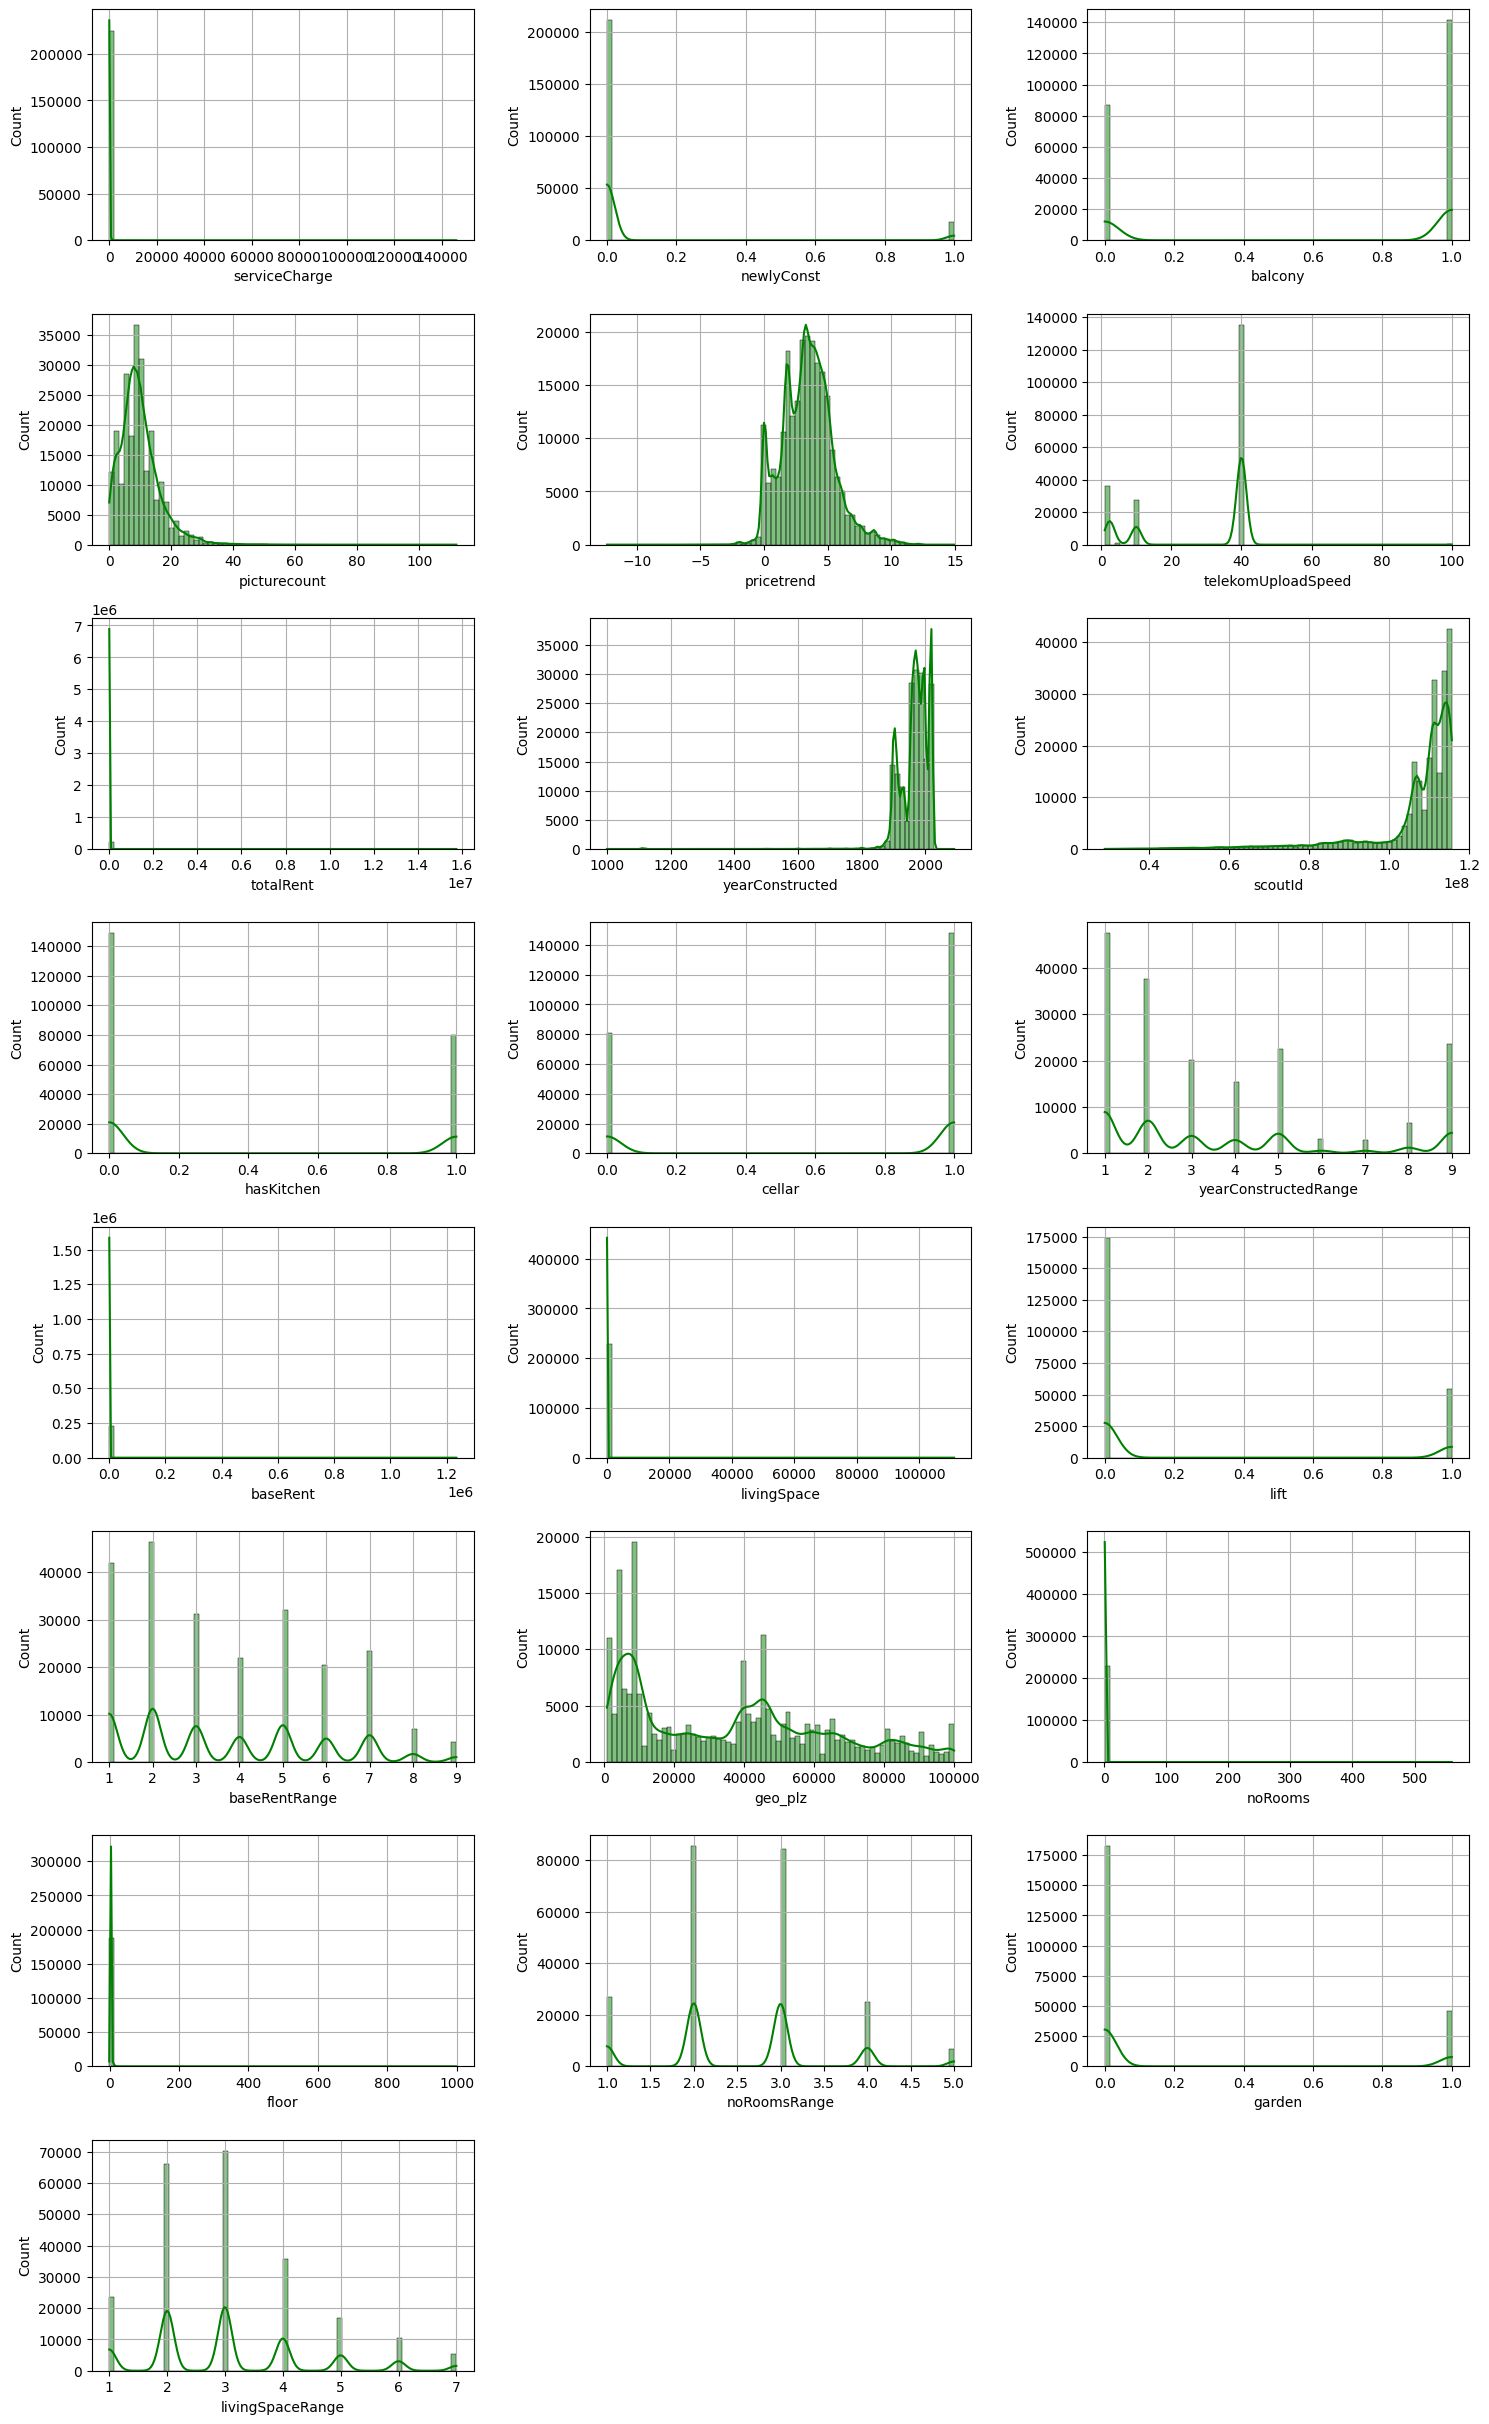

In [6]:
plt.figure(figsize=(15,30))
i=1
for feature in data.columns:
    if data[feature].dtype!='object':
        plt.subplot(10,3,i)
        sns.histplot(data=data,x=feature,bins=70,kde=True,color='green')
        i+=1
        plt.grid()
plt.tight_layout()        
plt.show()




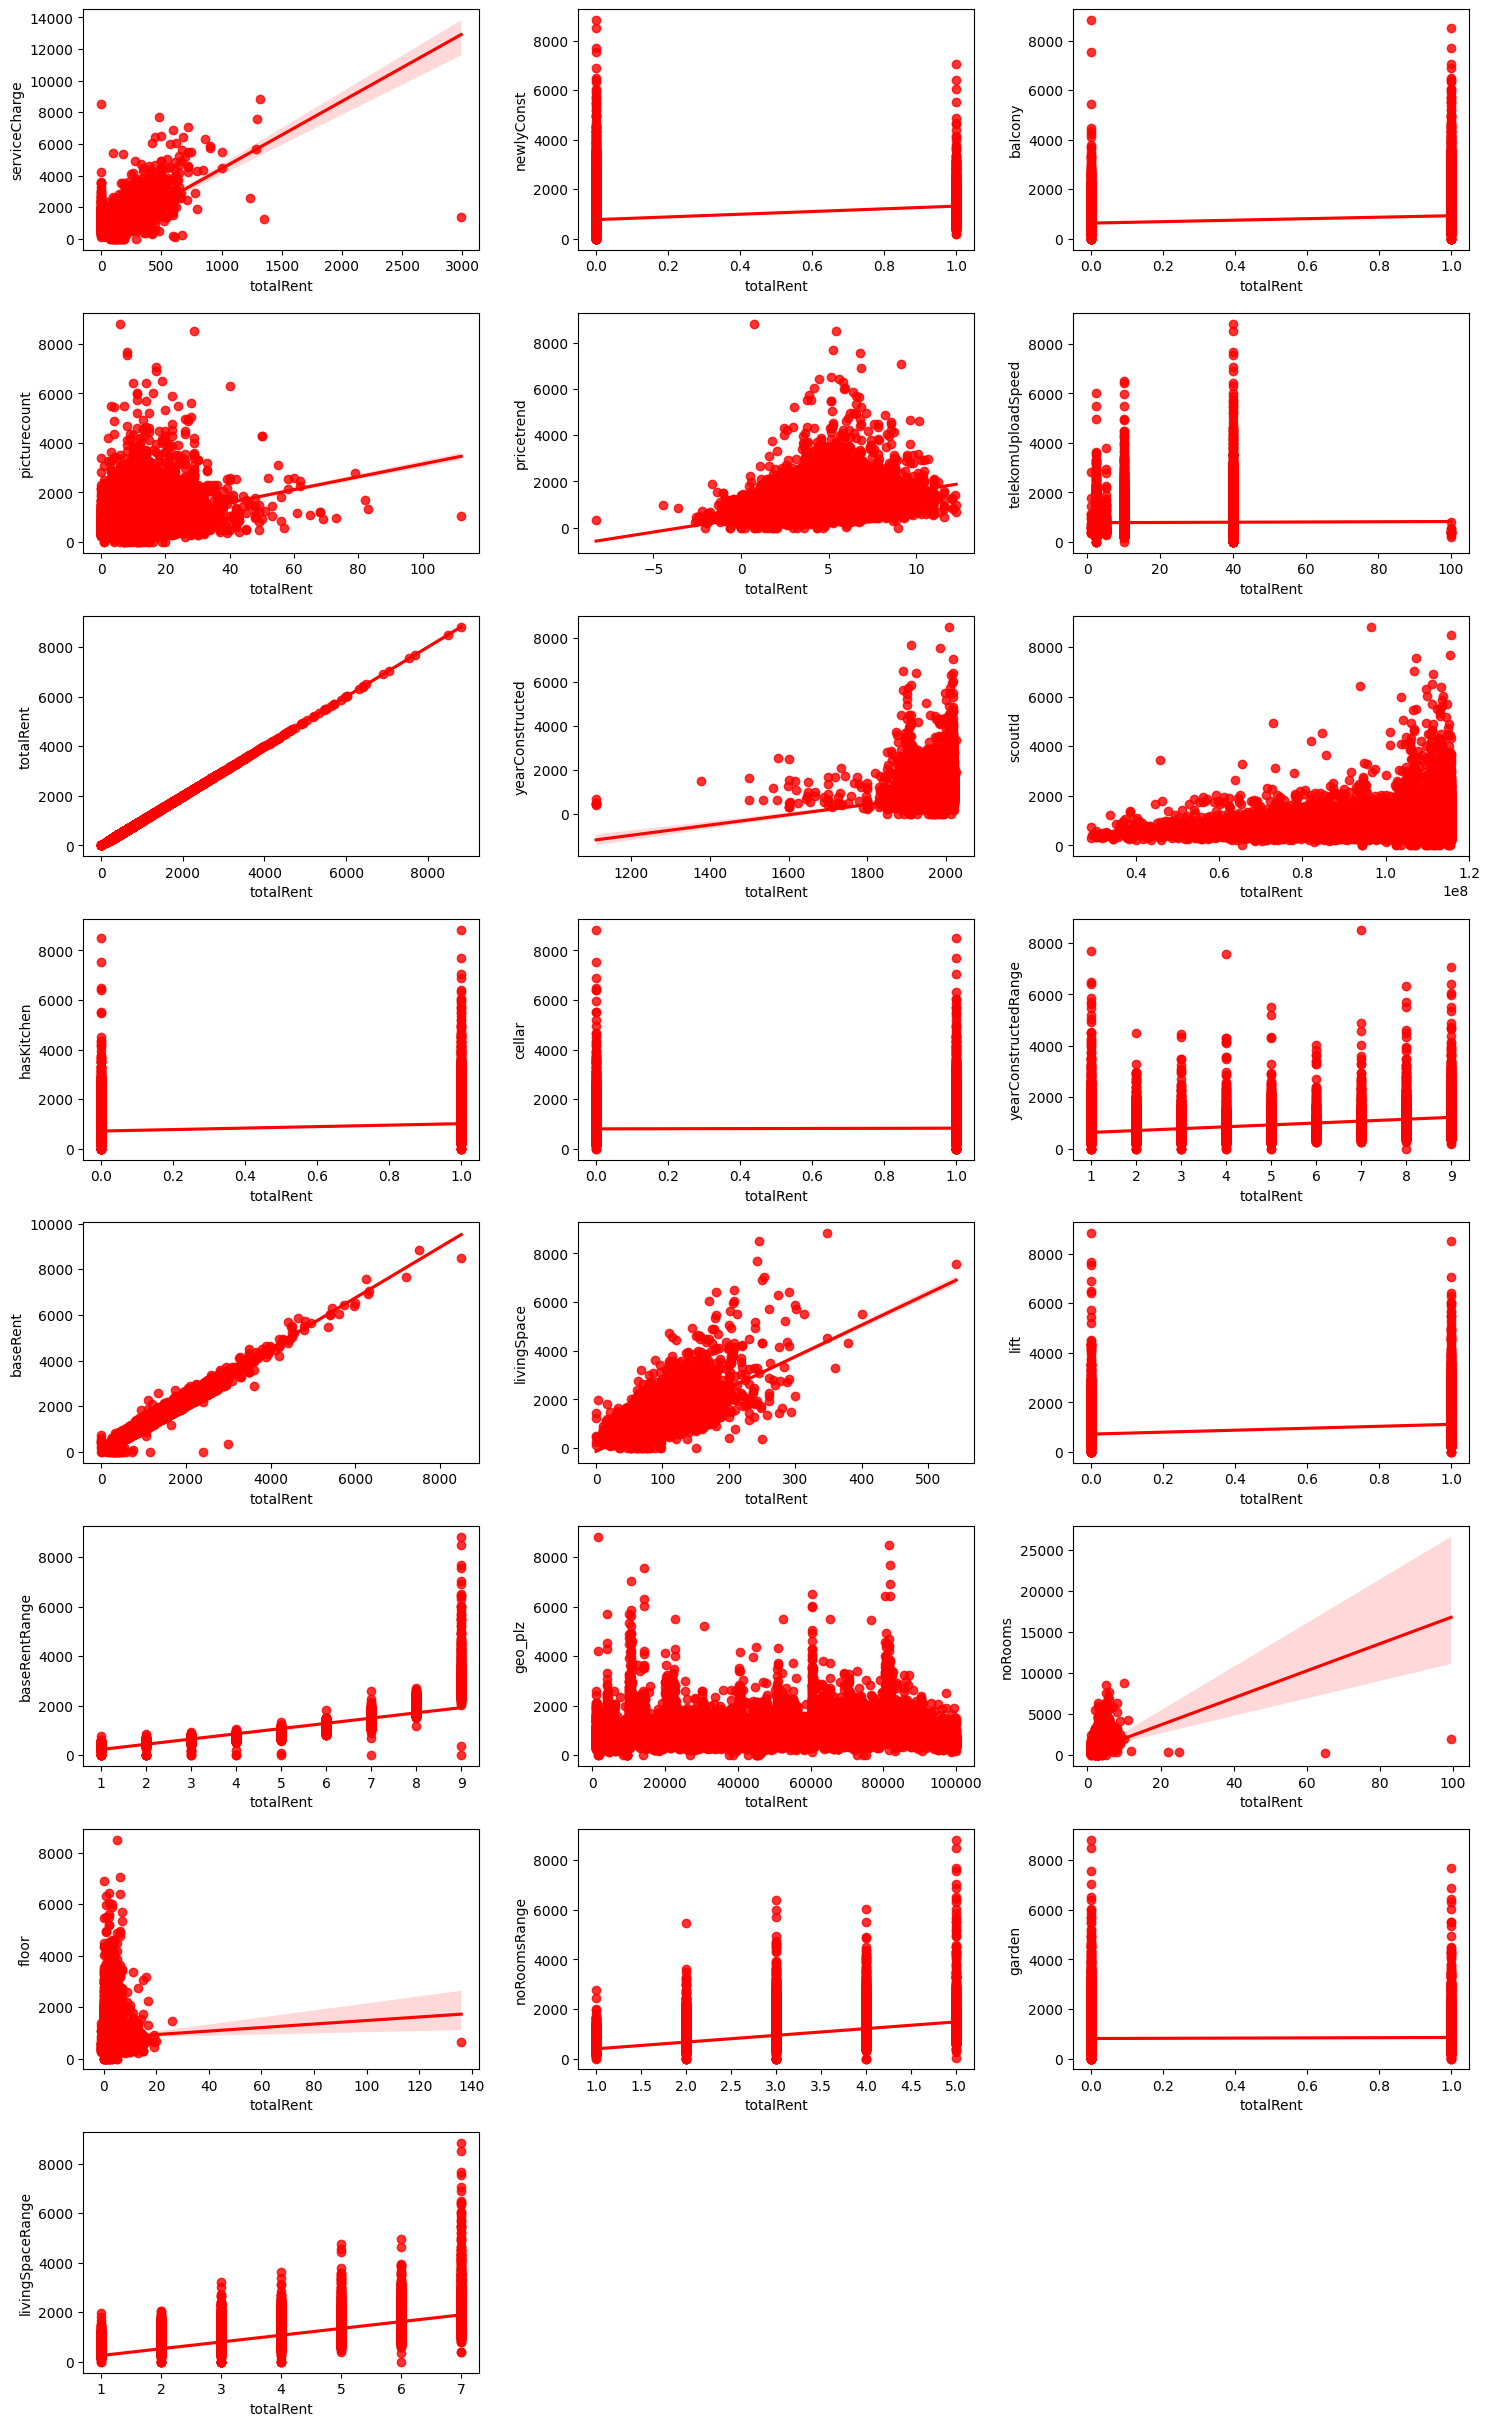

In [24]:

data_chunk=data.sample(frac=0.1)
plt.figure(figsize=(15,30))
i=1
for feature in data_chunk.columns:
    if data_chunk[feature].dtype!='object':
        plt.subplot(10,3,i)
        sns.regplot(x=data_chunk[feature],y=data_chunk['totalRent'],color='red')
        plt.xlabel('totalRent')
        plt.ylabel(feature)
        i+=1
plt.tight_layout()          
plt.show()

In [8]:

os.environ['SHAPE_RESTORE_SHX']='YES'


# import the shapefile
germany_map = gpd.read_file('/home/ashik/Downloads/datasets/shape/plz-5stellig.dbf')


germany_map.head()



plz                            note  einwohner        qkm  \
0  81248                  81248 MÃ¼nchen        121   1.984763   
1  60315  60315 Frankfurt am Main (FOUR)          0   0.017481   
2  24988                  24988 Oeversee       3350  36.491463   
3  93185         93185 Michelsneukirchen       1786  32.873844   
4  93489                93489 Schorndorf       2622  38.597260   

                                            geometry  
0  POLYGON ((11.39468 48.14729, 11.39490 48.14780...  
1  POLYGON ((8.67254 50.11264, 8.67259 50.11264, ...  
2  POLYGON ((9.36585 54.69994, 9.36683 54.70014, ...  
3  POLYGON ((12.47666 49.13598, 12.47702 49.13637...  
4  POLYGON ((12.54904 49.19318, 12.54953 49.19371...

Finding some of the densely populated areas in germany in terms of geographical postal code

In [10]:
cities=germany_map['note'].str.replace(r'\d+','')
cities

/tmp/ipykernel_2465/4025176490.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



0                        MÃ¼nchen
1        Frankfurt am Main (FOUR)
2                        Oeversee
3               Michelsneukirchen
4                      Schorndorf
                  ...            
8165                     Dammbach
8166                   Bessenbach
8167               HeigenbrÃ¼cken
8168            HÃ¶fen an der Enz
8169                   Euskirchen
Name: note, Length: 8170, dtype: object

In [11]:

postal_counts=Counter(cities)

sorted_counts=sorted(postal_counts.items(),key=lambda x:x[1],reverse=True)
sorted_counts

[(' Hamburg', 99),
 (' MÃ¼nchen', 75),
 (' KÃ¶ln', 45),
 (' Frankfurt am Main', 38),
 (' DÃ¼sseldorf', 37),
 (' Leipzig', 34),
 (' Stuttgart', 34),
 (' Bremen', 33),
 (' Essen', 32),
 (' Dresden', 29),
 (' NÃ¼rnberg', 28),
 (' Hannover', 28),
 (' Dortmund', 27),
 (' Duisburg', 25),
 (' Wuppertal', 23),
 (' Bochum', 18),
 (' Chemnitz', 18),
 (' Bielefeld', 18),
 (' Bonn', 17),
 (' Berlin', 17),
 (' SaarbrÃ¼cken', 16),
 (' Kiel', 15),
 (' MÃ¼nster', 15),
 (' Magdeburg', 14),
 (' Erfurt', 14),
 (' Wiesbaden', 14),
 (' Braunschweig', 14),
 (' Mannheim', 14),
 (' Augsburg', 14),
 (' MÃ¶nchengladbach', 13),
 (' Karlsruhe', 13),
 (' Gelsenkirchen', 12),
 (' Halle/ Saale', 12),
 (' Freiburg im Breisgau', 12),
 (' Kassel', 11),
 (' Krefeld', 11),
 (' Mainz', 10),
 (' Cottbus', 10),
 (' Aachen', 10),
 (' Hagen', 9),
 (' MÃ¼lheim an der Ruhr', 9),
 (' LÃ¼beck', 9),
 (' Herne', 9),
 (' OsnabrÃ¼ck', 9),
 (' Berlin Charlottenburg', 9),
 (' Oberhausen', 9),
 (' Hamm', 9),
 (' Wetzlar', 9),
 (' Dillen

Choosing the top 4 cities from the above list

In [12]:
hamburg = germany_map[germany_map['note'].str.endswith('Hamburg')]
munich = germany_map[germany_map['note'].str.endswith('MÃ¼nchen')]
koln = germany_map[germany_map['note'].str.endswith('KÃ¶ln')]
frankfurt = germany_map[germany_map['note'].str.endswith('Frankfurt am Main')]

hamburg


plz           note  einwohner        qkm  \
1971  22089  22089 Hamburg      19734   1.775989   
1985  20255  20255 Hamburg      13770   0.703937   
2508  22559  22559 Hamburg      14638  16.466210   
2550  22047  22047 Hamburg      16747   3.313129   
2551  22041  22041 Hamburg      14620   3.005530   
...     ...            ...        ...        ...   
7929  21129  21129 Hamburg      17415  61.915526   
7961  20146  20146 Hamburg      10420   0.931521   
7962  20148  20148 Hamburg       5236   1.166056   
8048  21147  21147 Hamburg      19824  15.501663   
8049  21149  21149 Hamburg      22917  18.213139   

                                               geometry  
1971  POLYGON ((10.03143 53.56608, 10.03185 53.56627...  
1985  POLYGON ((9.94092 53.58167, 9.94115 53.58211, ...  
2508  POLYGON ((9.73012 53.55764, 9.73227 53.56140, ...  
2550  POLYGON ((10.07822 53.58692, 10.07836 53.58719...  
2551  POLYGON ((10.05787 53.57476, 10.05831 53.57474...  
...                                                 ...  
7929  POLYGON ((9.76358 53.50826, 9.76361 53.50832, ...  
7961  POLYGON ((9.97005 53.56731, 9.97086 53.56765, ...  
7962  POLYGON ((9.98645 53.57112, 9.98799 53.57140, ...  
8048  POLYGON ((9.79850 53.47513, 9.79874 53.47556, ...  
8049  POLYGON ((9.79981 53.46943, 9.79982 53.46952, ...  

[99 rows x 5 columns]

/home/ashik/luminar_python/DS/luminarenv/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2465/843777156.py:18: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_2465/843777156.py:19: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




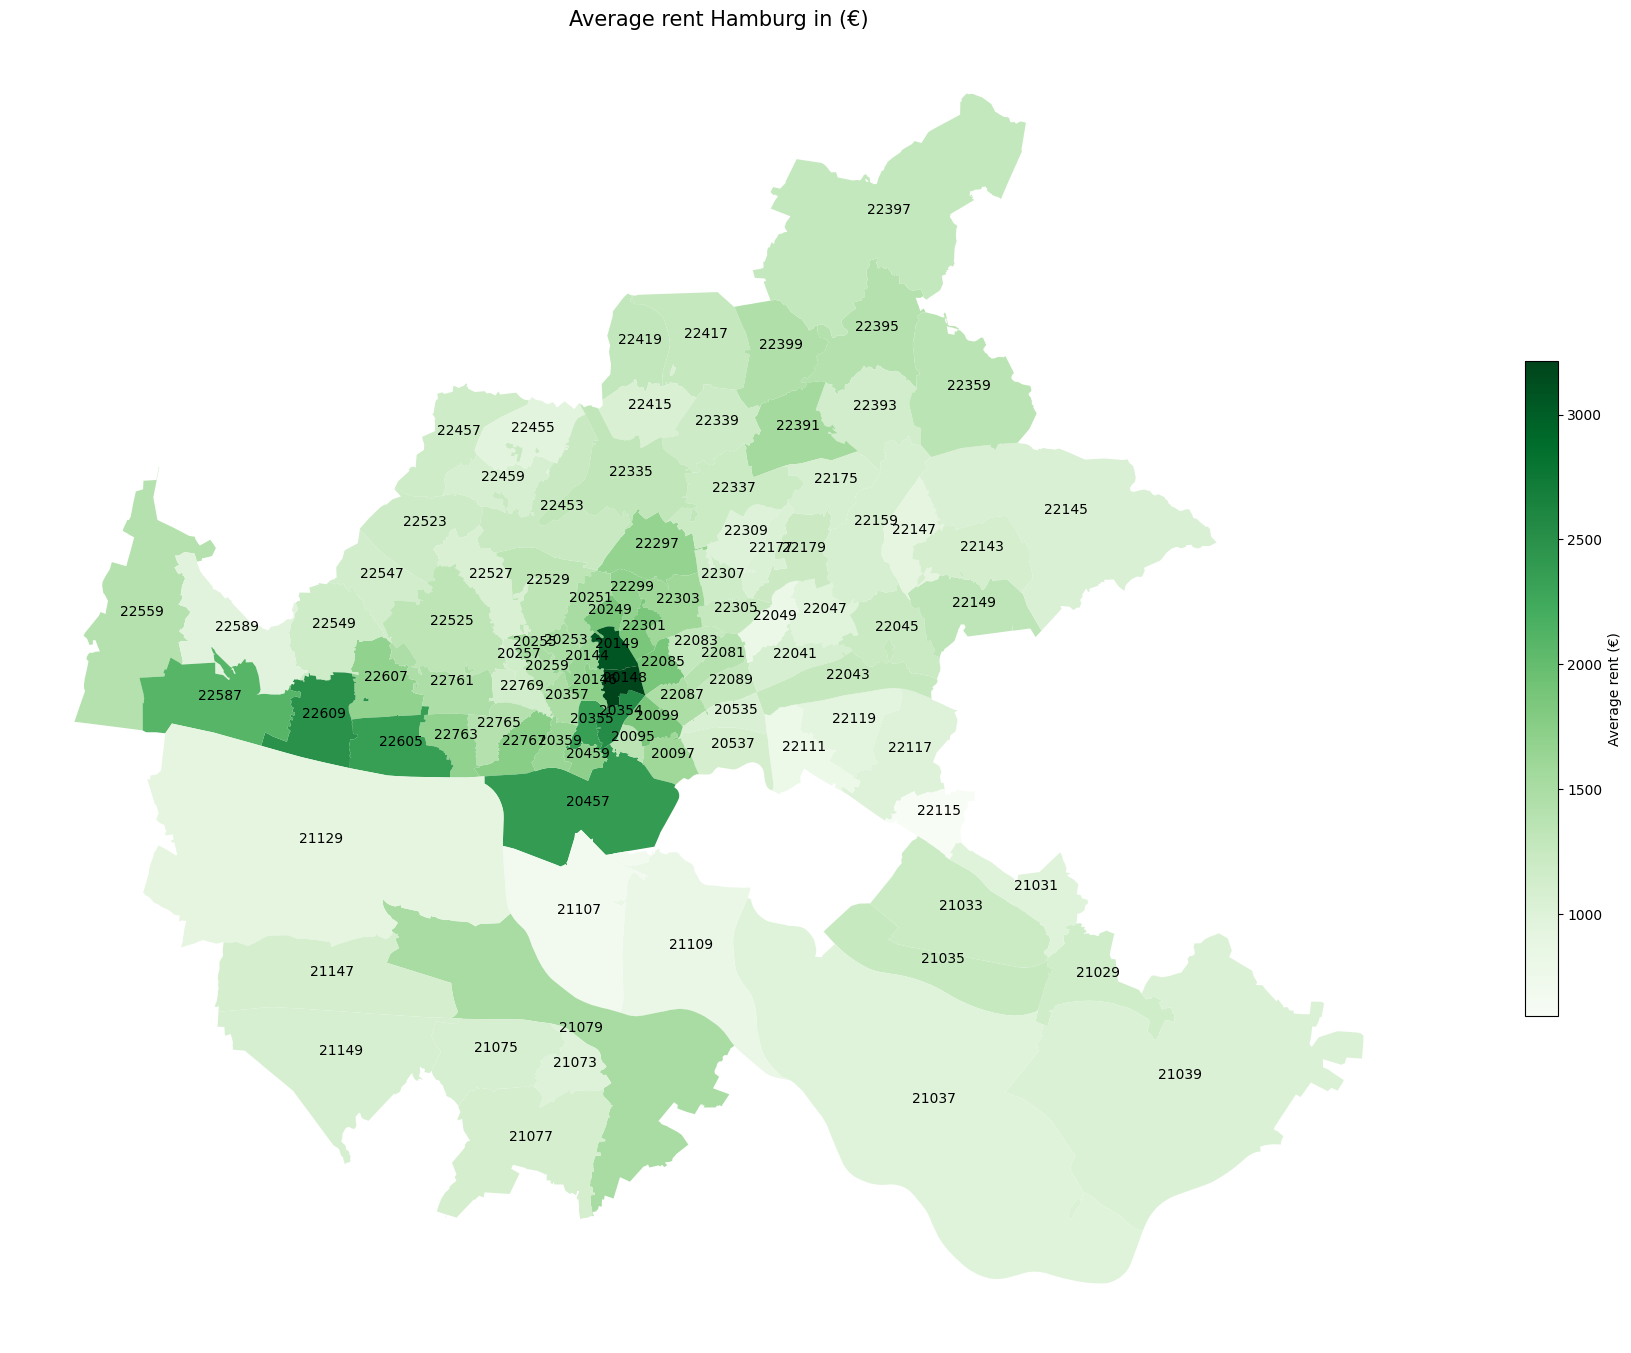

/home/ashik/luminar_python/DS/luminarenv/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2465/843777156.py:18: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_2465/843777156.py:19: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




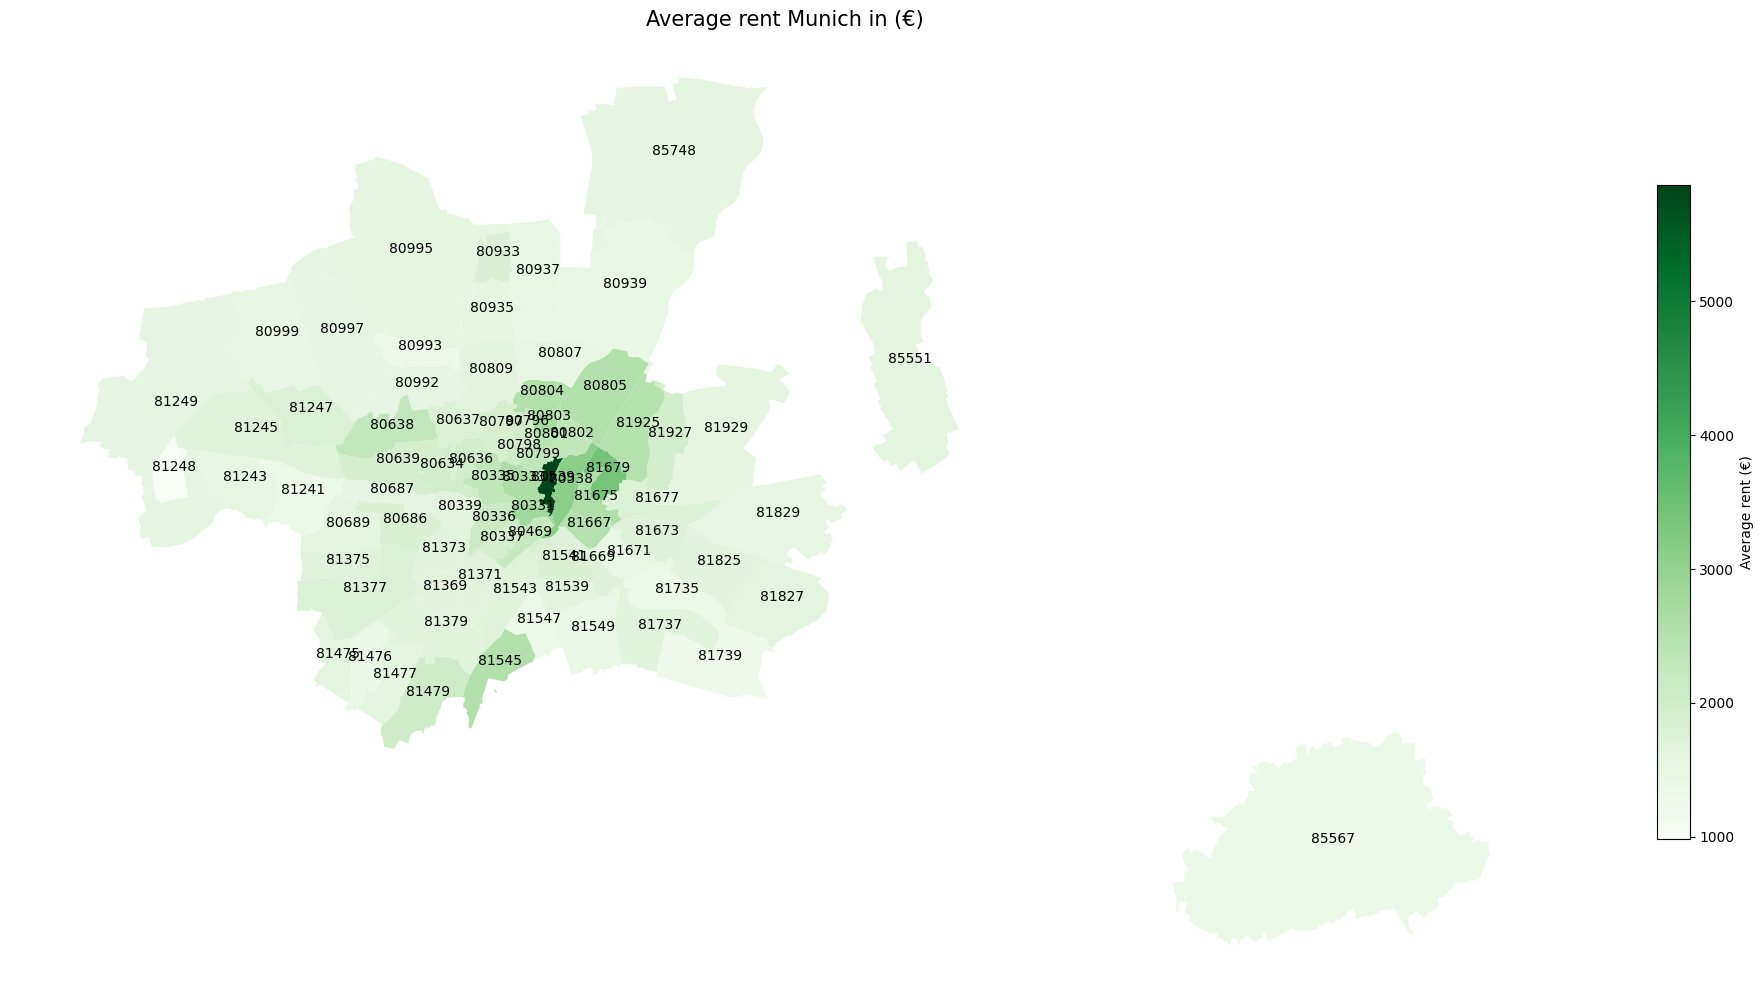

/home/ashik/luminar_python/DS/luminarenv/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2465/843777156.py:18: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_2465/843777156.py:19: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




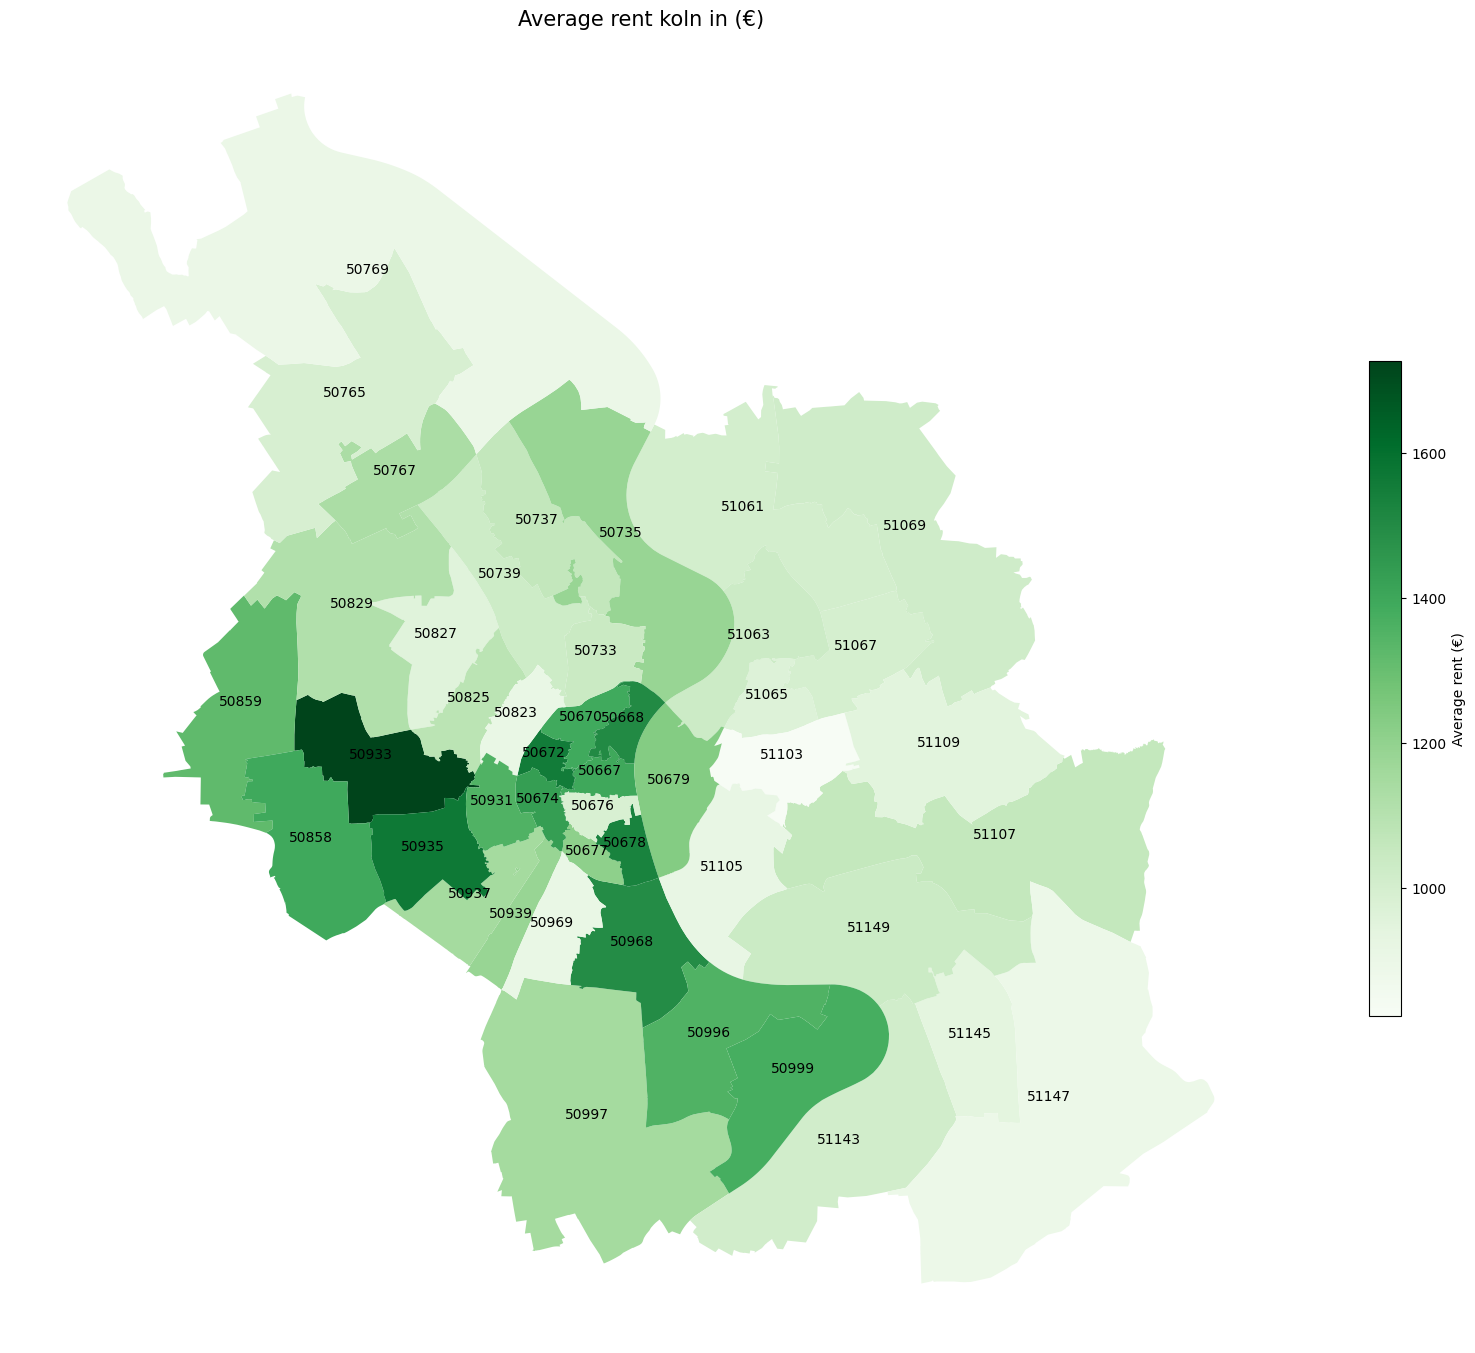

/home/ashik/luminar_python/DS/luminarenv/lib/python3.8/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2465/843777156.py:18: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_2465/843777156.py:19: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




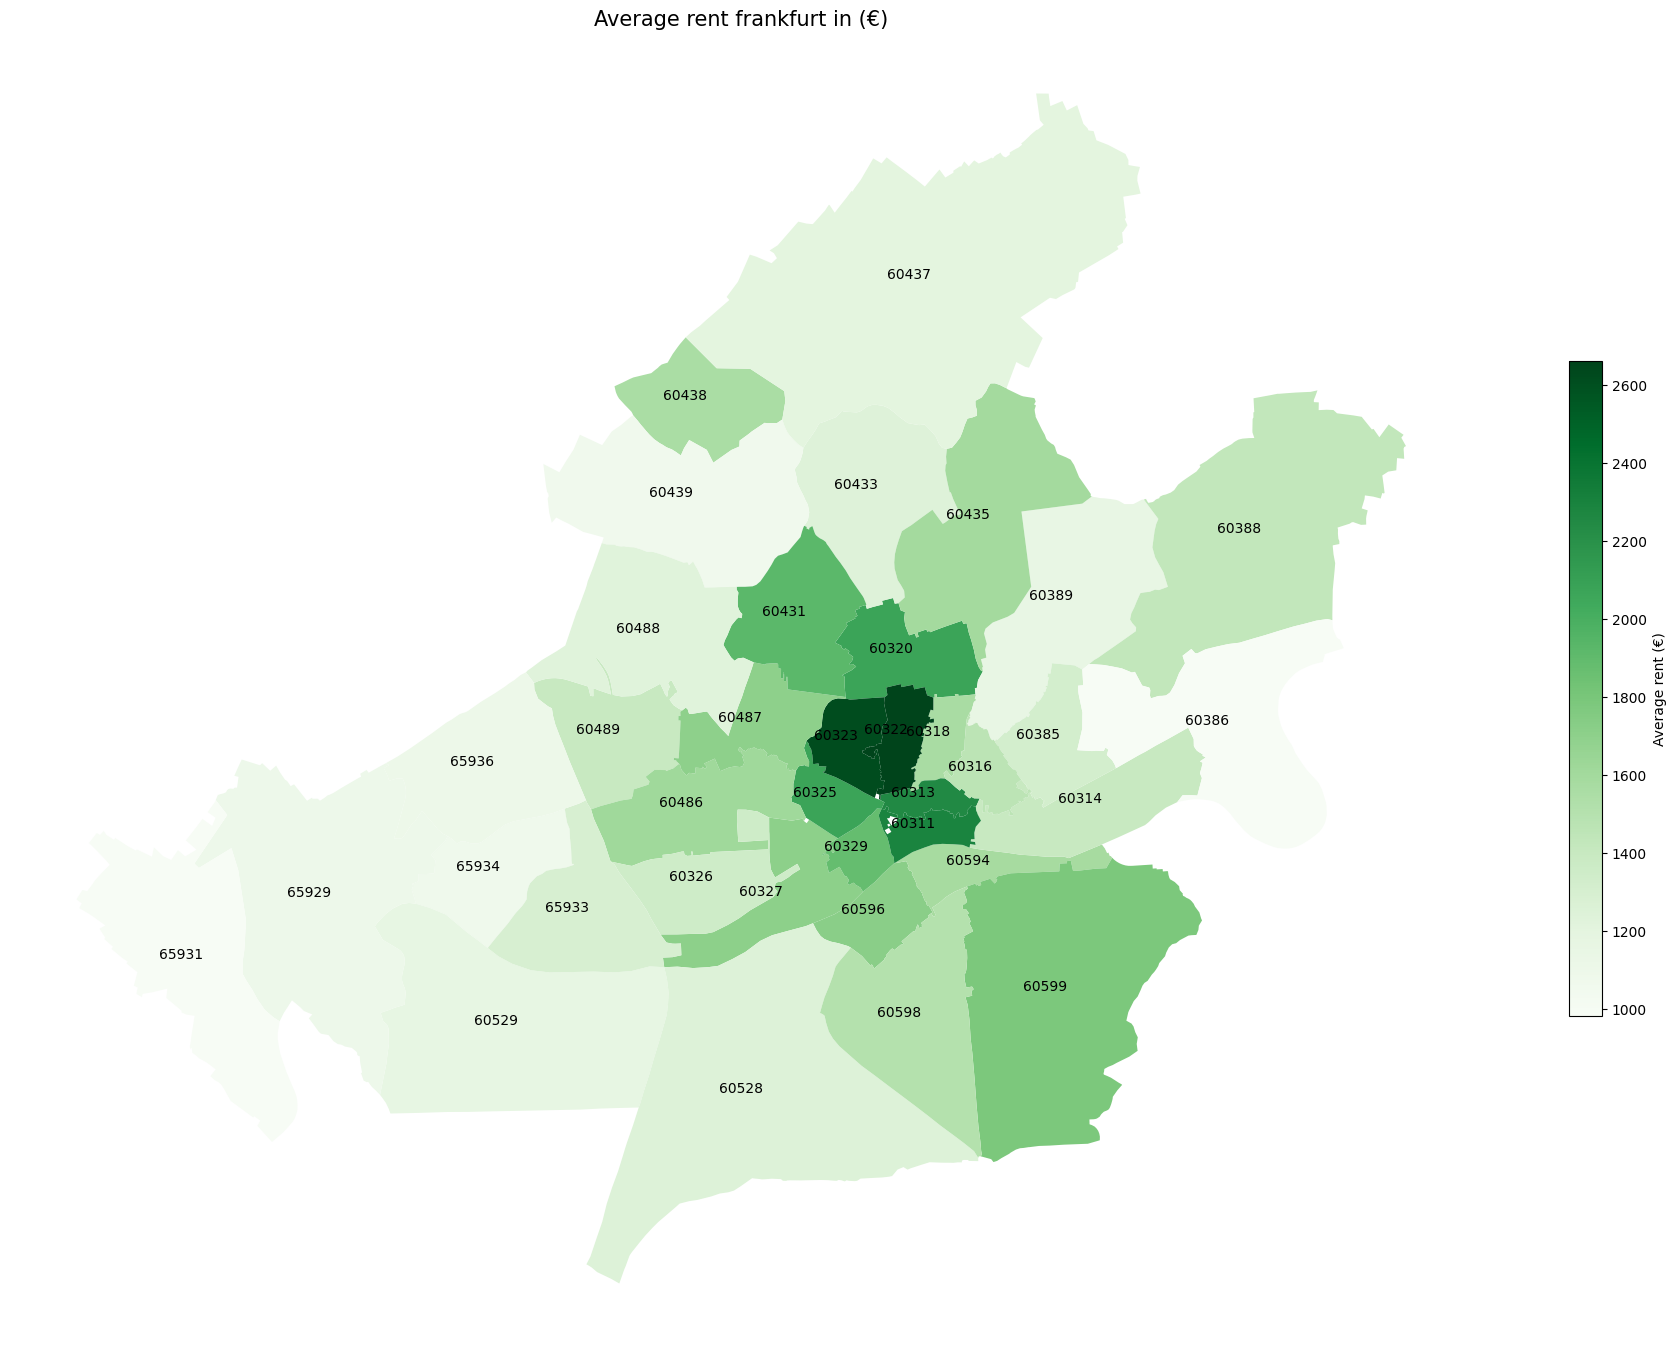

In [13]:
# get the average rent by plz and plot the map
areas=[[hamburg,'Hamburg'],[munich,'Munich'],[koln,'koln'],[frankfurt,'frankfurt']]

for area in areas:

        total_rent_avg_by_plz = data.groupby('geo_plz')['totalRent'].mean().reset_index()

        total_rent_avg_by_plz['geo_plz']=total_rent_avg_by_plz['geo_plz'].astype(int)
        area[0]['plz']=area[0]['plz'].astype(int)
        
        gdat_total_rent_avg_by_plz = area[0].merge(total_rent_avg_by_plz, left_on="plz", right_on="geo_plz")


        gdat_total_rent_avg_by_plz.plot(column='totalRent', figsize=(25, 17), cmap='Greens', legend=True, 
                legend_kwds={'label': "Average rent (€)", 'orientation': "vertical", 'shrink': 0.5})

        # add text of plz on the map
        for x, y, label in zip(gdat_total_rent_avg_by_plz.geometry.centroid.x, 
                        gdat_total_rent_avg_by_plz.geometry.centroid.y, 
                        gdat_total_rent_avg_by_plz['plz']):
                plt.annotate(label, xy=(x-.01, y), xytext=(2, 2), textcoords="offset points")

        plt.axis('off')
        plt.title(f'Average rent {area[1]} in (€)', fontsize=15)
        plt.show()
        

/tmp/ipykernel_2379/3890002325.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(offers_by_plz.geometry.centroid.x,
/tmp/ipykernel_2379/3890002325.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  offers_by_plz.geometry.centroid.y,


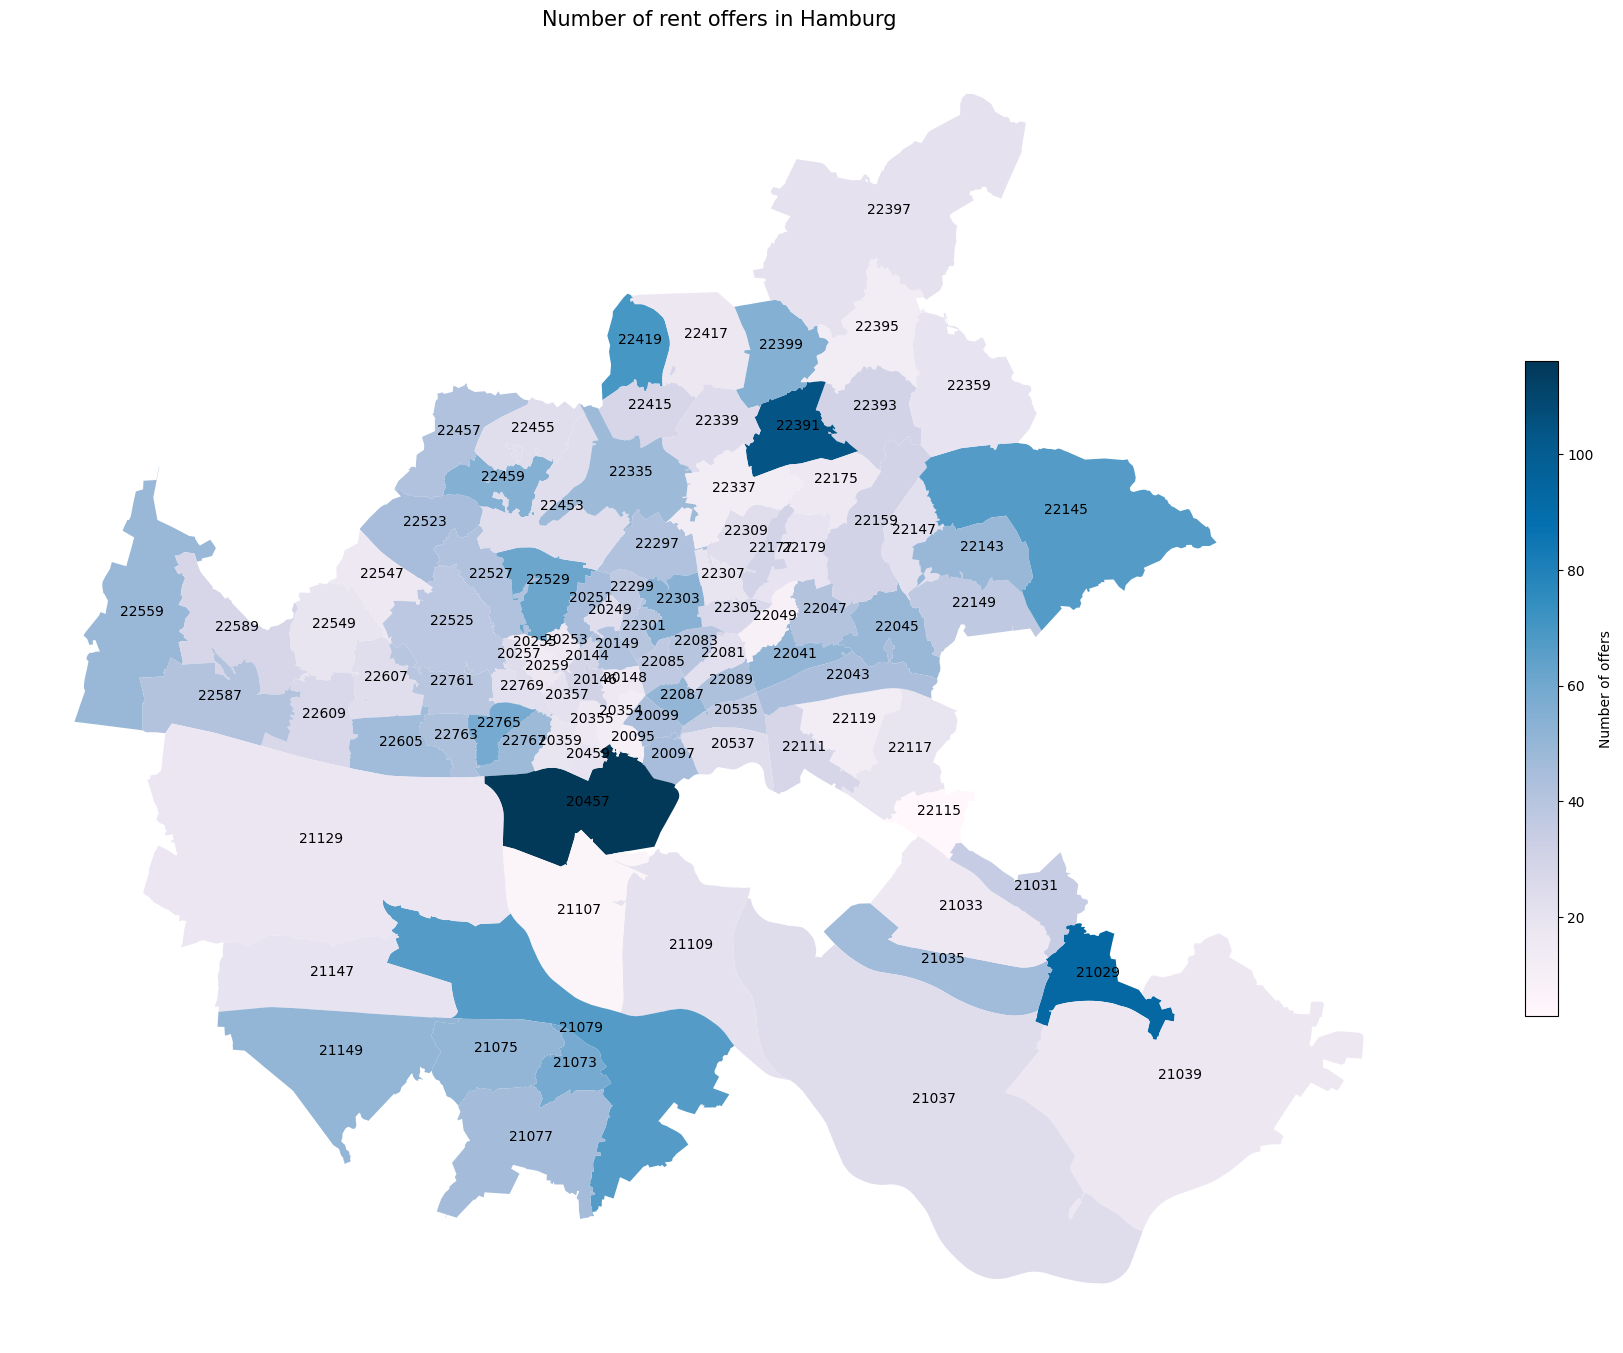

/tmp/ipykernel_2379/3890002325.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(offers_by_plz.geometry.centroid.x,
/tmp/ipykernel_2379/3890002325.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  offers_by_plz.geometry.centroid.y,


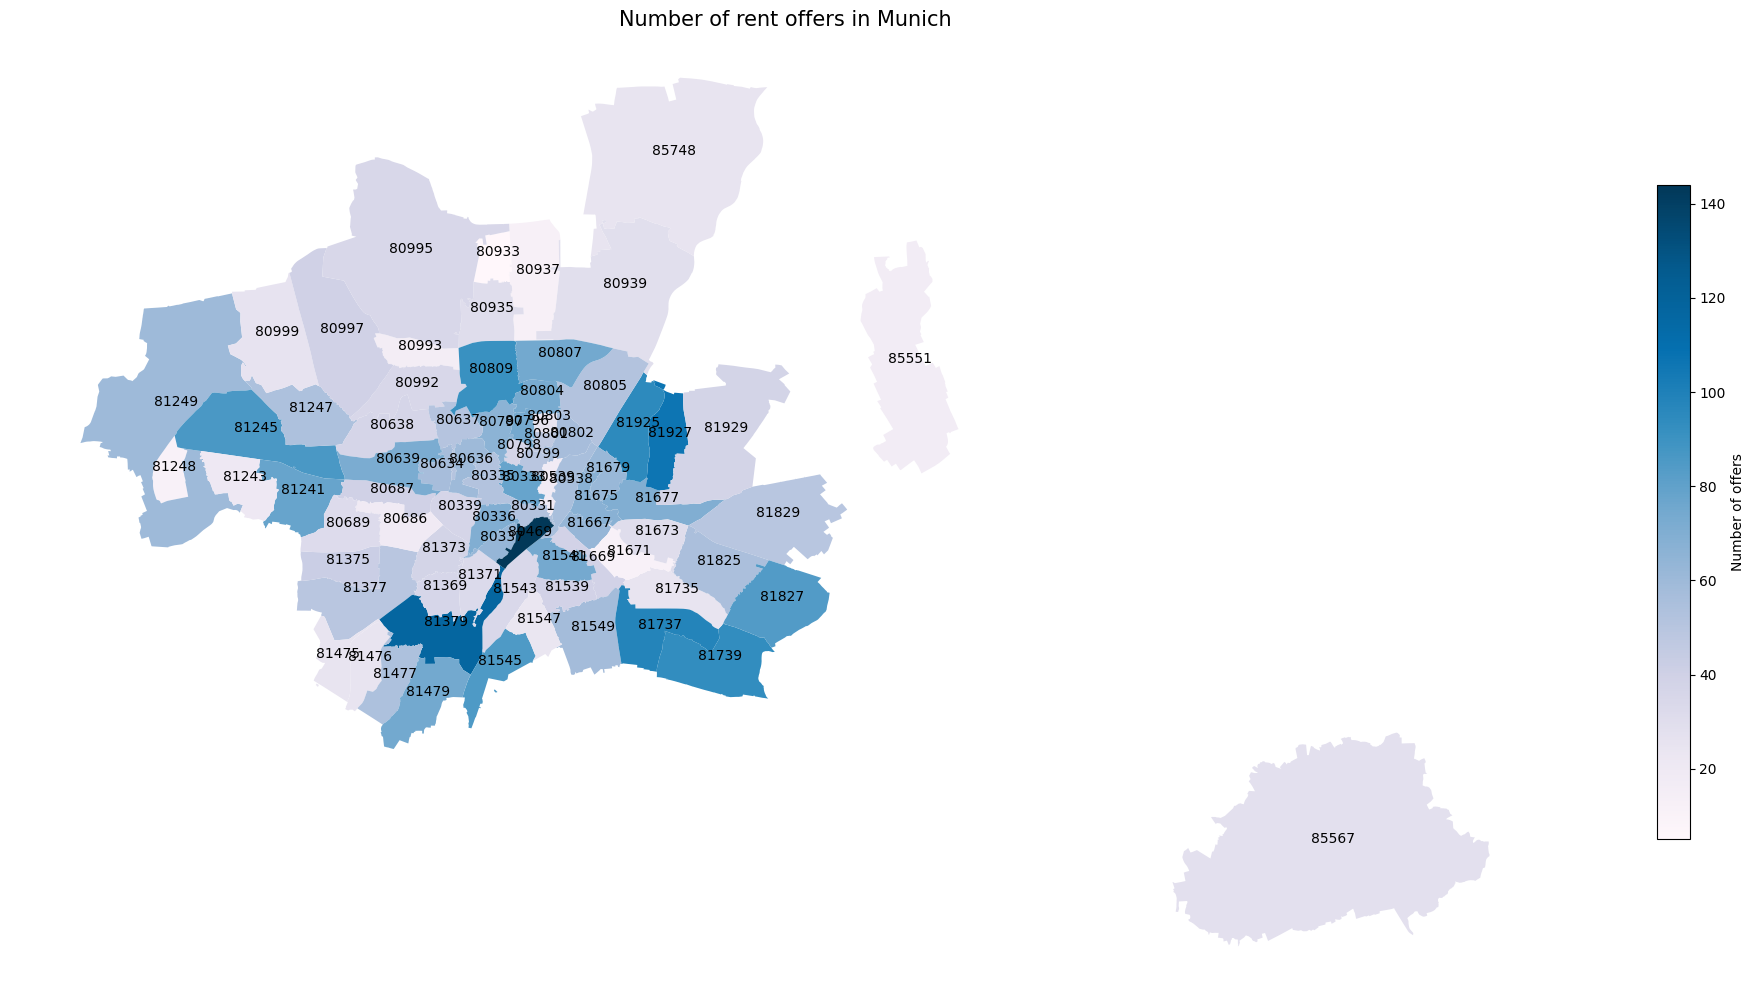

/tmp/ipykernel_2379/3890002325.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(offers_by_plz.geometry.centroid.x,
/tmp/ipykernel_2379/3890002325.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  offers_by_plz.geometry.centroid.y,


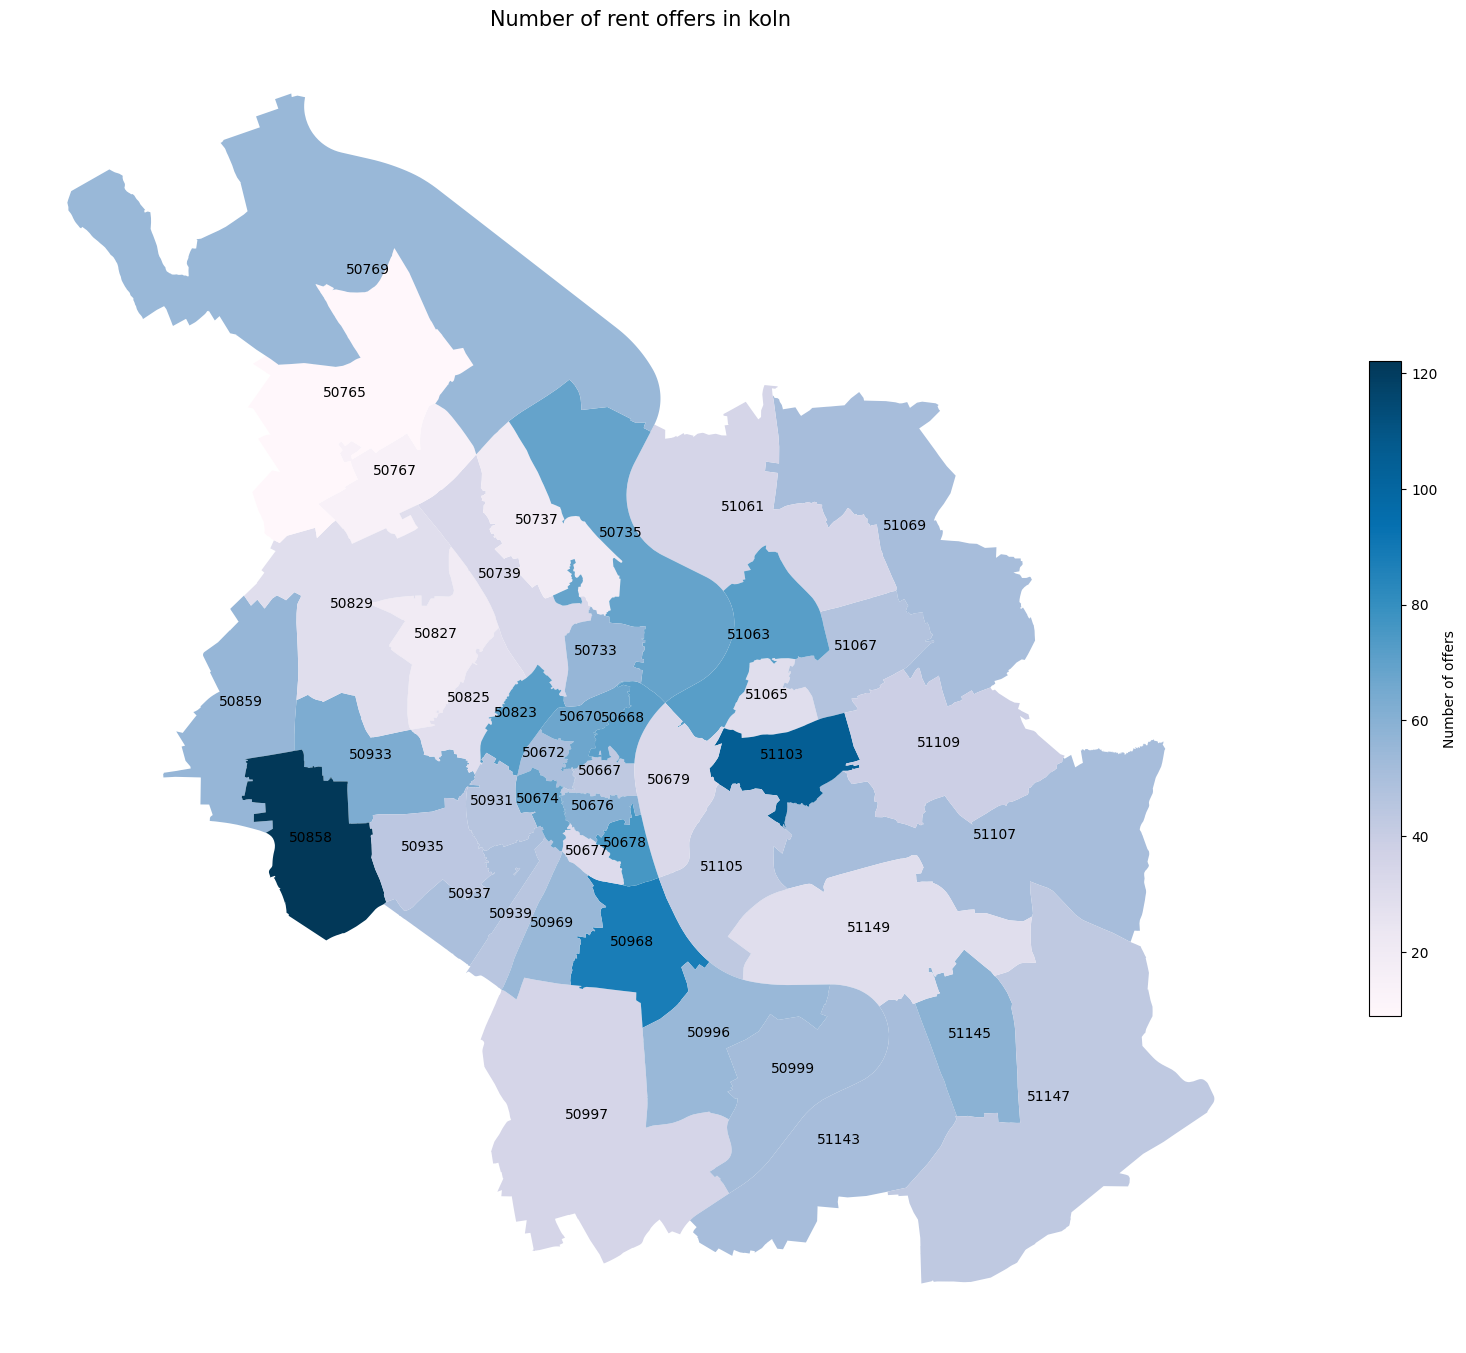

/tmp/ipykernel_2379/3890002325.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(offers_by_plz.geometry.centroid.x,
/tmp/ipykernel_2379/3890002325.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  offers_by_plz.geometry.centroid.y,


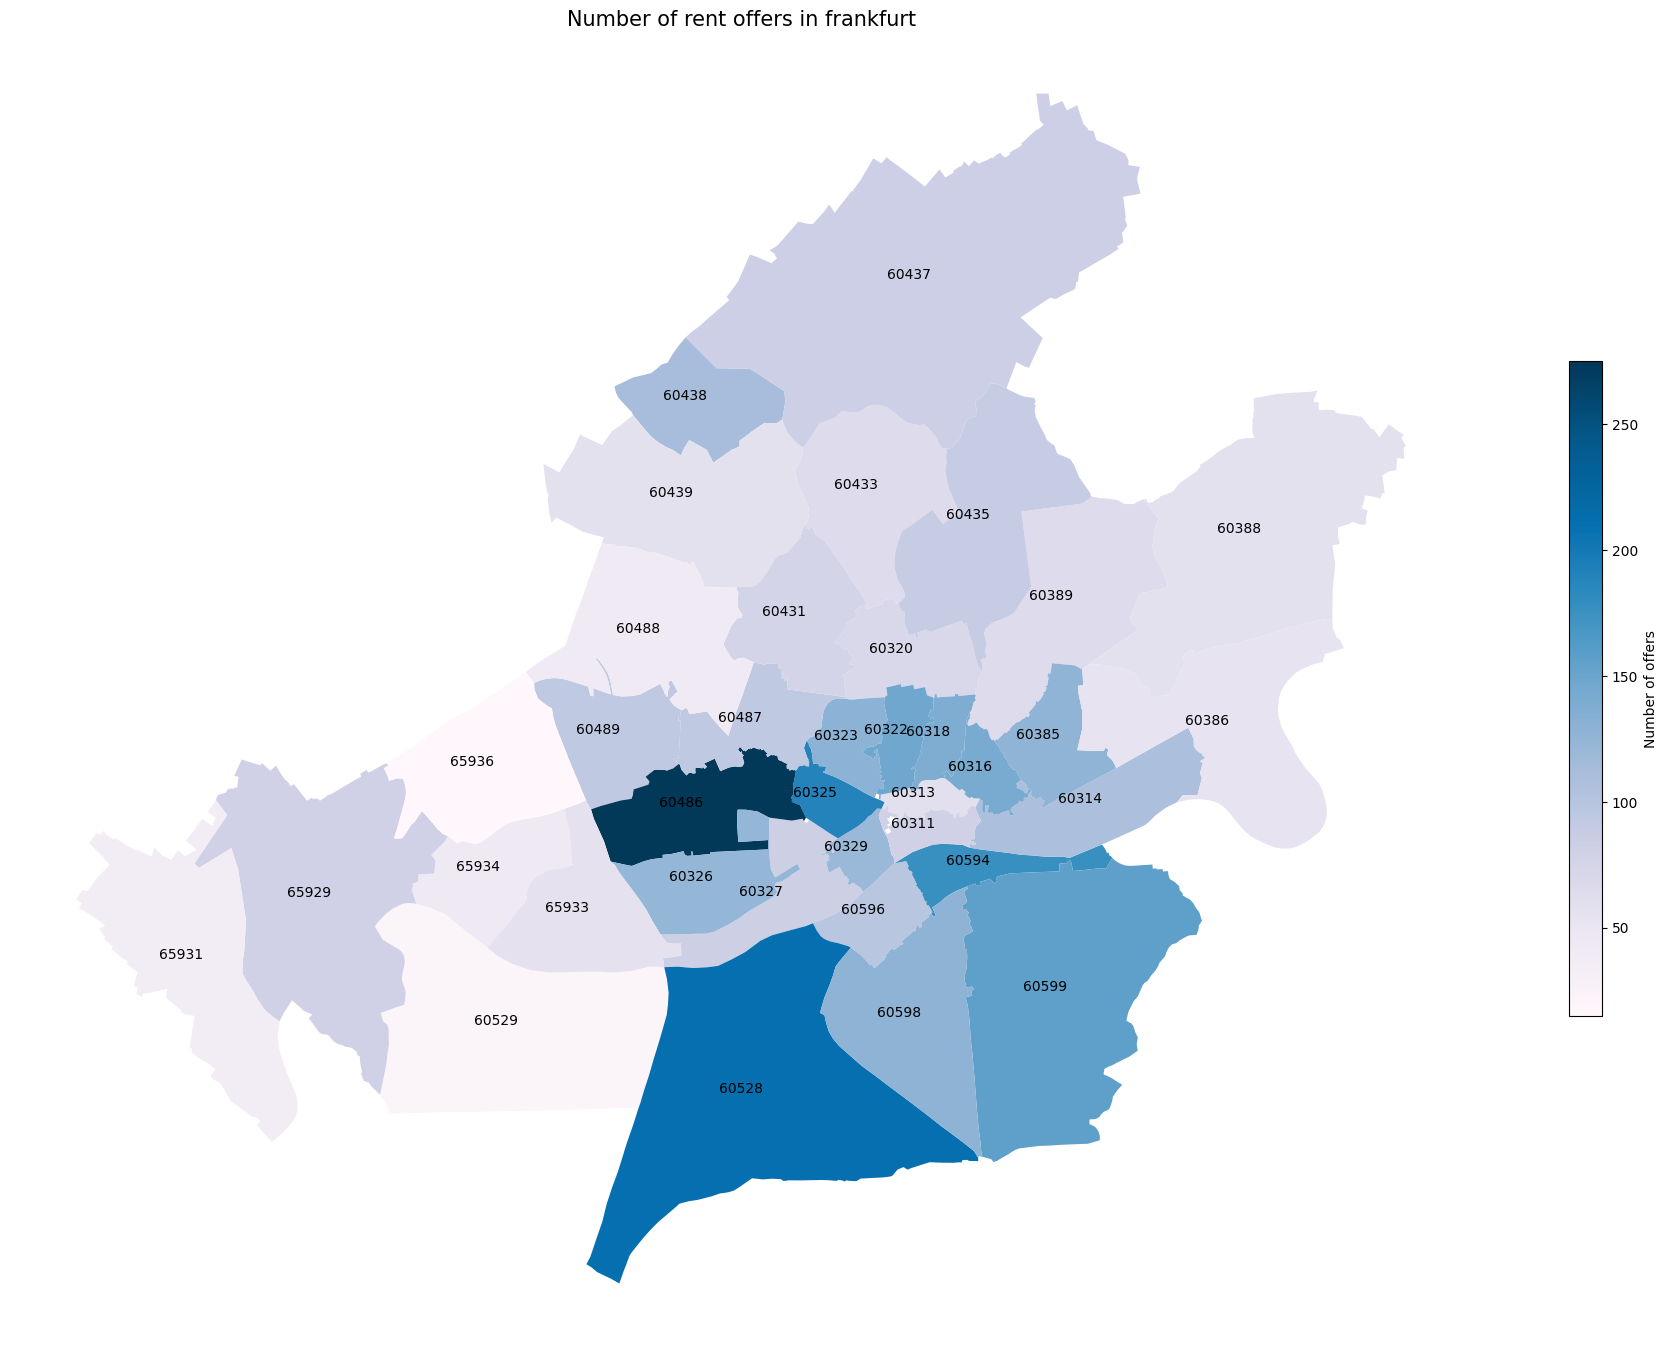

In [28]:
# the number of offers for each town/area

for area in areas:

        offers_by_plz = data.groupby('geo_plz')['totalRent'].count().reset_index()
        offers_by_plz['geo_plz']=offers_by_plz['geo_plz'].astype(int)


        offers_by_plz = area[0].merge(offers_by_plz, left_on="plz", right_on="geo_plz")


        offers_by_plz.plot(column='totalRent', figsize=(25,17), cmap='PuBu', legend=True, 
                legend_kwds={'label': "Number of offers", 'orientation': "vertical", 'shrink': 0.5})
        # add text of plz on the map
        for x, y, label in zip(offers_by_plz.geometry.centroid.x, 
                        offers_by_plz.geometry.centroid.y, 
                        offers_by_plz['plz']):
                plt.annotate(label, xy=(x-.01, y), xytext=(2, 2), textcoords="offset points")

        # remove x and y axes
        plt.axis('off')
        plt.title(f'Number of rent offers in {area[1]}', fontsize=15)
        plt.show()

In [29]:

countpie = data['regio1'].value_counts()

fig = {
  "data": [
    {
      "values": countpie.values,
      "labels": countpie.index,
      "domain": {"x": [0, .5]},
      "name": "State",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },],
  "layout": {
        "title":"Pie chart of all the state ratio in the dataset",
    }
}
iplot(fig)


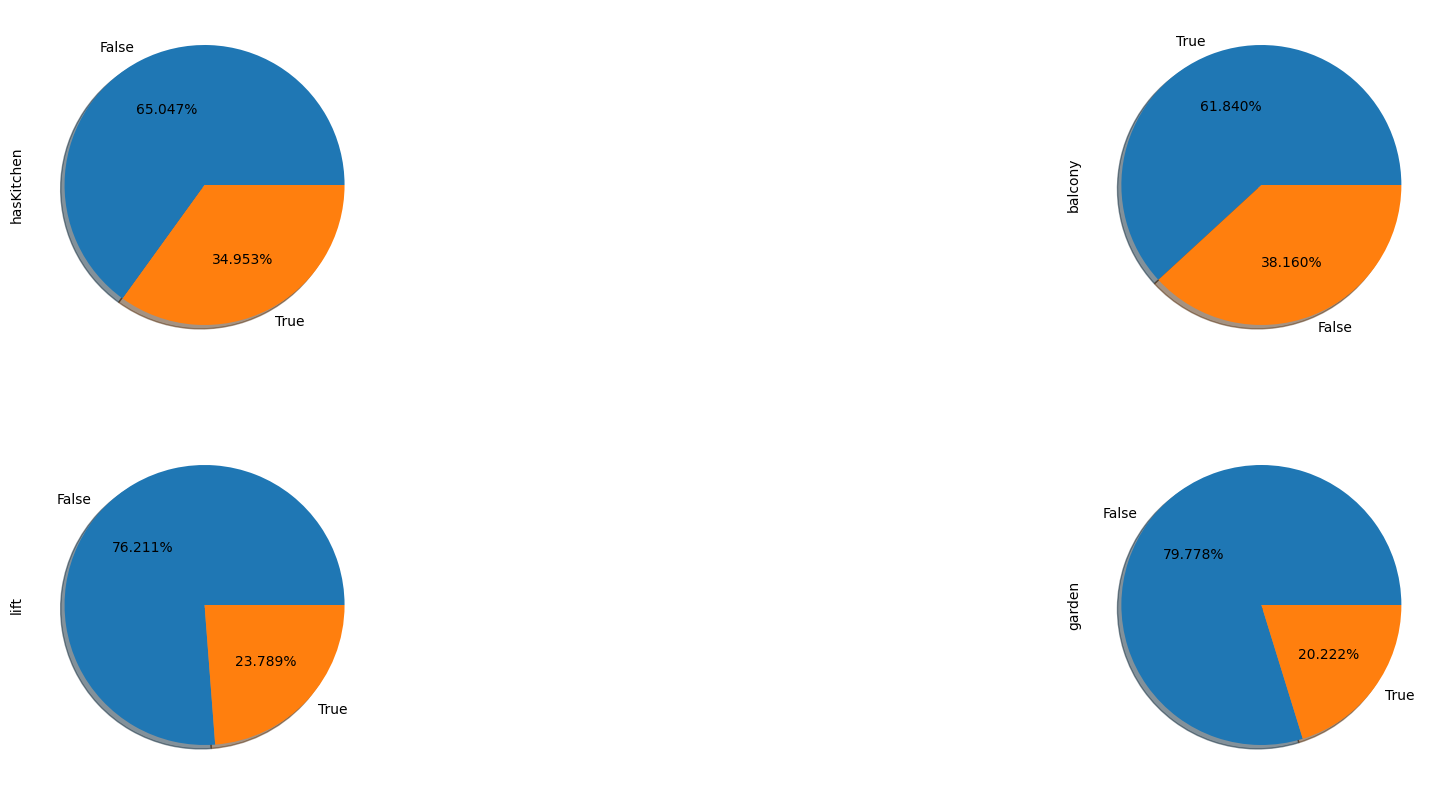

In [30]:
fig1 = plt.figure(figsize = (25,10))

i=221
for feature in ['hasKitchen','balcony','lift','garden']:

    ax = fig1.add_subplot(i)
    data[feature].value_counts().plot.pie(autopct = '%1.3f%%', shadow = True)
    i+=1
    

In [7]:

for feature in ['regio1','heatingType','typeOfFlat','condition']:
      mean_rent = data.groupby([feature])['totalRent'].mean().sort_index()

      fig3 = px.histogram(x = data[feature].value_counts().sort_index().index,
                        y = mean_rent,
                        color= data[feature].value_counts().sort_index().index
                  )
      fig3.update_xaxes(title=feature)
      fig3.update_yaxes(title = "Average rental per month")
      fig3.show()


In [19]:

for i in ['serviceCharge','livingSpace']:
    plotter = data.groupby('regio1') [i].agg(['mean'])
    plotter.columns = ["mean"]
    plotter['regio1'] = plotter.index

    dat = [
        {
            'x': plotter['regio1'],
            'y': plotter['mean'],
            'mode': 'markers+text',
            'text' : plotter['regio1'],
            'textposition' : 'bottom center',
            'marker': {  
                'size': 20,
            }
        }
    ]

    layout = go.Layout(title="Average rental per month compare by "+i, 
                    xaxis=dict(title='City'),
                    yaxis=dict(title=i)
                    )
    fig = go.Figure(data = dat, layout = layout)
    iplot(fig, filename='scatter0')

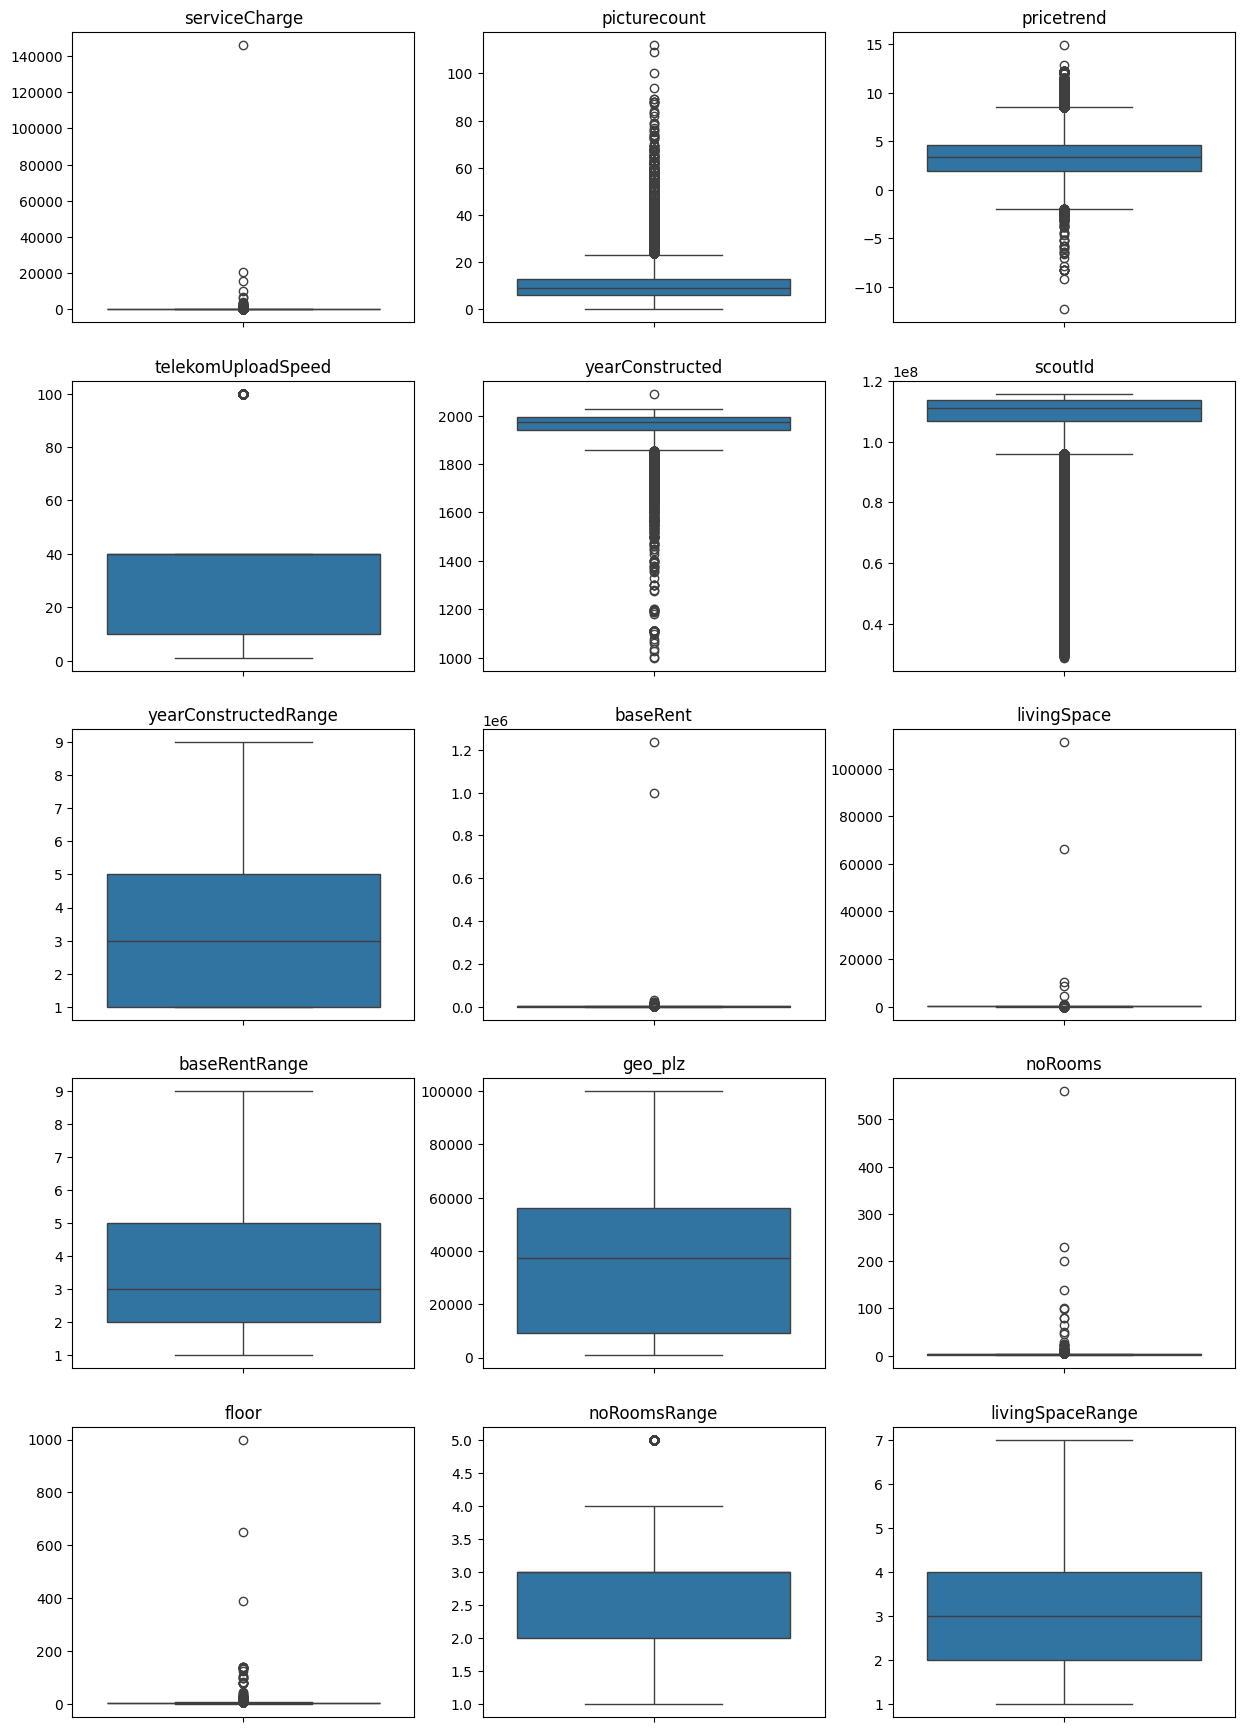

In [38]:
plt.figure(figsize=(15,40))
i=1
for feature in data.columns:
    if data[feature].dtype!='object' and data[feature].dtype!='bool' and feature!='totalRent':
        plt.subplot(9,3,i)
        sns.boxplot(data[feature].values)
        plt.title(feature)
        i+=1         
plt.show()

In [49]:

for i in [feature for feature in data.columns if data[feature].dtype!='object' and data[feature].dtype!='bool']:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)

    outliers=np.where((data[i]<lower) | (data[i]>upper))[0]
    print(f'Number of outliers in {i} : {len(outliers)}')
    data[i]=data[i].clip(lower=lower,upper=upper)
    # data = data[(data[i] >= lower) & (data[i] <= upper)]
    print(f'------------------------------------------------------------------------- {len(outliers)} outliers removed from {i}')

print(data.shape) 


Number of outliers in serviceCharge : 7471
------------------------------------------------------------------------- 7471 outliers removed from serviceCharge
Number of outliers in picturecount : 8280
------------------------------------------------------------------------- 8280 outliers removed from picturecount
Number of outliers in pricetrend : 3996
------------------------------------------------------------------------- 3996 outliers removed from pricetrend
Number of outliers in telekomUploadSpeed : 132
------------------------------------------------------------------------- 132 outliers removed from telekomUploadSpeed
Number of outliers in totalRent : 12186
------------------------------------------------------------------------- 12186 outliers removed from totalRent
Number of outliers in yearConstructed : 1368
------------------------------------------------------------------------- 1368 outliers removed from yearConstructed
Number of outliers in scoutId : 28403
----------------

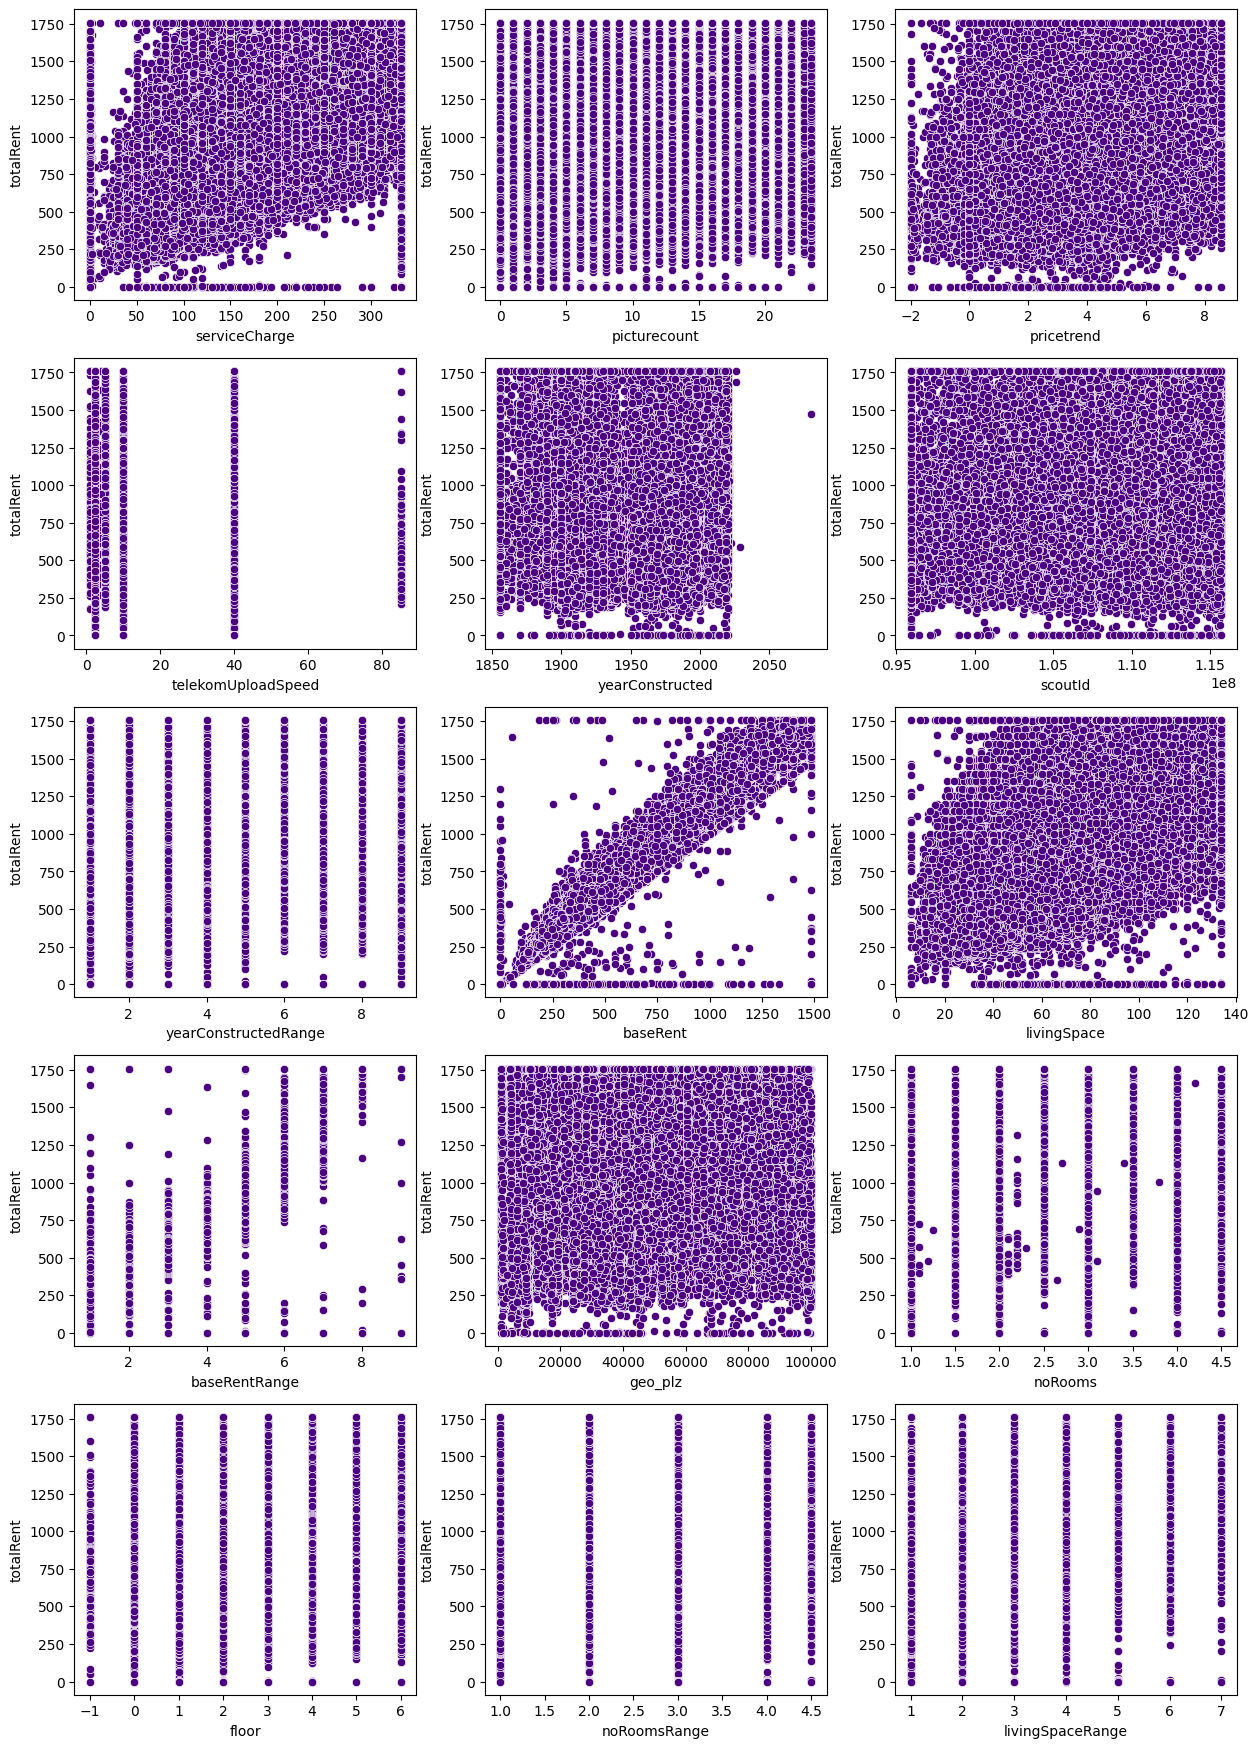

In [17]:
plt.figure(figsize=(15,40))
i=1
for feature in data.columns:
    if data[feature].dtype!='object' and data[feature].dtype!='bool' and feature!='totalRent':
        plt.subplot(9,3,i)
        sns.scatterplot(x=feature,y='totalRent',data=data,color='indigo')
        i+=1         
plt.show()

From the scatterplot it is clear that there are some unrealistic yearConstructed ranges that are far beyond the current year,even after the
outliers are clipped to lower and upper values.
We can remove such rows from the dataframe

In [8]:
data.sort_values(by='yearConstructed',ascending=False)['yearConstructed']

74340     2080.0
34402     2029.0
46554     2026.0
155021    2026.0
204216    2026.0
           ...  
228317       NaN
228318       NaN
228320       NaN
228326       NaN
228328       NaN
Name: yearConstructed, Length: 228333, dtype: float64

In [9]:
(data['yearConstructed']>2023).sum()

5

replacing the values of 5 such rows

In [50]:
data.loc[data['yearConstructed']>2023,'yearConstructed'] = 2023


Filling the missing spots with appropriate values

In [51]:

dic=dict(data.isna().sum())
for i in dic:
    if dic[i]!=0:
        if data[i].dtype=='object':
            data[i]=data[i].fillna(data[i].mode()[0])
        else:
            data[i]=data[i].fillna(data[i].mean())
data.isna().sum()           

regio1                  0
serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
scoutId                 0
firingTypes             0
hasKitchen              0
geo_bln                 0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
geo_krs                 0
condition               0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
floor                   0
noRoomsRange            0
garden                  0
livingSpaceRange        0
regio2                  0
regio3                  0
dtype: int64

Plotting the heatmap to see the corelation between numerical features

/tmp/ipykernel_2532/1265734771.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt='.3f',cmap='Blues')


<Axes: >

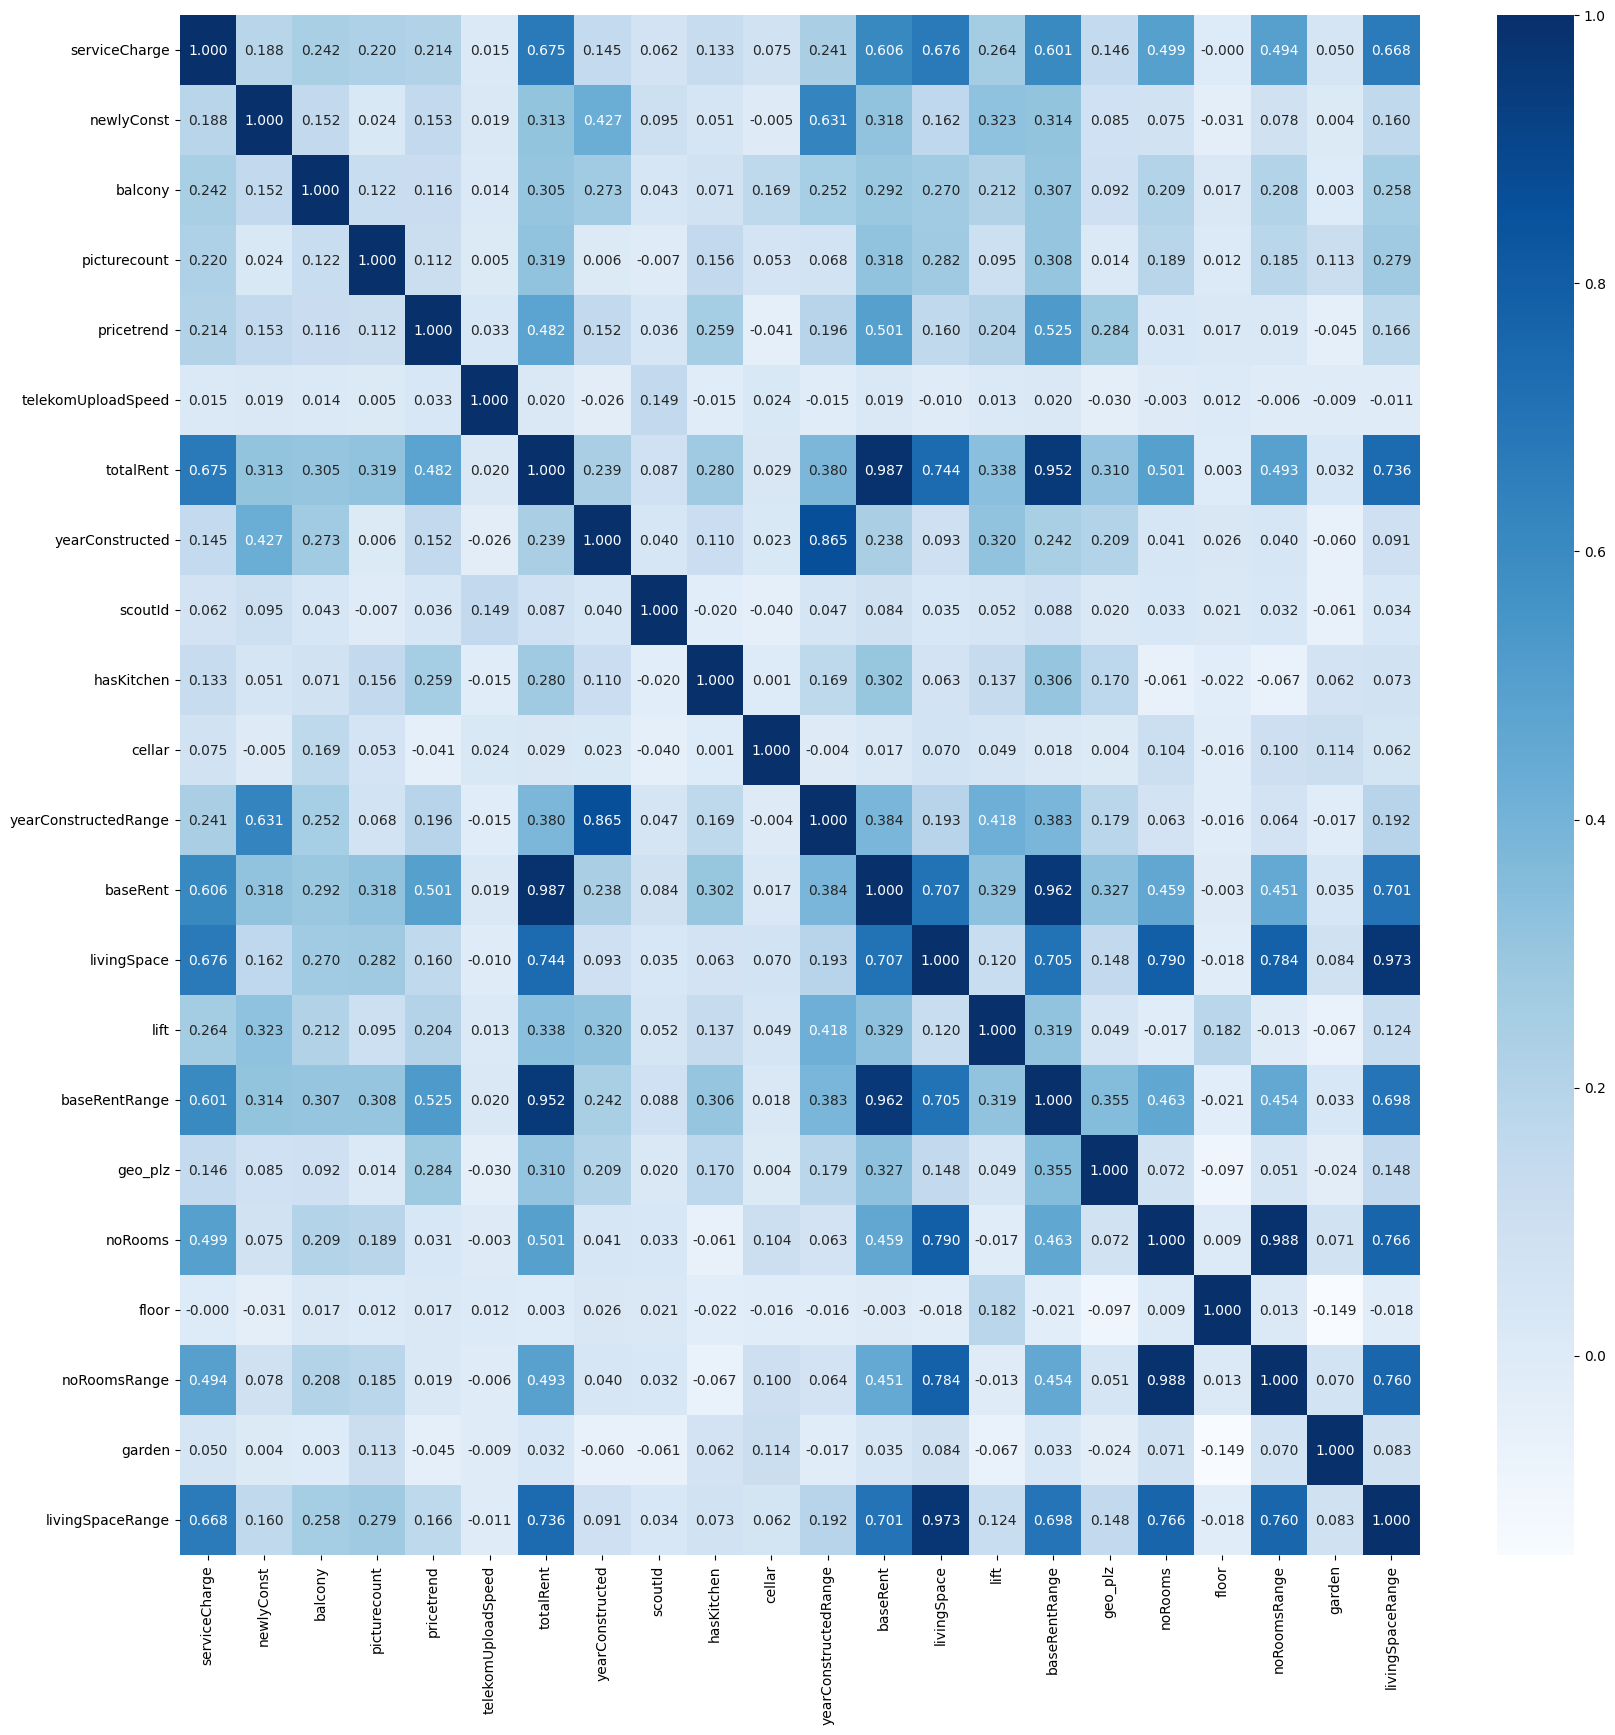

In [13]:

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,fmt='.3f',cmap='Blues')

Performing Pearson's test to understand the correlation of each features with the target variable

In [46]:

correlation_matrix=data.corr()
target_correlations=correlation_matrix['totalRent']
strong_correlations=target_correlations[abs(target_correlations)>0.1]
weak_correlations=target_correlations[abs(target_correlations)<0.1]
print(f'Features with comparatevily strong correlation with totalRent : \n{strong_correlations}')
print(f'Features with comparatevily weak correlation with totalRent : \n{weak_correlations}')

/tmp/ipykernel_2532/1048062848.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=data.corr()


Features with comparatevily strong correlation with totalRent : 
serviceCharge           0.674610
newlyConst              0.313273
balcony                 0.305108
picturecount            0.318527
pricetrend              0.482072
totalRent               1.000000
yearConstructed         0.239042
hasKitchen              0.280138
yearConstructedRange    0.379893
baseRent                0.986645
livingSpace             0.743522
lift                    0.337999
baseRentRange           0.952060
geo_plz                 0.310350
noRooms                 0.500551
noRoomsRange            0.492771
livingSpaceRange        0.736231
Name: totalRent, dtype: float64
Features with comparatevily weak correlation with totalRent : 
telekomUploadSpeed    0.020120
scoutId               0.086847
cellar                0.029403
floor                 0.003089
garden                0.031965
Name: totalRent, dtype: float64


Performing the variance inflation factor to understand the multicolliniarity between features

a VIF value larger than 10 might be problematic and they have to be removed,
here we are setting value 5 as the threshould for eleminating features based on VIF value

In [47]:

scalar=StandardScaler()

num_features=[feature for feature in data.columns if data[feature].dtype!='object' and data[feature].dtype!='bool']

df=data[num_features]
data_scaled=pd.DataFrame(scalar.fit_transform(df),columns=num_features)


vif_data=pd.DataFrame()


vif_data['Features']=num_features
vif_data['VIF']=[variance_inflation_factor(data_scaled.values,i) for i in range(data_scaled.shape[1])]

# Displaying features with high VIF
# Choosing threshould as 5

high_vif_features=vif_data[vif_data['VIF']>5]

high_vif_features


Features        VIF
4          totalRent  61.373520
8           baseRent  63.058454
9        livingSpace  22.630601
10     baseRentRange  14.913804
12           noRooms  42.419128
14      noRoomsRange  41.293725
15  livingSpaceRange  19.150314

Performing ANOVA test to find the correlation between categorical features and numerical target variable
Here we are considering a significance level of 0.05 for the P-value to select the important features,we can eliminate 
features if the p-value is above the threshould

In [50]:

significance_level=0.05

object_cols=data.select_dtypes(include='object').columns

for col in object_cols:
    anova_result=f_oneway(*[data['totalRent'][data[col]==level] for level in data[col].unique()])
    print(f'Anova results for {col}')
    print(f'F-statistic : {anova_result.statistic}')
    print(f'P-value : {anova_result.pvalue}')
    if anova_result.pvalue > significance_level:
        print('Not significant')
    print('-'*100)


Anova results for regio1
F-statistic : 5957.10036057975
P-value : 0.0
----------------------------------------------------------------------
Anova results for heatingType
F-statistic : 2145.4911745784616
P-value : 0.0
----------------------------------------------------------------------
Anova results for telekomTvOffer
F-statistic : 154.05977841162937
P-value : 1.3733864248770344e-67
----------------------------------------------------------------------
Anova results for firingTypes
F-statistic : 53.38391108826089
P-value : 0.0
----------------------------------------------------------------------
Anova results for geo_bln
F-statistic : 5957.10036057975
P-value : 0.0
----------------------------------------------------------------------
Anova results for geo_krs
F-statistic : 415.5585630769448
P-value : 0.0
----------------------------------------------------------------------
Anova results for condition
F-statistic : 5417.466558115384
P-value : 0.0
-----------------------------------

Exploring the count of unique values in categorical features

In [40]:
[f'{feature}  :  {data[feature].nunique()}' for feature in data.columns if data[feature].dtype=='object']

['regio1  :  16',
 'heatingType  :  13',
 'telekomTvOffer  :  3',
 'firingTypes  :  119',
 'geo_bln  :  16',
 'geo_krs  :  419',
 'condition  :  10',
 'typeOfFlat  :  10',
 'regio2  :  419',
 'regio3  :  8343']

Plotting barcharts to see the distribution of the categorical features

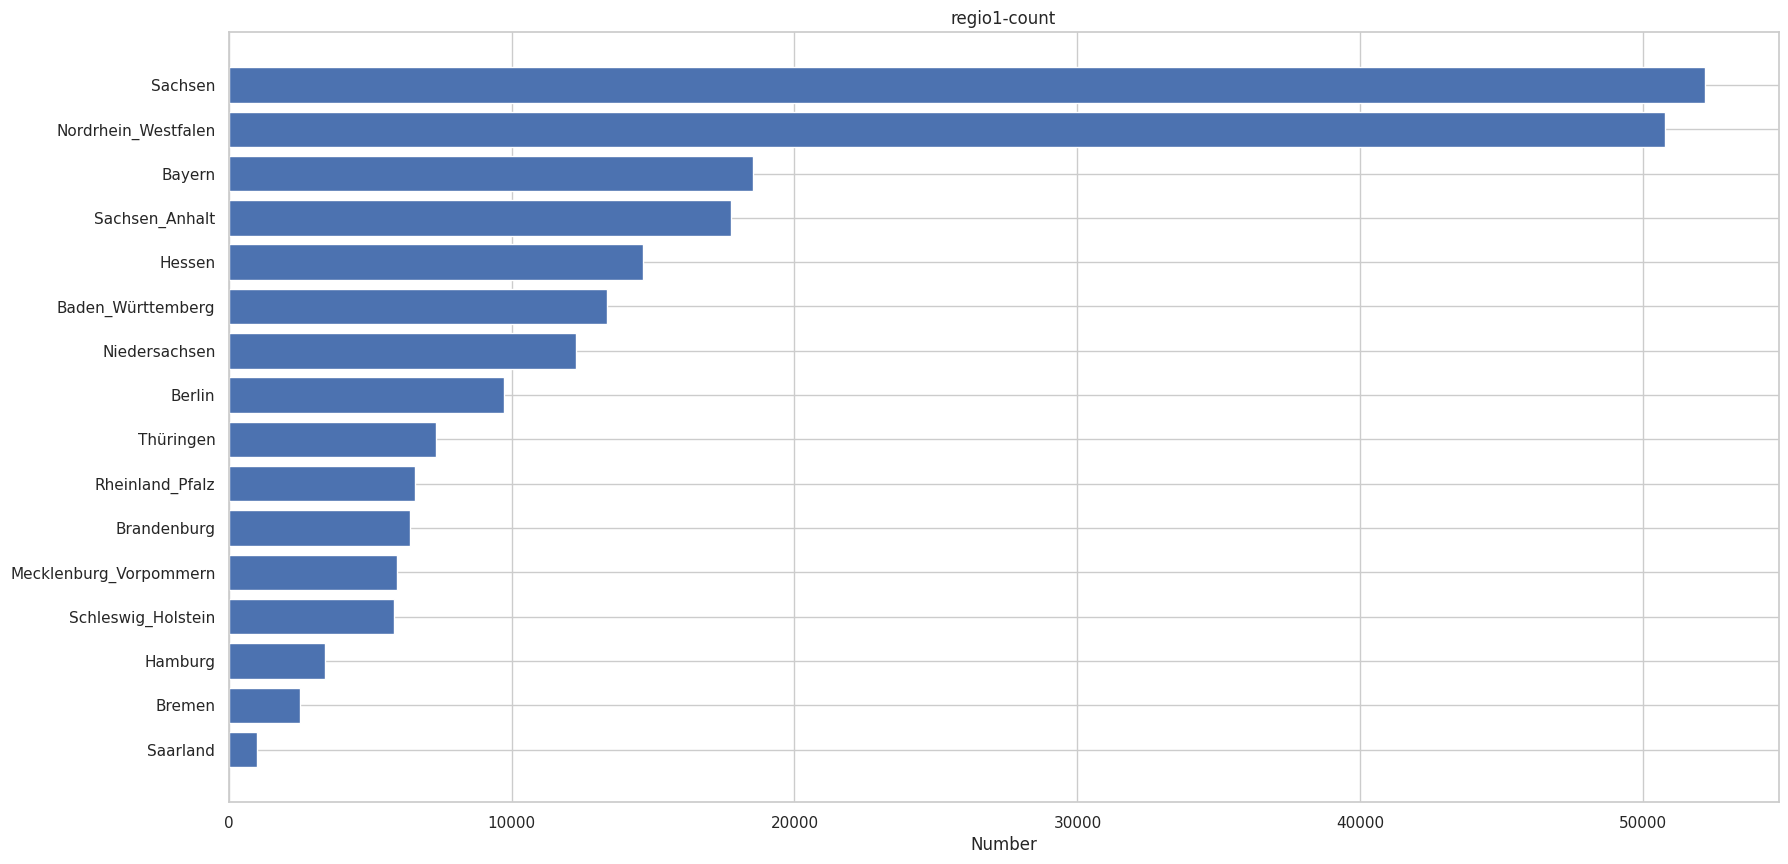

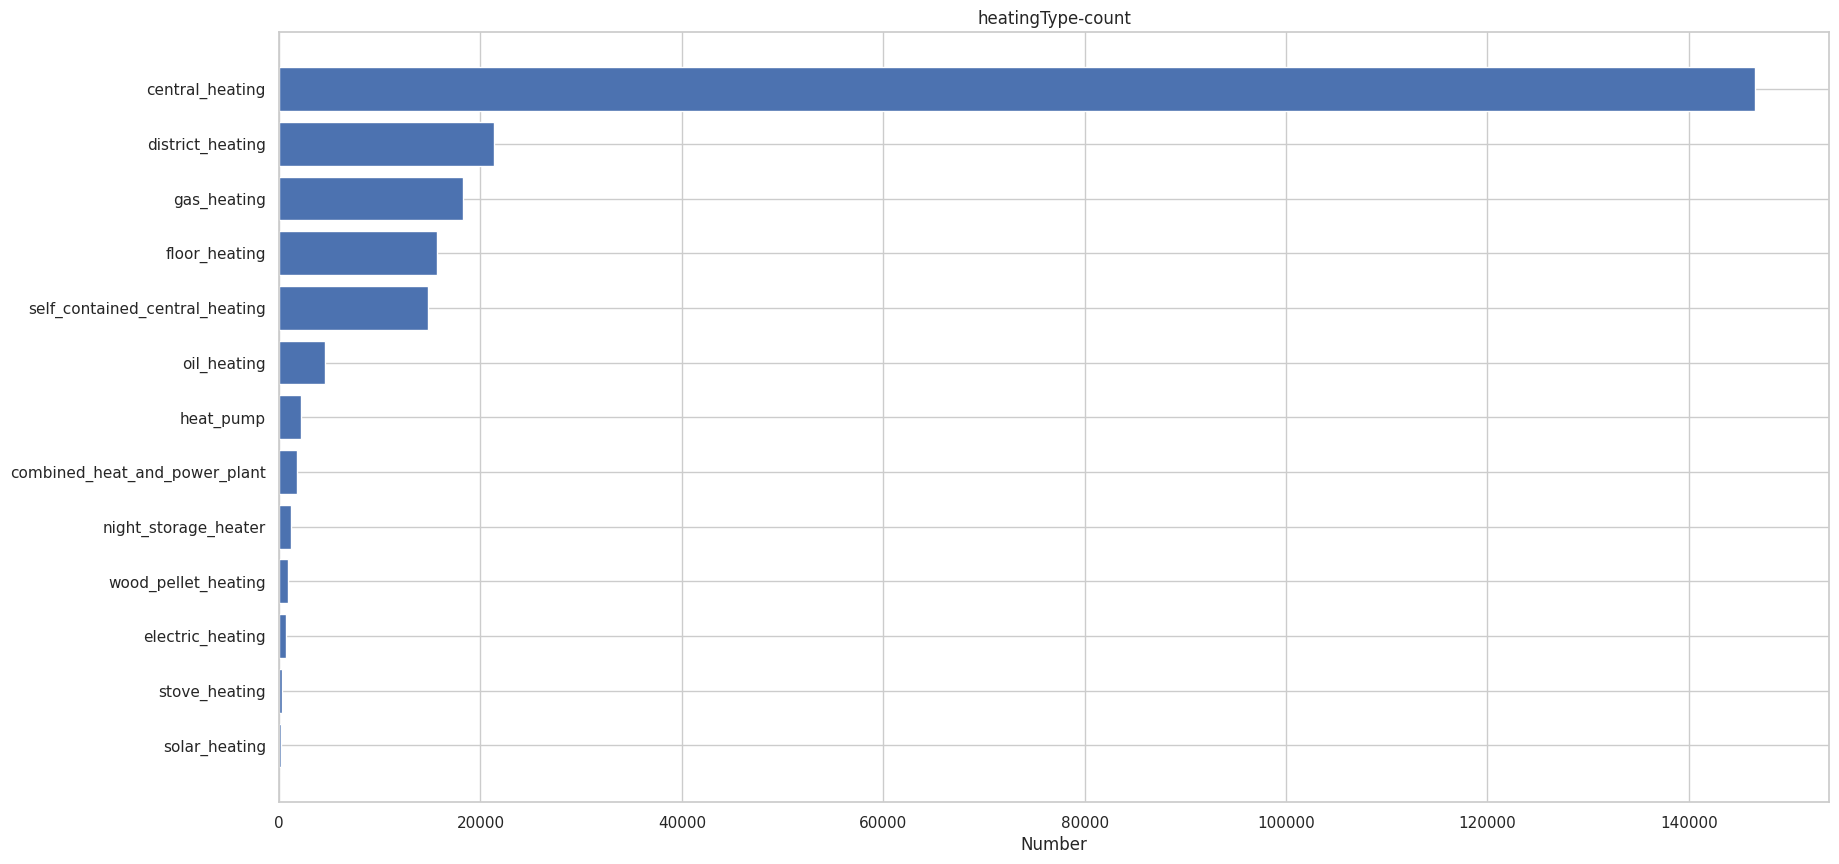

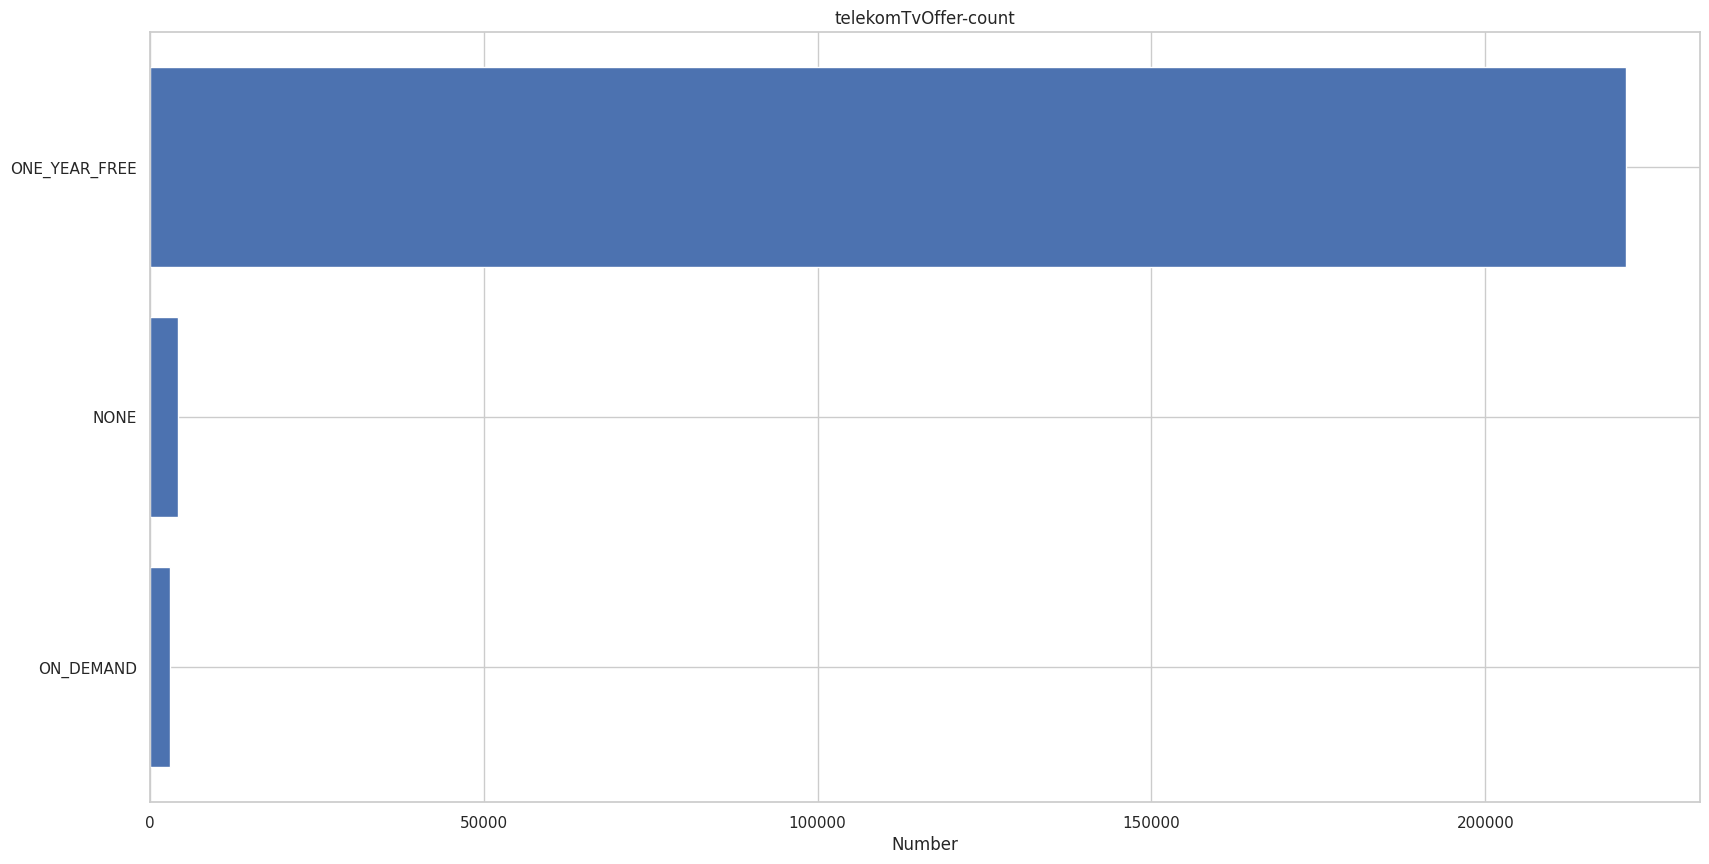

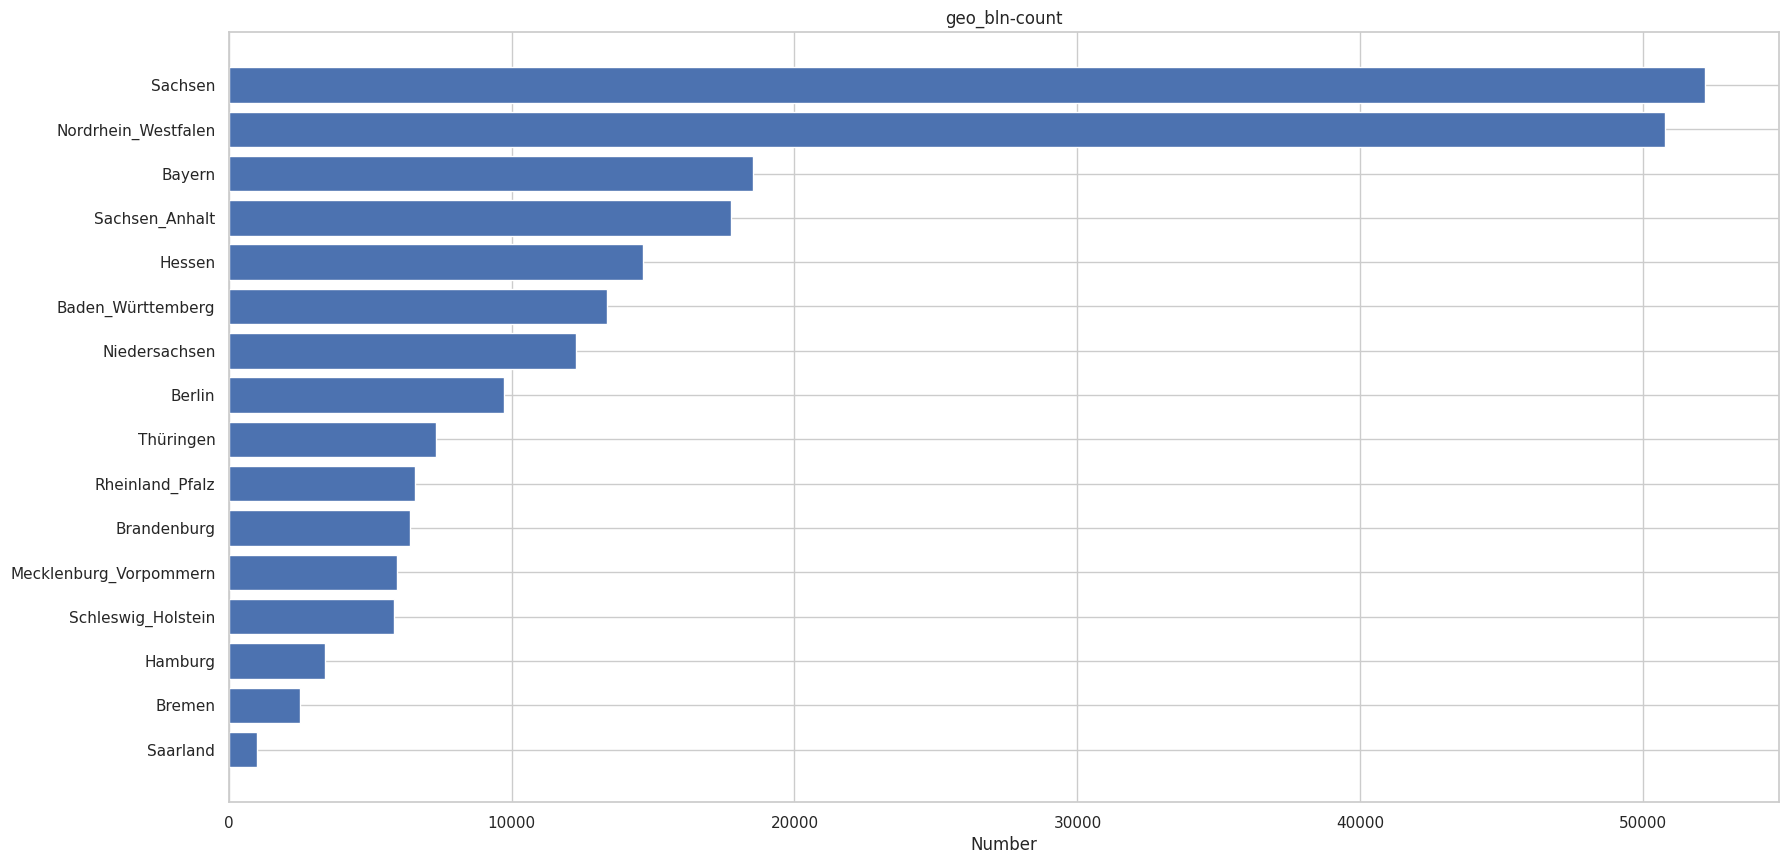

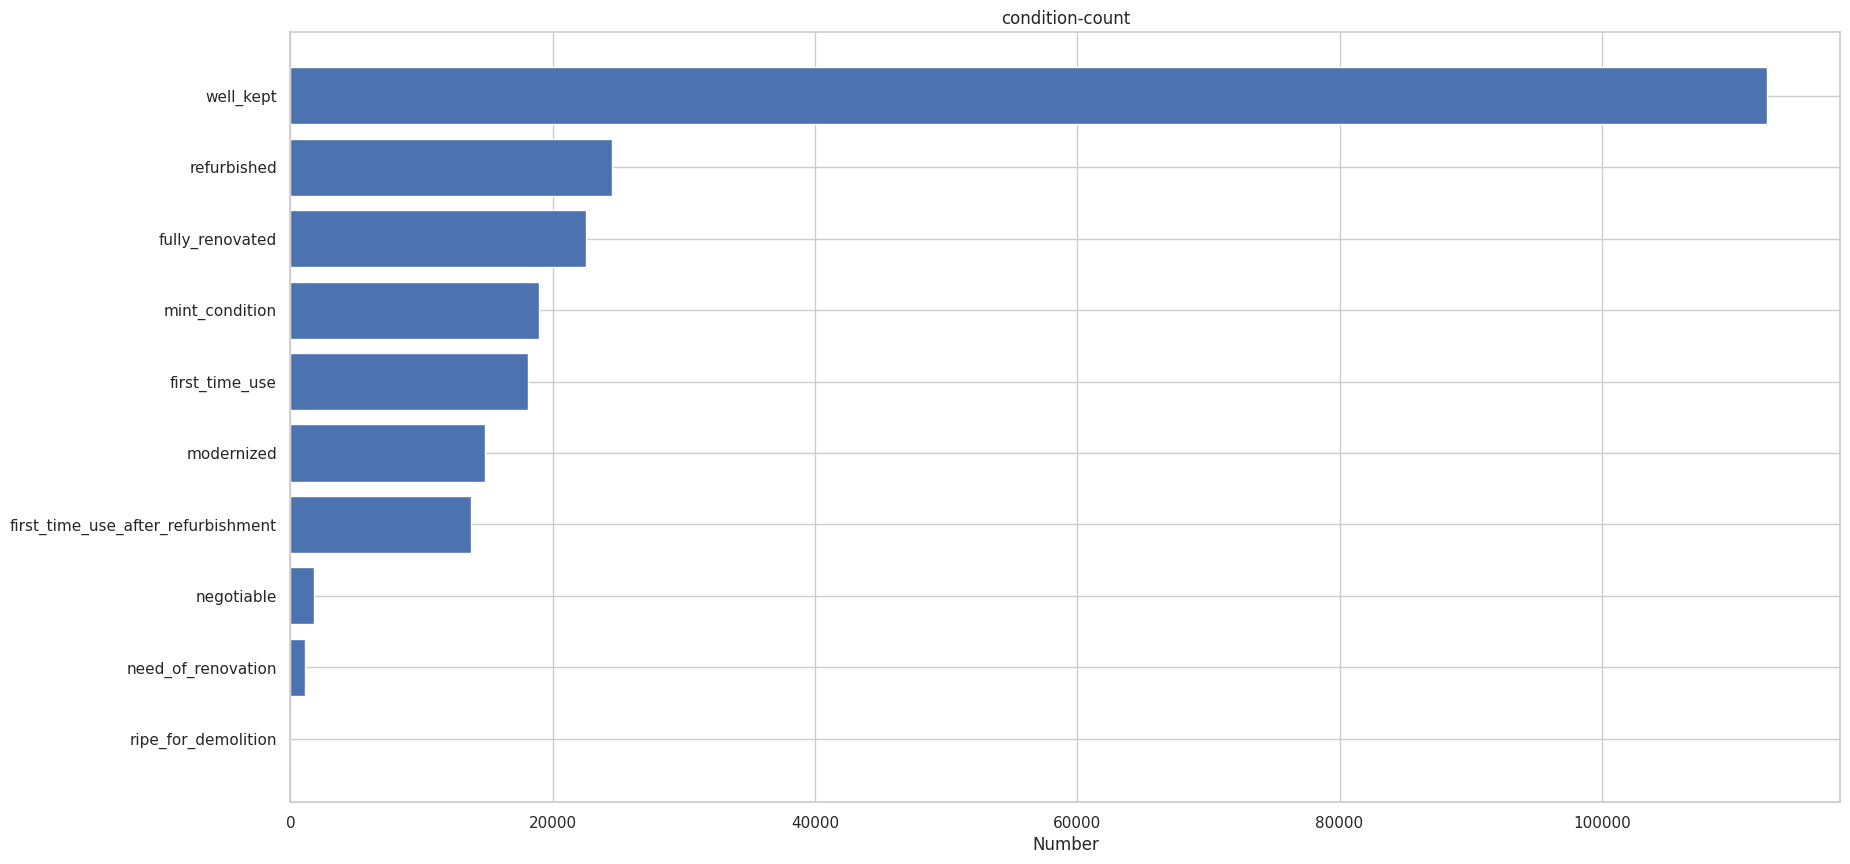

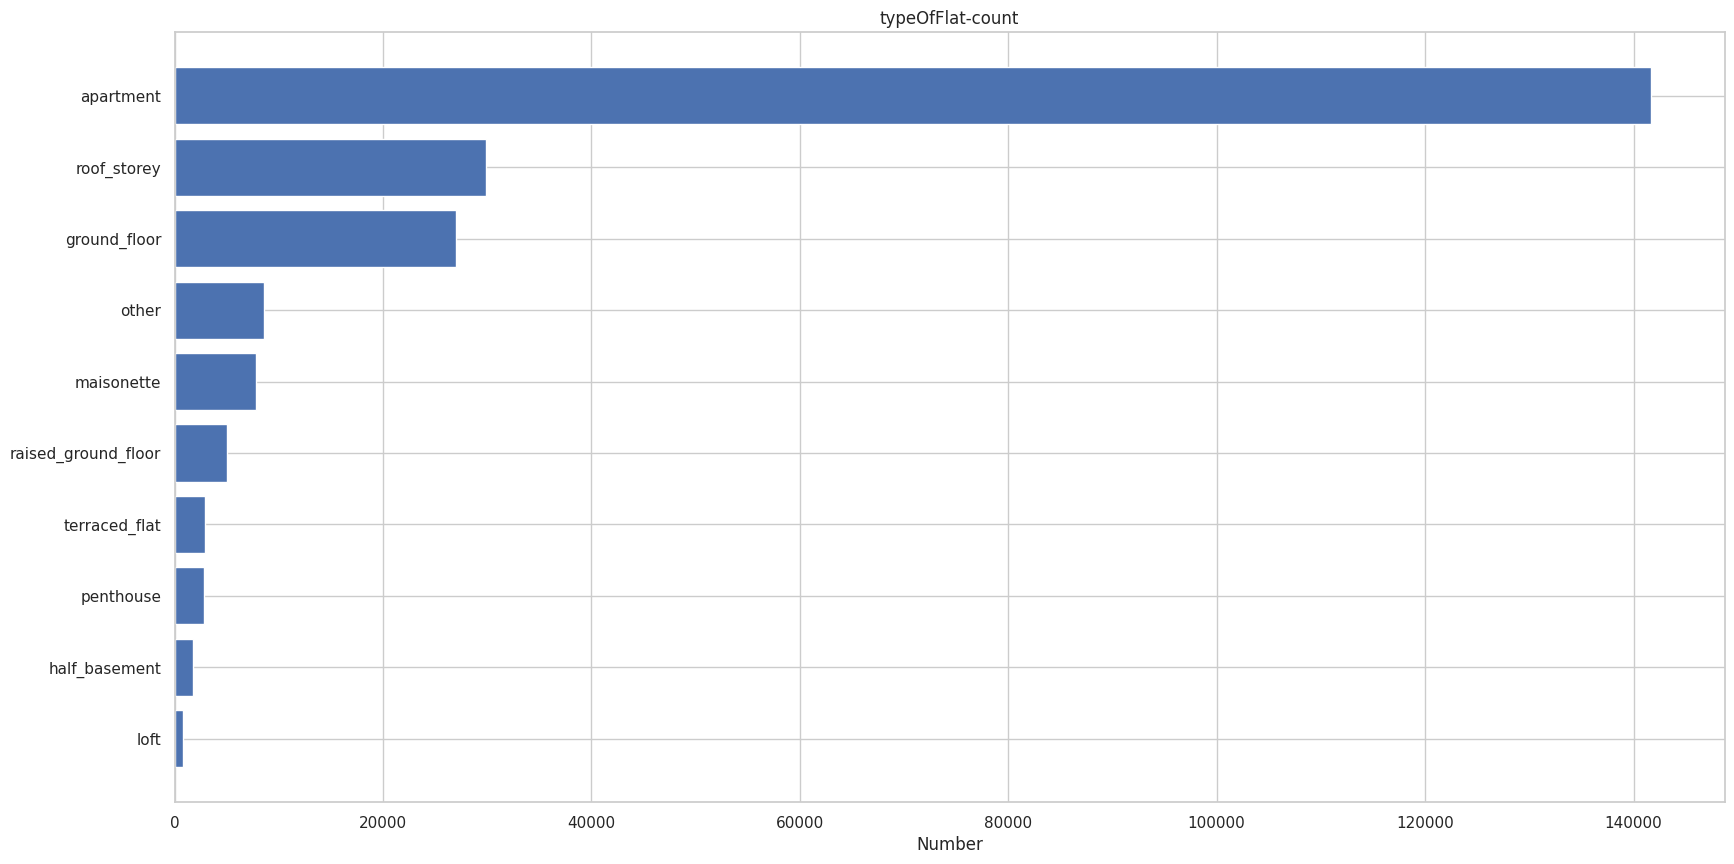

In [13]:
sns.set(style="whitegrid")
for feature in ['regio1','heatingType','telekomTvOffer','geo_bln','condition','typeOfFlat']:
    
    plt.figure(figsize=(20, 10))
    dat = data[feature].value_counts()
    x = list(dat.index)
    y = list(dat.values)
    x.reverse()
    y.reverse()

    plt.title(f'{feature}-count')
    plt.xlabel("Number")

    plt.barh(x, y)

 

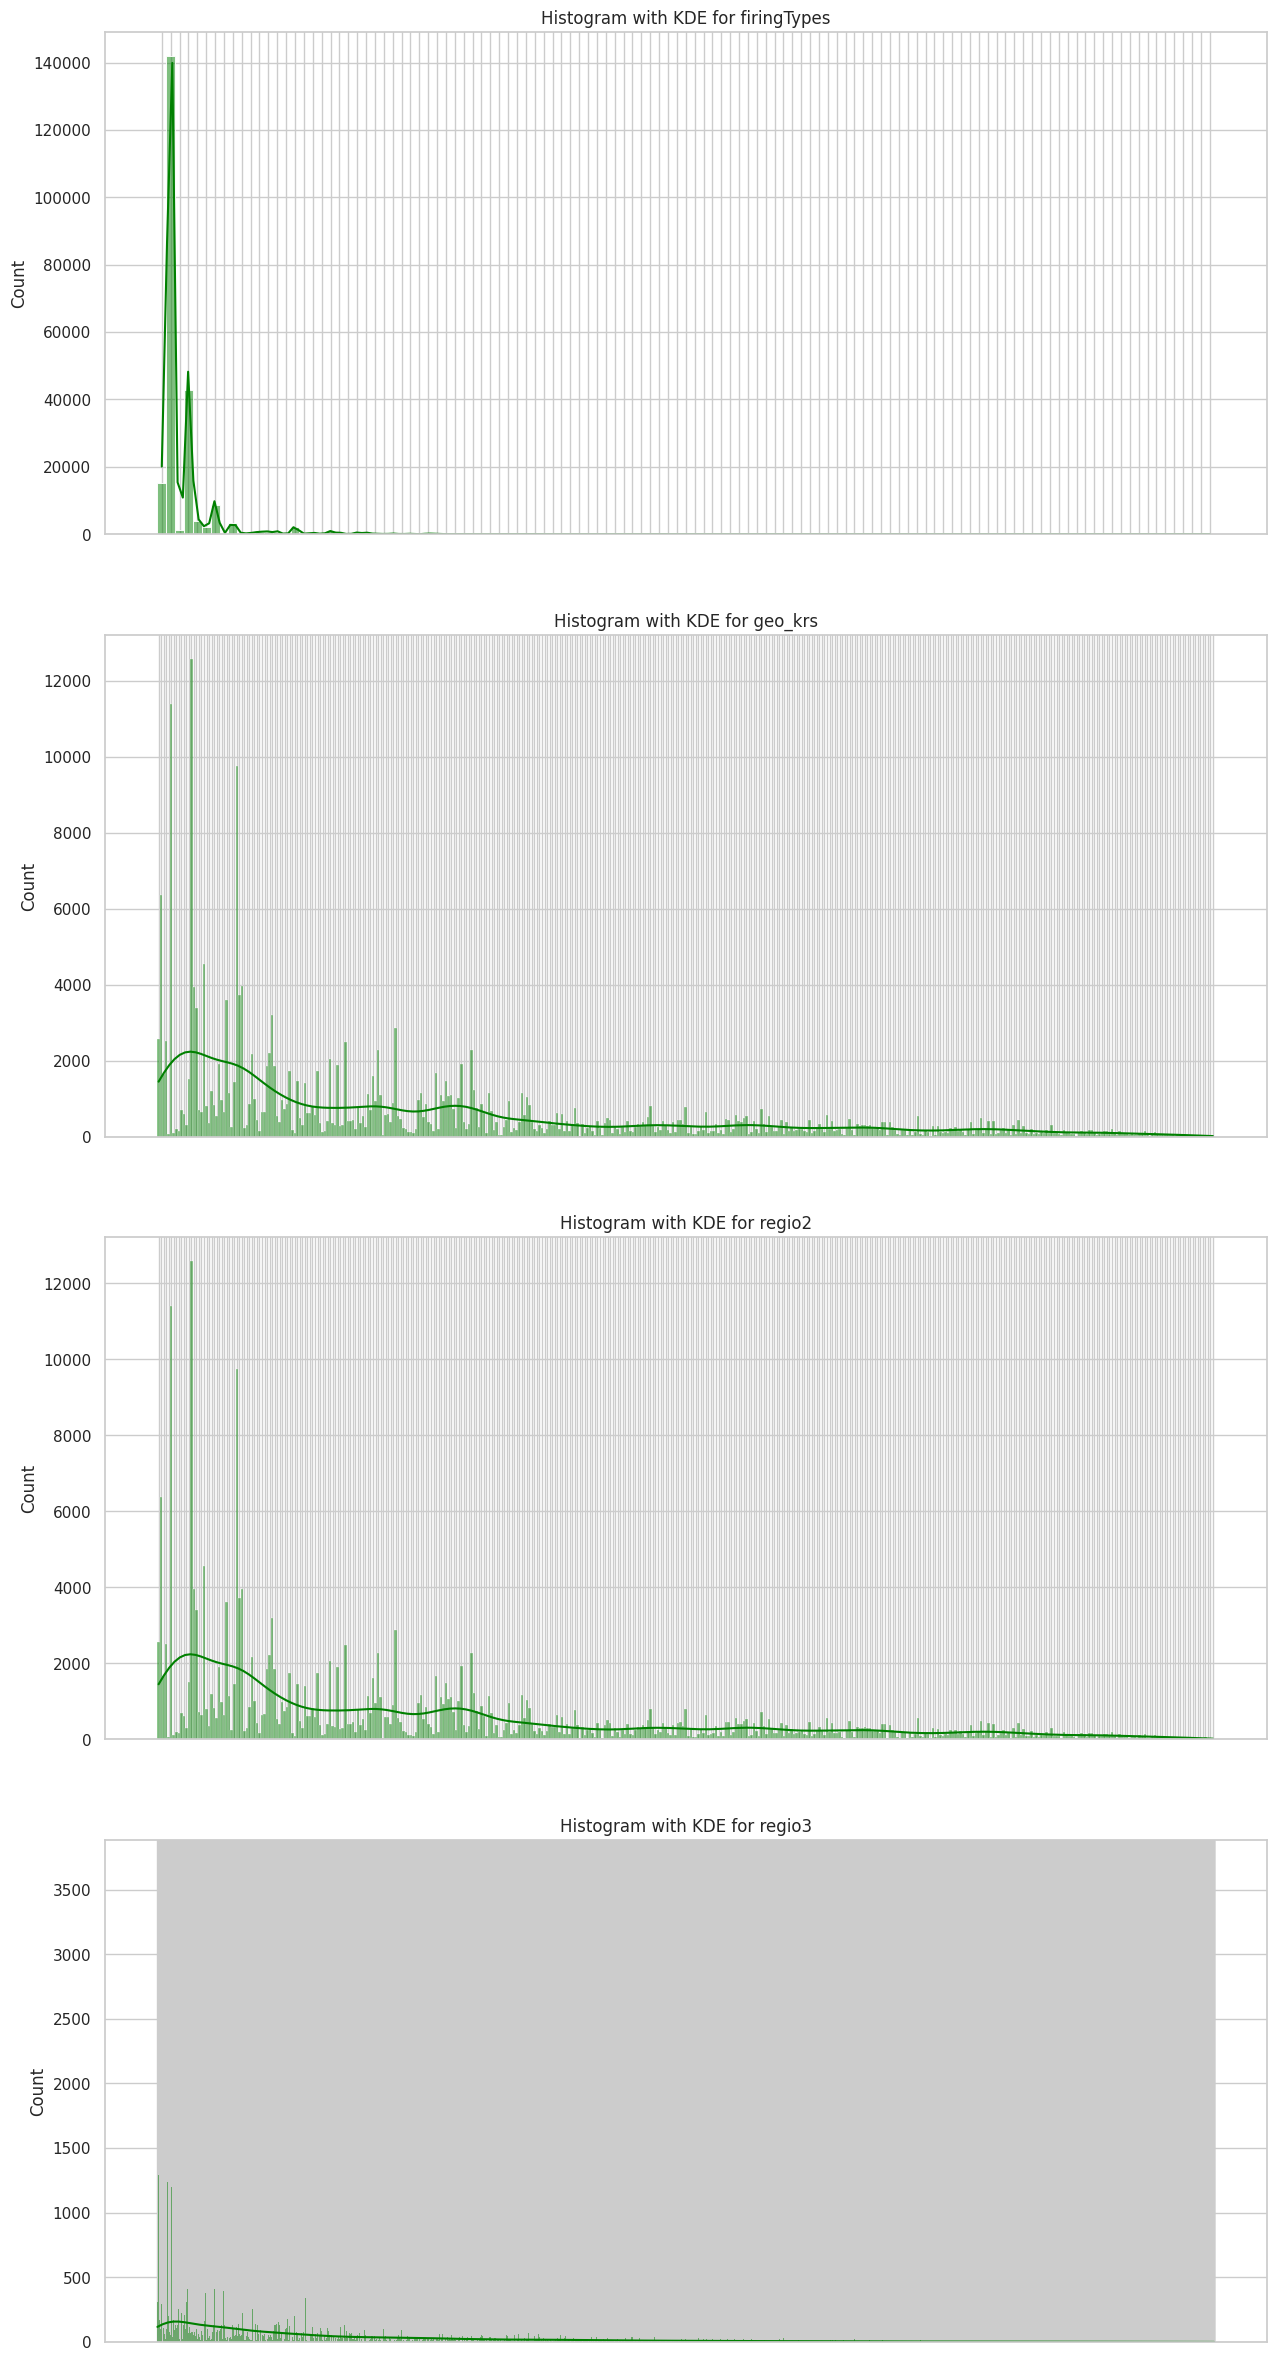

In [9]:
lis1=['firingTypes','geo_krs','regio2','regio3']
sns.set(style="whitegrid")

fig,axes=plt.subplots(nrows=len(lis1),ncols=1,figsize=(15,30))

for i,column in enumerate(lis1):
    sns.histplot(data=data,x=column,kde=True,ax=axes[i],stat="count",common_norm=False,color='green')
    axes[i].set_title(f'Histogram with KDE for {column}')
    axes[i].set_xticklabels([])
    axes[i].set_xlabel('')
    
plt.show()   

From the above observations unnecessary features are dropped from both numerical and categorical features


1) Dropping 'floor','garden','cellar','telekomUploadSpeed' and 'scoutId' since they have very low correlation with the 'totalRent'

2) Dropping 'baseRent','noRoomsRange','baseRentRange','livingSpaceRange','noRooms','livingSpace' since they have comparatively high variance_inflation_factor and could possibily induce multicollinearity between independent features


3) ropping 'regio1' since it is a reduntent feature of 'geo_bln'

4) Dropping 'regio2' since it is a reduntent feature of 'geo_krs'

5) Doing all these changes in a separate copy of the dataframe


Here we are performing feature selection based on our findings on a separate copy of the original dataset and the orginal dataset is remained as such and model performance is evaluated on both the datasets

Below is the separate copy of the dataframe where manual feature selection has done

In [52]:

feature_reduced_data=data.copy(deep=True)

feature_reduced_data.drop(['floor','garden','cellar','telekomUploadSpeed','scoutId','baseRent','noRoomsRange','baseRentRange','livingSpaceRange','noRooms','livingSpace','regio1','regio2',],axis=1,inplace=True)

feature_reduced_data.shape

(228333, 19)

In [53]:
data.drop(['regio1','regio2'],axis=1,inplace=True)
data.shape

(228333, 30)

In [40]:
print(f"Number of unique values in geo_krs {data['geo_krs'].nunique()}")
data['geo_krs'].value_counts()

Number of unique values in geo_krs 419


Leipzig                         12580
Chemnitz                        11388
Berlin                           9744
Dresden                          6368
Magdeburg                        4553
                                ...  
Schwabach                          28
Lichtenfels_Kreis                  27
Haßberge_Kreis                     21
Neustadt_a.d._Waldnaab_Kreis       12
Kronach_Kreis                       7
Name: geo_krs, Length: 419, dtype: int64

In [63]:

print(f"Number of unique values in regio3 {data['regio3'].nunique()}")
data['regio3'].value_counts()[:2011]

Number of unique values in regio3 8343


Innenstadt         3700
Stadtmitte         2325
Altstadt           2080
Sonnenberg         1793
Kaßberg            1602
                   ... 
Liebertwolkwitz      22
Hohndorf             22
Haarzopf             22
Aldenhoven           22
Malente              22
Name: regio3, Length: 2011, dtype: int64

KEEPING THE TOP-N UNIQUE VALUES OF A CATEGORICAL VARIABLE AND GROUPING OTHERS

In [54]:
def group_categories(dataf,feature,top_n):
    category_counts=dataf[feature].value_counts()

    top=category_counts.head(top_n).index
    dataf[feature]=dataf[feature].apply(lambda x:x if x in top else 'Other')

    return dataf



In [55]:
# grouping data that could be grouped

data=group_categories(data,'heatingType',6)
data=group_categories(data,'regio3',2011)




In [43]:
[f'{feature}  :  {data[feature].nunique()}' for feature in data.columns if data[feature].dtype=='object']

['heatingType  :  7',
 'telekomTvOffer  :  3',
 'firingTypes  :  119',
 'geo_bln  :  16',
 'geo_krs  :  419',
 'condition  :  10',
 'typeOfFlat  :  10',
 'regio3  :  2012']

The column 'firingTypes' has a total of 119 unique values but some values are combinations of existing values seperated by a fullcolon(:) therefore,it can be seperated and can be encoded  using getdummies with lesser complexity.

In [92]:
lis=[j for i in data['firingTypes'].values for j in str(i).split(':')]
unique=[item for index,item in enumerate(lis) if item not in lis[:index]]
unique

['oil',
 'gas',
 'electricity',
 'district_heating',
 'pellet_heating',
 'natural_gas_light',
 'local_heating',
 'natural_gas_heavy',
 'solar_heating',
 'environmental_thermal_energy',
 'steam_district_heating',
 'geothermal',
 'combined_heat_and_power_regenerative_energy',
 'heat_supply',
 'combined_heat_and_power_fossil_fuels',
 'liquid_gas',
 'wood',
 'hydro_energy',
 'combined_heat_and_power_renewable_energy',
 'coal',
 'bio_energy',
 'wood_chips',
 'combined_heat_and_power_bio_energy',
 'wind_energy',
 'coal_coke']

It is efficient to encode these seperated 25 unique values than the unseparated 119 unique values

Encoding the values of 'firingTypes' using getdummies

In [56]:
firingTypes_encodes=data['firingTypes'].str.get_dummies(sep=':')
firingTypes_encodes

bio_energy  coal  coal_coke  combined_heat_and_power_bio_energy  \
0                0     0          0                                   0   
1                0     0          0                                   0   
2                0     0          0                                   0   
3                0     0          0                                   0   
4                0     0          0                                   0   
...            ...   ...        ...                                 ...   
228328           0     0          0                                   0   
228329           0     0          0                                   0   
228330           0     0          0                                   0   
228331           0     0          0                                   0   
228332           0     0          0                                   0   

        combined_heat_and_power_fossil_fuels  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
228328                                     0   
228329                                     0   
228330                                     0   
228331                                     0   
228332                                     0   

        combined_heat_and_power_regenerative_energy  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
228328                                            0   
228329                                            0   
228330                                            0   
228331                                            0   
228332                                            0   

        combined_heat_and_power_renewable_energy  district_heating  \
0                                              0                 0   
1                                              0                 0   
2                                              0                 0   
3                                              0                 0   
4                                              0                 0   
...                                          ...               ...   
228328                                         0                 0   
228329                                         0                 0   
228330                                         0                 0   
228331                                         0                 0   
228332                                         0                 0   

        electricity  environmental_thermal_energy  ...  local_heating  \
0                 0                             0  ...              0   
1                 0                             0  ...              0   
2                 0                             0  ...              0   
3                 0                             0  ...              0   
4                 1                             0  ...              0   
...             ...                           ...  ...            ...   
228328            0                             0  ...              0   
228329            0                             0  ...              0   
228330            0                             0  ...              0   
228331            0                             0  ...              0   
228332            0                             0  ...              0   

        natural_gas_heavy  natural_gas_light  oil  pellet_heating  \
0                       0                  0    1               0   
1            

Encoding rest of the object-type features with small number of unique values using get dummies

In [57]:
encodes=pd.get_dummies(data[['heatingType','telekomTvOffer','geo_bln','condition','typeOfFlat']])
encodes

heatingType_Other  heatingType_central_heating  \
0                       0                            1   
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            1   
...                   ...                          ...   
228328                  0                            0   
228329                  1                            0   
228330                  0                            0   
228331                  0                            1   
228332                  1                            0   

        heatingType_district_heating  heatingType_floor_heating  \
0                                  0                          0   
1                                  0                          1   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
228328                             0                          0   
228329                             0                          0   
228330                             0                          0   
228331                             0                          0   
228332                             0                          0   

        heatingType_gas_heating  heatingType_oil_heating  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
228328                        1                        0   
228329                        0                        0   
228330                        1                        0   
228331                        0                        0   
228332                        0                        0   

        heatingType_self_contained_central_heating  telekomTvOffer_NONE  \
0                                                0                    0   
1                                                0                    0   
2                                                1                    0   
3                                                1                    0   
4                                                0                    0   
...                                            ...                  ...   
228328                                           0                    0   
228329                                           0                    0   
228330                                           0                    0   
228331                                           0                    0   
228332                                           0                    0   

        telekomTvOffer_ONE_YEAR_FREE  telekomTvOffer_ON_DEMAND  ...  \
0                                  1                         0  ...   
1                                  1                         0  ...   
2                                  1                         0  ...   
3                                  1                         0  ...   
4                                  1                         0  ...   
...                              ...                       ...  ...   
228328                             1                         0  ...   
228329                             1                         0  ...   
228330                             1                         0  ...   
228331                             1                         0  ...   
228332                             1                         0  ...   

        typeOfFlat_apartment  t

Applying log transformations to numerical features,for Normalizing data and for stabilising varience between independent variables

In [58]:

for i in [feature for feature in data.columns if data[feature].dtype!='object' and data[feature].dtype!='bool']:
    data[i] = abs(np.log(abs(data[i]) + 0.0001))

data.head()    

serviceCharge                     heatingType telekomTvOffer  newlyConst  \
0       5.501259                 central_heating  ONE_YEAR_FREE       False   
1       5.541264                   floor_heating  ONE_YEAR_FREE        True   
2       4.927254  self_contained_central_heating  ONE_YEAR_FREE       False   
3       4.248497  self_contained_central_heating  ONE_YEAR_FREE       False   
4       4.477338                 central_heating  ONE_YEAR_FREE       False   

   balcony  picturecount  pricetrend  telekomUploadSpeed  totalRent  \
0    False      1.791776    1.530416            2.302595   6.733402   
1     True      2.079454    1.000669            0.875510   7.170120   
2     True      2.944444    0.900202            3.364484   6.805723   
3    False      2.197236    0.010049            0.875510   5.940172   
4     True      1.609458    0.636630            0.875510   6.370329   

   yearConstructed  ...   lift baseRentRange    typeOfFlat    geo_plz  \
0         7.583248  ...  False      1.386319  ground_floor  10.698040   
1         7.610358  ...   True      1.791776     apartment   7.000335   
2         7.575585  ...  False      1.609458     apartment  10.247538   
3         7.584198  ...  False      0.693197     apartment   9.169414   
4         7.580189  ...  False      1.098646  ground_floor  10.265245   

    noRooms     floor  noRoomsRange  garden livingSpaceRange  \
0  1.386319  0.000100      1.386319    True         1.386319   
1  1.098646  1.098646      1.098646   False         1.386319   
2  1.098646  0.000100      1.098646   False         1.386319   
3  0.693197  0.000100      0.693197    True         1.098646   
4  1.098646  0.720886      1.098646   False         0.693197   

                       regio3  
0                     Schüren  
1  Äußere_Neustadt_Antonstadt  
2           Neu_Schwachhausen  
3                    Freiberg  
4                  St._Magnus  

[5 rows x 30 columns]

In [59]:
data=pd.concat([data,firingTypes_encodes],axis=1)
data=pd.concat([data,encodes],axis=1)

data.drop(['firingTypes','heatingType','telekomTvOffer','geo_bln','condition','typeOfFlat'],axis=1,inplace=True)

data.head()

serviceCharge  newlyConst  balcony  picturecount  pricetrend  \
0       5.501259       False    False      1.791776    1.530416   
1       5.541264        True     True      2.079454    1.000669   
2       4.927254       False     True      2.944444    0.900202   
3       4.248497       False    False      2.197236    0.010049   
4       4.477338       False     True      1.609458    0.636630   

   telekomUploadSpeed  totalRent  yearConstructed    scoutId  hasKitchen  ...  \
0            2.302595   6.733402         7.583248  18.380973       False  ...   
1            0.875510   7.170120         7.610358  18.544203       False  ...   
2            3.364484   6.805723         7.575585  18.558277       False  ...   
3            0.875510   5.940172         7.584198  18.555141       False  ...   
4            0.875510   6.370329         7.580189  18.562794       False  ...   

   typeOfFlat_apartment  typeOfFlat_ground_floor  typeOfFlat_half_basement  \
0                     0                        1                         0   
1                     1                        0                         0   
2                     1                        0                         0   
3                     1                        0                         0   
4                     0                        1                         0   

   typeOfFlat_loft typeOfFlat_maisonette  typeOfFlat_other  \
0                0                     0                 0   
1                0                     0                 0   
2                0                     0                 0   
3                0                     0                 0   
4                0                     0                 0   

   typeOfFlat_penthouse  typeOfFlat_raised_ground_floor  \
0                     0                               0   
1                     0                               0   
2                     0                               0   
3                     0                               0   
4                     0                               0   

   typeOfFlat_roof_storey  typeOfFlat_terraced_flat  
0                       0                         0  
1                       0                         0  
2                       0                         0  
3                       0                         0  
4                       0                         0  

[5 rows x 95 columns]

Label encoding rest of the features

In [60]:

le_encoder=LabelEncoder()

for feature in data.columns:
    if data[feature].dtype=='object' or data[feature].dtype=='bool':
        data[feature]=le_encoder.fit_transform(data[feature])

data.head()    

serviceCharge  newlyConst  balcony  picturecount  pricetrend  \
0       5.501259           0        0      1.791776    1.530416   
1       5.541264           1        1      2.079454    1.000669   
2       4.927254           0        1      2.944444    0.900202   
3       4.248497           0        0      2.197236    0.010049   
4       4.477338           0        1      1.609458    0.636630   

   telekomUploadSpeed  totalRent  yearConstructed    scoutId  hasKitchen  ...  \
0            2.302595   6.733402         7.583248  18.380973           0  ...   
1            0.875510   7.170120         7.610358  18.544203           0  ...   
2            3.364484   6.805723         7.575585  18.558277           0  ...   
3            0.875510   5.940172         7.584198  18.555141           0  ...   
4            0.875510   6.370329         7.580189  18.562794           0  ...   

   typeOfFlat_apartment  typeOfFlat_ground_floor  typeOfFlat_half_basement  \
0                     0                        1                         0   
1                     1                        0                         0   
2                     1                        0                         0   
3                     1                        0                         0   
4                     0                        1                         0   

   typeOfFlat_loft  typeOfFlat_maisonette  typeOfFlat_other  \
0                0                      0                 0   
1                0                      0                 0   
2                0                      0                 0   
3                0                      0                 0   
4                0                      0                 0   

   typeOfFlat_penthouse  typeOfFlat_raised_ground_floor  \
0                     0                               0   
1                     0                               0   
2                     0                               0   
3                     0                               0   
4                     0                               0   

   typeOfFlat_roof_storey  typeOfFlat_terraced_flat  
0                       0                         0  
1                       0                         0  
2                       0                         0  
3                       0                         0  
4                       0                         0  

[5 rows x 95 columns]

In [61]:

x_data=data.drop('totalRent',axis=1)
y_data=data['totalRent']



x_train_data,x_test_data,y_train_data,y_test_data=train_test_split(x_data,y_data,test_size=0.30,random_state=42)

Building the models ontop of the orginal dataset

In [99]:

linear_regression=LinearRegression()
randomforest_regression=RandomForestRegressor()

models=[linear_regression,randomforest_regression]

for model in models:

    model.fit(x_train_data,y_train_data)

    y_pred_test=model.predict(x_test_data)
    y_pred_train=model.predict(x_train_data)

    print(f'R2 score for test data using {model} for the orginal Dataset : {r2_score(y_test_data,y_pred_test)}')
    print(f'R2 score for train data using {model} for the orginal Dataset : {r2_score(y_train_data,y_pred_train)}')
    print('-'*50)
    print(f'MAPE for test data using {model} for the orginal Dataset : {mean_absolute_percentage_error(y_test_data,y_pred_test)}')
    print(f'MAPE for train data using {model} for the orginal Dataset : {mean_absolute_percentage_error(y_train_data,y_pred_train)}')
    print('-'*50)
    print(f'MAE for test data using {model} for the orginal Dataset : {mean_absolute_error(y_test_data,y_pred_test)}')
    print(f'MAE for train data using {model} for the orginal Dataset : {mean_absolute_error(y_train_data,y_pred_train)}')
    print('-'*50)
    print(f'MSE for test data using {model} for the orginal Dataset : {mean_squared_error(y_test_data,y_pred_test)}')
    print(f'MSE for train data using {model} for the orginal Dataset : {mean_squared_error(y_train_data,y_pred_train)}')

    print('-'*150)




R2 score for test data using LinearRegression() for the orginal Dataset : 0.9250240037498073
R2 score for train data using LinearRegression() for the orginal Dataset : 0.9183971516828742
--------------------------------------------------
MAPE for test data using LinearRegression() for the orginal Dataset : 0.012332197374673776
MAPE for train data using LinearRegression() for the orginal Dataset : 2.800271111898908
--------------------------------------------------
MAE for test data using LinearRegression() for the orginal Dataset : 0.05372236417861831
MAE for train data using LinearRegression() for the orginal Dataset : 0.05366609559524224
--------------------------------------------------
MSE for test data using LinearRegression() for the orginal Dataset : 0.019602923844117996
MSE for train data using LinearRegression() for the orginal Dataset : 0.02141705439508424
-------------------------------------------------------------------------------------------------------------------------

difference in r2 scores and mape between training and test sets are indicators of overfitting
RandomForestRegressor seems to be highly overfitting the training data

In [44]:


# Function to plot learning curves
def plot_learning_curve(estimator, x, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Mean Squared Error")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Error")

    plt.legend(loc="best")
    plt.show()

# Function to perform cross-validation
def perform_cross_validation(x, y, model):
    scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores)
    print("Cross-validation RMSE scores:", rmse_scores)
    print("Mean RMSE:", np.mean(rmse_scores))


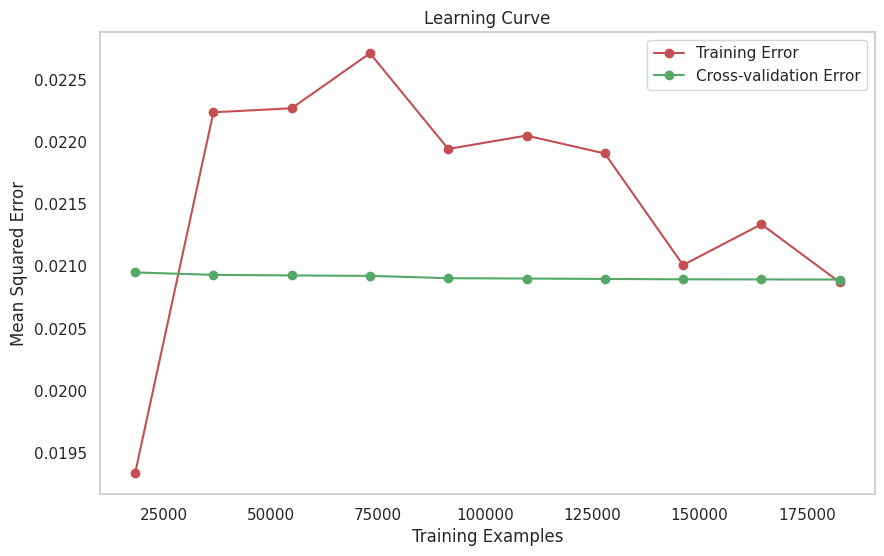

In [28]:
# Plot learning curves
plot_learning_curve(linear_regression, x_data, y_data)


In [29]:

perform_cross_validation(x_data, y_data, linear_regression)


Cross-validation RMSE scores: [0.15031332 0.1504731  0.13932733 0.14945937 0.13221763]
Mean RMSE: 0.14435815050719894


In [30]:
perform_cross_validation(x_data, y_data, randomforest_regression)

Cross-validation RMSE scores: [0.1252167  0.128776   0.12117417 0.13541796 0.12191078]
Mean RMSE: 0.12649912002962016


The rate at which testing error decreases is very low compared to the training error on increasing the sample size
Also there are large fluctuations in the training error
So we have small signs of overfitting

Building the models ontop of feature_reduced_dataset

In [100]:
feature_reduced_data.head()

serviceCharge                     heatingType telekomTvOffer  newlyConst  \
0          245.0                 central_heating  ONE_YEAR_FREE       False   
1          255.0                   floor_heating  ONE_YEAR_FREE        True   
2          138.0  self_contained_central_heating  ONE_YEAR_FREE       False   
3           70.0  self_contained_central_heating  ONE_YEAR_FREE       False   
4           88.0                 central_heating  ONE_YEAR_FREE       False   

   balcony  picturecount  pricetrend  totalRent  yearConstructed  \
0    False           6.0        4.62     840.00      1965.000000   
1     True           8.0        2.72    1300.00      2019.000000   
2     True          19.0        2.46     903.00      1950.000000   
3    False           9.0        1.01     380.00      1966.868605   
4     True           5.0        1.89     584.25      1959.000000   

       firingTypes  hasKitchen              geo_bln  yearConstructedRange  \
0              oil       False  Nordrhein_Westfalen               2.00000   
1              gas       False              Sachsen               9.00000   
2              gas       False               Bremen               1.00000   
3              gas       False              Sachsen               3.68571   
4  gas:electricity       False               Bremen               2.00000   

               geo_krs        condition   lift    typeOfFlat  geo_plz  \
0             Dortmund        well_kept  False  ground_floor    44269   
1              Dresden   first_time_use   True     apartment     1097   
2               Bremen      refurbished  False     apartment    28213   
3  Mittelsachsen_Kreis  fully_renovated  False     apartment     9599   
4               Bremen        well_kept  False  ground_floor    28717   

                       regio3  
0                     Schüren  
1  Äußere_Neustadt_Antonstadt  
2           Neu_Schwachhausen  
3                    Freiberg  
4                  St._Magnus

In [20]:
feature_reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228333 entries, 0 to 228332
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   serviceCharge         228333 non-null  float64
 1   heatingType           228333 non-null  object 
 2   telekomTvOffer        228333 non-null  object 
 3   newlyConst            228333 non-null  bool   
 4   balcony               228333 non-null  bool   
 5   picturecount          228333 non-null  float64
 6   pricetrend            228333 non-null  float64
 7   totalRent             228333 non-null  float64
 8   yearConstructed       228333 non-null  float64
 9   firingTypes           228333 non-null  object 
 10  hasKitchen            228333 non-null  bool   
 11  geo_bln               228333 non-null  object 
 12  yearConstructedRange  228333 non-null  float64
 13  geo_krs               228333 non-null  object 
 14  condition             228333 non-null  object 
 15  

In [62]:
feature_reduced_data=group_categories(feature_reduced_data,'heatingType',6)
feature_reduced_data=group_categories(feature_reduced_data,'regio3',2011)


In [63]:
for i in [feature for feature in feature_reduced_data.columns if feature_reduced_data[feature].dtype!='object' and feature_reduced_data[feature].dtype!='bool']:
    feature_reduced_data[i] = abs(np.log(abs(feature_reduced_data[i]) + 0.0001))
  

In [23]:
firingTypes_encodes=feature_reduced_data['firingTypes'].str.get_dummies(sep=':')
firingTypes_encodes


bio_energy  coal  coal_coke  combined_heat_and_power_bio_energy  \
0                0     0          0                                   0   
1                0     0          0                                   0   
2                0     0          0                                   0   
3                0     0          0                                   0   
4                0     0          0                                   0   
...            ...   ...        ...                                 ...   
228328           0     0          0                                   0   
228329           0     0          0                                   0   
228330           0     0          0                                   0   
228331           0     0          0                                   0   
228332           0     0          0                                   0   

        combined_heat_and_power_fossil_fuels  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
228328                                     0   
228329                                     0   
228330                                     0   
228331                                     0   
228332                                     0   

        combined_heat_and_power_regenerative_energy  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
228328                                            0   
228329                                            0   
228330                                            0   
228331                                            0   
228332                                            0   

        combined_heat_and_power_renewable_energy  district_heating  \
0                                              0                 0   
1                                              0                 0   
2                                              0                 0   
3                                              0                 0   
4                                              0                 0   
...                                          ...               ...   
228328                                         0                 0   
228329                                         0                 0   
228330                                         0                 0   
228331                                         0                 0   
228332                                         0                 0   

        electricity  environmental_thermal_energy  ...  local_heating  \
0                 0                             0  ...              0   
1                 0                             0  ...              0   
2                 0                             0  ...              0   
3                 0                             0  ...              0   
4                 1                             0  ...              0   
...             ...                           ...  ...            ...   
228328            0                             0  ...              0   
228329            0                             0  ...              0   
228330            0                             0  ...              0   
228331            0                             0  ...              0   
228332            0                             0  ...              0   

        natural_gas_heavy  natural_gas_light  oil  pellet_heating  \
0                       0                  0    1               0   
1            

In [107]:
typeofflat=list(feature_reduced_data['typeOfFlat'].unique())
print(len(typeofflat))
print(typeofflat)

10
['ground_floor', 'apartment', 'roof_storey', 'other', 'raised_ground_floor', 'terraced_flat', 'half_basement', 'maisonette', 'penthouse', 'loft']


In [109]:
inter_df=pd.DataFrame({'typeofflat':typeofflat})
typeofflat_e=pd.get_dummies(inter_df[['typeofflat']])
typeofflat_e


typeofflat_apartment  typeofflat_ground_floor  typeofflat_half_basement  \
0                     0                        1                         0   
1                     1                        0                         0   
2                     0                        0                         0   
3                     0                        0                         0   
4                     0                        0                         0   
5                     0                        0                         0   
6                     0                        0                         1   
7                     0                        0                         0   
8                     0                        0                         0   
9                     0                        0                         0   

   typeofflat_loft  typeofflat_maisonette  typeofflat_other  \
0                0                      0                 0   
1                0                      0                 0   
2                0                      0                 0   
3                0                      0                 1   
4                0                      0                 0   
5                0                      0                 0   
6                0                      0                 0   
7                0                      1                 0   
8                0                      0                 0   
9                1                      0                 0   

   typeofflat_penthouse  typeofflat_raised_ground_floor  \
0                     0                               0   
1                     0                               0   
2                     0                               0   
3                     0                               0   
4                     0                               1   
5                     0                               0   
6                     0                               0   
7                     0                               0   
8                     1                               0   
9                     0                               0   

   typeofflat_roof_storey  typeofflat_terraced_flat  
0                       0                         0  
1                       0                         0  
2                       1                         0  
3                       0                         0  
4                       0                         0  
5                       0                         1  
6                       0                         0  
7                       0                         0  
8                       0                         0  
9                       0                         0

In [110]:
dic_typeofflat={}
for index,row in typeofflat_e.iterrows():
    dic_typeofflat[typeofflat[index]]=[row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9]]
dic_typeofflat


{'ground_floor': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 'apartment': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'roof_storey': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'other': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 'raised_ground_floor': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'terraced_flat': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 'half_basement': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 'maisonette': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 'penthouse': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 'loft': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]}

creating a separate copy of feature_reduced_data to perform labelencoding for RFE

In [68]:

df_for_rfe=feature_reduced_data.copy(deep=True)

for feature in df_for_rfe.columns:
    if df_for_rfe[feature].dtype=='object' or df_for_rfe[feature].dtype=='bool':
       df_for_rfe[feature]=le_encoder.fit_transform(df_for_rfe[feature]) 

df_for_rfe.head()

serviceCharge  heatingType  telekomTvOffer  newlyConst  balcony  \
0       5.501259            1               1           0        0   
1       5.541264            3               1           1        1   
2       4.927254            6               1           0        1   
3       4.248497            6               1           0        0   
4       4.477338            1               1           0        1   

   picturecount  pricetrend  totalRent  yearConstructed  firingTypes  \
0      1.791776    1.530416   6.733402         7.583248           81   
1      2.079454    1.000669   7.170120         7.610358           37   
2      2.944444    0.900202   6.805723         7.575585           37   
3      2.197236    0.010049   5.940172         7.584198           37   
4      1.609458    0.636630   6.370329         7.580189           43   

   hasKitchen  geo_bln  yearConstructedRange  geo_krs  condition  lift  \
0           0        9              0.693197       79          9     0   
1           0       12              2.197236       80          0     1   
2           0        4              0.000100       49          7     0   
3           0       12              1.304490      230          2     0   
4           0        4              0.693197       49          9     0   

   typeOfFlat    geo_plz  regio3  
0           1  10.698040    1619  
1           0   7.000335    2005  
2           0  10.247538    1220  
3           0   9.169414     510  
4           1  10.265245    1673

In [29]:
a=df_for_rfe.drop('totalRent',axis=1)
b=df_for_rfe['totalRent']



a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.30,random_state=42)

m1=LinearRegression()
m2=GradientBoostingRegressor()

selector1=RFE(m1,n_features_to_select=10,step=1)
selector2=RFE(m2,n_features_to_select=10,step=1)

selector_1=selector1.fit(a_train,b_train)

selector_2=selector2.fit(a_train,b_train)


In [30]:
print(selector_1.support_)
print(selector_1.ranking_)
print('-'*70)
print(selector_2.support_)
print(selector_2.ranking_)


[ True False False  True  True  True False  True False  True  True  True
 False False  True False  True False]
[1 3 5 1 1 1 4 1 7 1 1 1 8 2 1 6 1 9]
----------------------------------------------------------------------
[ True False False False  True  True  True  True False  True  True False
  True  True False False  True False]
[1 4 9 8 1 1 1 1 7 1 1 3 1 1 6 2 1 5]


From the above experiment features with RFE value greater than 5 are considered for elemination

In [24]:
feature_reduced_data.drop(['telekomTvOffer','newlyConst','yearConstructed','lift'],axis=1,inplace=True)

In [25]:
encodes=pd.get_dummies(feature_reduced_data[['heatingType','geo_bln','condition','typeOfFlat']])

In [26]:
feature_reduced_data=pd.concat([feature_reduced_data,firingTypes_encodes],axis=1)
feature_reduced_data=pd.concat([feature_reduced_data,encodes],axis=1)


In [27]:

feature_reduced_data.drop(['firingTypes','heatingType','geo_bln','condition','typeOfFlat'],axis=1,inplace=True)



for feature in feature_reduced_data.columns:
    if feature_reduced_data[feature].dtype=='object' or feature_reduced_data[feature].dtype=='bool':

        keys=feature_reduced_data[feature].tolist()

        feature_reduced_data[feature]=le_encoder.fit_transform(feature_reduced_data[feature])

        values=feature_reduced_data[feature].tolist()

        dic={key: value for key,value in zip(keys,values)}
        print(feature)
        print(dic)


balcony
{False: 0, True: 1}
hasKitchen
{False: 0, True: 1}
geo_krs
{'Dortmund': 79, 'Dresden': 80, 'Bremen': 49, 'Mittelsachsen_Kreis': 230, 'Emmendingen_Kreis': 90, 'Chemnitz': 57, 'Südliche_Weinstraße_Kreis': 367, 'Hamm': 139, 'Weimar': 395, 'Main_Kinzig_Kreis': 212, 'Göttingen_Kreis': 131, 'Neumünster': 245, 'Stuttgart': 363, 'Leipzig': 197, 'München': 236, 'Hamburg': 137, 'Braunschweig': 47, 'Esslingen_Kreis': 100, 'Magdeburg': 211, 'Schwerin': 342, 'Passau': 285, 'Mettmann_Kreis': 226, 'Vogtlandkreis': 387, 'Groß_Gerau_Kreis': 127, 'Sächsische_Schweiz_Osterzgebirge_Kreis': 365, 'Görlitz_Kreis': 130, 'Rheinisch_Bergischer_Kreis': 314, 'Essen': 99, 'Mannheim': 218, 'Hochsauerlandkreis': 159, 'Bautzen_Kreis': 30, 'Berlin': 35, 'Frankfurt_am_Main': 106, 'Halle_Saale': 136, 'Steinburg_Kreis': 356, 'Oder_Spree_Kreis': 267, 'Bremerhaven': 50, 'Zwickau_Kreis': 418, 'Nordsachsen_Kreis': 255, 'Mansfeld_Südharz_Kreis': 219, 'Alzey_Worms_Kreis': 9, 'Gießen_Kreis': 120, 'Main_Taunus_Kreis': 21

In [73]:
pd.set_option('display.max_columns',None)
feature_reduced_data.head()   

serviceCharge  balcony  picturecount  pricetrend  totalRent  hasKitchen  \
0       5.501259        0      1.791776    1.530416   6.733402           0   
1       5.541264        1      2.079454    1.000669   7.170120           0   
2       4.927254        1      2.944444    0.900202   6.805723           0   
3       4.248497        0      2.197236    0.010049   5.940172           0   
4       4.477338        1      1.609458    0.636630   6.370329           0   

   yearConstructedRange  geo_krs    geo_plz  regio3  bio_energy  coal  \
0              0.693197       79  10.698040    1619           0     0   
1              2.197236       80   7.000335    2005           0     0   
2              0.000100       49  10.247538    1220           0     0   
3              1.304490      230   9.169414     510           0     0   
4              0.693197       49  10.265245    1673           0     0   

   coal_coke  combined_heat_and_power_bio_energy  \
0          0                                   0   
1          0                                   0   
2          0                                   0   
3          0                                   0   
4          0                                   0   

   combined_heat_and_power_fossil_fuels  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   combined_heat_and_power_regenerative_energy  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   combined_heat_and_power_renewable_energy  district_heating  electricity  \
0                                         0                 0            0   
1                                         0                 0            0   
2                                         0                 0            0   
3                                         0                 0            0   
4                                         0                 0            1   

   environmental_thermal_energy  gas  geothermal  heat_supply  hydro_energy  \
0                             0    0           0            0             0   
1                             0    1           0            0             0   
2                             0    1           0            0             0   
3                             0    1           0            0             0   
4                             0    1           0            0             0   

   liquid_gas  local_heating  natural_gas_heavy  natural_gas_light  oil  \
0           0              0                  0                  0    1   
1           0              0                  0                  0    0   
2           0              0                  0                  0    0   
3           0              0                  0                  0    0   
4           0              0                  0                  0    0   

   pellet_heating  solar_heating  steam_district_heating  wind_energy  wood  \
0               0              0                       0            0     0   
1               0              0                       0            0     0   
2               0              0                       0            0     0   
3               0              0                       0            0     0   
4               0              0                       0            0     0   

   wood_chips  heatingType_Other  heatingType_central_heating  \
0           0                  0                            1   
1           0                  0                            0   
2           0                  0                            0   
3           0                  0                            0   
4           0              

In [74]:
x=feature_reduced_data.drop('totalRent',axis=1)
y=feature_reduced_data['totalRent']



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [67]:
linear_regressionf=LinearRegression()

linear_regressionf.fit(x_train,y_train)

y_pred_test=linear_regressionf.predict(x_test)
y_pred_train=linear_regressionf.predict(x_train)

print(f'r2 score for the test set using linear_regression : {r2_score(y_test,y_pred_test)}')
print(f'r2 score for the train set using linear_regression : {r2_score(y_train,y_pred_train)}')
print('-'*50)
print(f'MAPE for the test set using linear_regression : {mean_absolute_percentage_error(y_test,y_pred_test)}')
print(f'MAPE for the train set using linear_regression : {mean_absolute_percentage_error(y_train,y_pred_train)}')
print('-'*50)
print(f'MAE for the test set using linear_regression : {mean_absolute_error(y_test,y_pred_test)}')
print(f'MAE for the train set using linear_regression : {mean_absolute_error(y_train,y_pred_train)}')
print('-'*50)
print(f'MSE for the test set using linear_regression : {mean_squared_error(y_test,y_pred_test)}')
print(f'MSE score for the train set using linear_regression : {mean_squared_error(y_train,y_pred_train)}')
       

r2 score for the test set using linear_regression : 0.5796338318050308
r2 score for the train set using linear_regression : 0.5779700086115711
--------------------------------------------------
MAPE for the test set using linear_regression : 0.04090989358555372
MAPE for the train set using linear_regression : 2.932706434169359
--------------------------------------------------
MAE for the test set using linear_regression : 0.24084661727036377
MAE for the train set using linear_regression : 0.2419585871026141
--------------------------------------------------
MSE for the test set using linear_regression : 0.10990725557379308
MSE score for the train set using linear_regression : 0.11046370823895446


In [68]:
randomforest_regressionf=RandomForestRegressor()

randomforest_regressionf.fit(x_train,y_train)

y_pred_test=randomforest_regressionf.predict(x_test)
y_pred_train=randomforest_regressionf.predict(x_train)

print(f'r2 score for the test set using randomforest_regressor : {r2_score(y_test,y_pred_test)}')
print(f'r2 score for the train set using randomforest_regressor : {r2_score(y_train,y_pred_train)}')
print('-'*50)
print(f'MAPE for the test set using randomforest_regressor : {mean_absolute_percentage_error(y_test,y_pred_test)}')
print(f'MAPE for the train set using randomforest_regressor : {mean_absolute_percentage_error(y_train,y_pred_train)}')
print('-'*50)
print(f'MAE for the test set using randomforest_regressor : {mean_absolute_error(y_test,y_pred_test)}')
print(f'MAE for the train set using randomforest_regressor : {mean_absolute_error(y_train,y_pred_train)}')
print('-'*50)
print(f'MSE for the test set using randomforest_regressor : {mean_squared_error(y_test,y_pred_test)}')
print(f'MSE score for the train set randomforest_regressor : {mean_squared_error(y_train,y_pred_train)}')
       

r2 score for the test set using randomforest_regressor : 0.7641536977142035
r2 score for the train set using randomforest_regressor : 0.9668750956381944
--------------------------------------------------
MAPE for the test set using randomforest_regressor : 0.029350382682458192
MAPE for the train set using randomforest_regressor : 1.0241743224743582
--------------------------------------------------
MAE for the test set using randomforest_regressor : 0.1637112862489112
MAE for the train set using randomforest_regressor : 0.06124704081277175
--------------------------------------------------
MSE for the test set using randomforest_regressor : 0.06166343008231011
MSE score for the train set randomforest_regressor : 0.008670236347013516


In [69]:
decisiontree_regressionf=DecisionTreeRegressor()

decisiontree_regressionf.fit(x_train,y_train)

y_pred_test=decisiontree_regressionf.predict(x_test)
y_pred_train=decisiontree_regressionf.predict(x_train)

print(f'r2 score for the test set using decisiontree_regressor : {r2_score(y_test,y_pred_test)}')
print(f'r2 score for the train set using decisiontree_regressor : {r2_score(y_train,y_pred_train)}')
print('-'*50)
print(f'MAPE for the test set using decisiontree_regressor : {mean_absolute_percentage_error(y_test,y_pred_test)}')
print(f'MAPE for the train set using decisiontree_regressor : {mean_absolute_percentage_error(y_train,y_pred_train)}')
print('-'*50)
print(f'MAE for the test set using decisiontree_regressor : {mean_absolute_error(y_test,y_pred_test)}')
print(f'MAE for the train set using decisiontree_regressor : {mean_absolute_error(y_train,y_pred_train)}')
print('-'*50)
print(f'MSE for the test set using decisiontree_regressor : {mean_squared_error(y_test,y_pred_test)}')
print(f'MSE score for the train set decisiontree_regressor : {mean_squared_error(y_train,y_pred_train)}')
       

r2 score for the test set using decisiontree_regressor : 0.504951416267732
r2 score for the train set using decisiontree_regressor : 0.9998781867059822
--------------------------------------------------
MAPE for the test set using decisiontree_regressor : 0.039426871275211196
MAPE for the train set using decisiontree_regressor : 4.92418688143659e-05
--------------------------------------------------
MAE for the test set using decisiontree_regressor : 0.22934400165669314
MAE for the train set using decisiontree_regressor : 0.0003156831791670364
--------------------------------------------------
MSE for the test set using decisiontree_regressor : 0.12943342097994706
MSE score for the train set decisiontree_regressor : 3.188386712930636e-05


In [70]:
gradientboosting_regressionf=GradientBoostingRegressor()

gradientboosting_regressionf.fit(x_train,y_train)

y_pred_test=gradientboosting_regressionf.predict(x_test)
y_pred_train=gradientboosting_regressionf.predict(x_train)

print(f'r2 score for the test set using gradientboosting_regressor : {r2_score(y_test,y_pred_test)}')
print(f'r2 score for the train set using gradientboosting_regressor : {r2_score(y_train,y_pred_train)}')
print('-'*50)
print(f'MAPE for the test set using gradientboosting_regressor : {mean_absolute_percentage_error(y_test,y_pred_test)}')
print(f'MAPE for the train set using gradientboosting_regressor : {mean_absolute_percentage_error(y_train,y_pred_train)}')
print('-'*50)
print(f'MAE for the test set using gradientboosting_regressor : {mean_absolute_error(y_test,y_pred_test)}')
print(f'MAE for the train set using gradientboosting_regressor : {mean_absolute_error(y_train,y_pred_train)}')
print('-'*50)
print(f'MSE for the test set using gradientboosting_regressor : {mean_squared_error(y_test,y_pred_test)}')
print(f'MSE score for the train set gradientboosting_regressor : {mean_squared_error(y_train,y_pred_train)}')
       

r2 score for the test set using gradientboosting_regressor : 0.7227864979837509
r2 score for the train set using gradientboosting_regressor : 0.7241535072890917
--------------------------------------------------
MAPE for the test set using gradientboosting_regressor : 0.033228588121354735
MAPE for the train set using gradientboosting_regressor : 2.9119118857024056
--------------------------------------------------
MAE for the test set using gradientboosting_regressor : 0.1886629494449233
MAE for the train set using gradientboosting_regressor : 0.187977572098772
--------------------------------------------------
MSE for the test set using gradientboosting_regressor : 0.07247913252732292
MSE score for the train set gradientboosting_regressor : 0.07220109260318341


In [71]:
extreme_gradientboostingf=xgb.XGBRegressor(objective='reg:squarederror',random_state=42)

extreme_gradientboostingf.fit(x_train,y_train)

y_pred_test=extreme_gradientboostingf.predict(x_test)
y_pred_train=extreme_gradientboostingf.predict(x_train)

print(f'r2 score for the test set using extreme_gradientboosting_regressor : {r2_score(y_test,y_pred_test)}')
print(f'r2 score for the train set using extreme_gradientboosting_regressor : {r2_score(y_train,y_pred_train)}')
print('-'*50)
print(f'MAPE for the test set using extreme_gradientboosting_regressor : {mean_absolute_percentage_error(y_test,y_pred_test)}')
print(f'MAPE for the train set using extreme_gradientboosting_regressor : {mean_absolute_percentage_error(y_train,y_pred_train)}')
print('-'*50)
print(f'MAE for the test set using extreme_gradientboosting_regressor : {mean_absolute_error(y_test,y_pred_test)}')
print(f'MAE for the train set using extreme_gradientboosting_regressor : {mean_absolute_error(y_train,y_pred_train)}')
print('-'*50)
print(f'MSE for the test set using extreme_gradientboosting_regressor : {mean_squared_error(y_test,y_pred_test)}')
print(f'MSE score for the train set extreme_gradientboosting_regressor : {mean_squared_error(y_train,y_pred_train)}')
       

r2 score for the test set using extreme_gradientboosting_regressor : 0.7706202252654569
r2 score for the train set using extreme_gradientboosting_regressor : 0.8092671901316458
--------------------------------------------------
MAPE for the test set using extreme_gradientboosting_regressor : 0.029914701489808307
MAPE for the train set using extreme_gradientboosting_regressor : 2.297058400565182
--------------------------------------------------
MAE for the test set using extreme_gradientboosting_regressor : 0.1669287756209247
MAE for the train set using extreme_gradientboosting_regressor : 0.15530666653515277
--------------------------------------------------
MSE for the test set using extreme_gradientboosting_regressor : 0.05997271767483361
MSE score for the train set extreme_gradientboosting_regressor : 0.04992311895080998


Plotting learning curves for the models

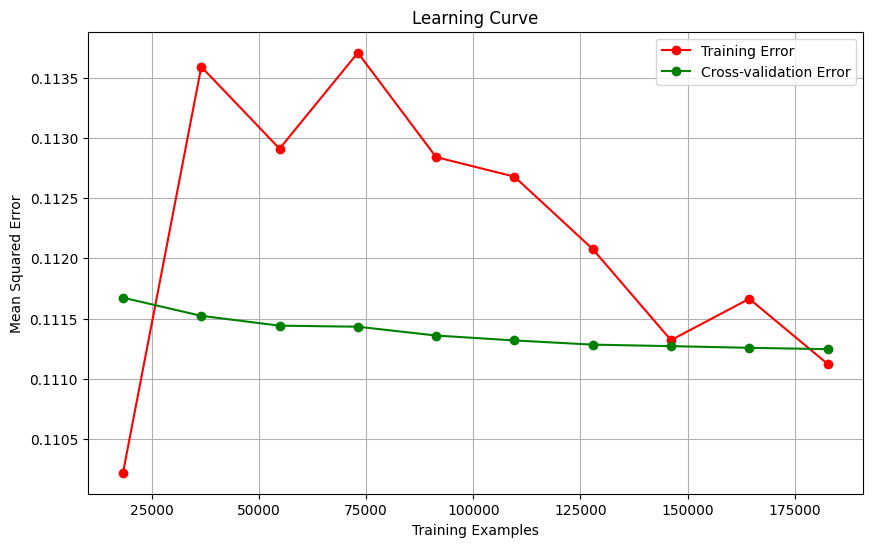

In [63]:
plot_learning_curve(linear_regressionf, x, y)

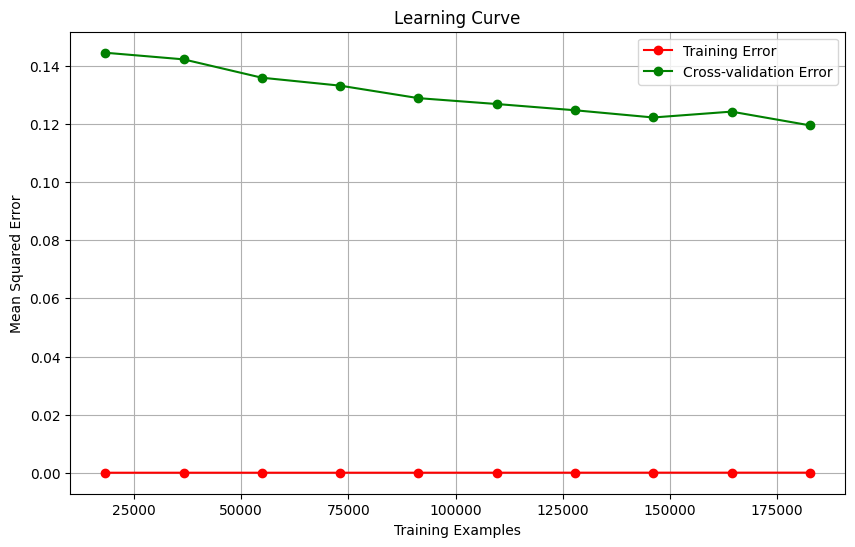

In [64]:
plot_learning_curve(decisiontree_regressionf, x, y)

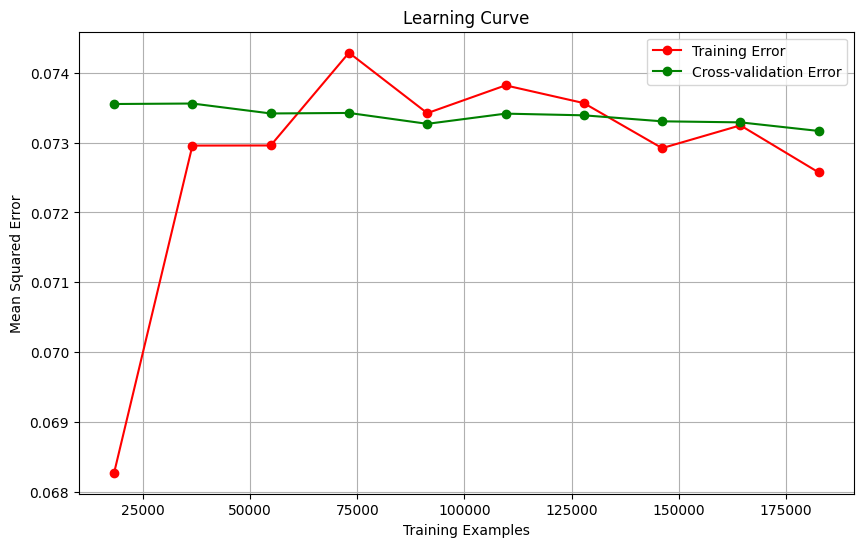

In [65]:
plot_learning_curve(gradientboosting_regressionf, x, y)

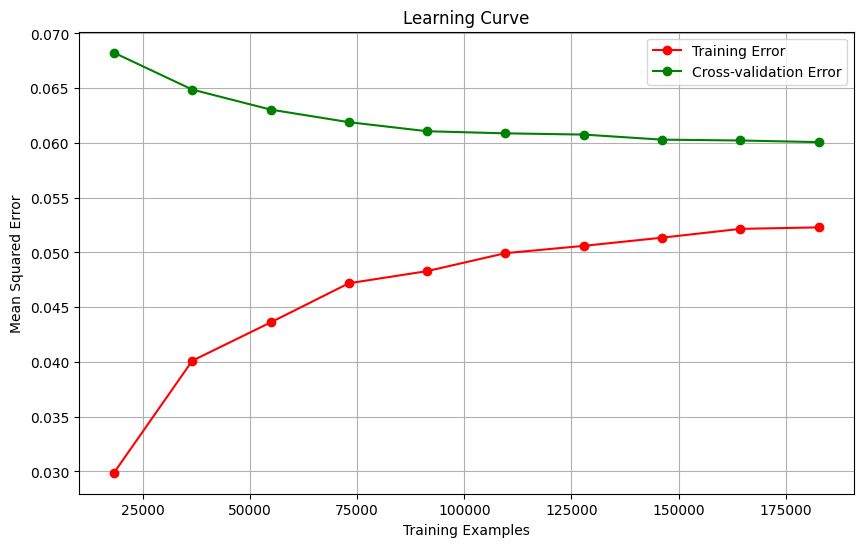

In [66]:
plot_learning_curve(extreme_gradientboostingf, x, y)

From the evaluation of models and learning-curves

1) Linear regression has a fairly good learning curve,but have a higher error range and low r2 score.

2) The RandomForestRegressor and DecisionTreeRegressor are highly overfitting the training data,
    There is a huge gap in between the training error curve and the cross-validation error curve training data is being memmorised and it fails to perform well on unseen data.

3) The learning curve of GradientBoostingRegressor looks fine but both converges at a higher error range,

4) The extreme ExtremeGradientBoostingRegressor is also overfitting the training data

So we can choose GradientBoostingRegressor with some hyperparameter tuning as our final model

It seems that the GradientBoostingRegressor model is performing well on the dataset

Tuning the hyperparameters of GradientBoostingRegressor to increase the model performance

The default hyperparameters of GradientBoostingRegressor are:

    loss='ls',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='deprecated',
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,


In [41]:

model=GradientBoostingRegressor()

param_grid = {
    'n_estimators': [125,150],     
    'learning_rate': [0.09,0.1],    
    'max_depth': [5,7],             
    'min_samples_split': [2,5],    
    'min_samples_leaf': [1,2],        
    'subsample': [0.7, 1.0]         
}
grid_search=GridSearchCV(model,
                         param_grid,scoring='neg_mean_squared_error',
                         cv=3,
                         n_jobs=-1,
                         verbose=2)


grid_search.fit(x_train,y_train)

best_par=grid_search.best_params_

print(f'Best hyperparameters are : {best_par}')


Fitting 3 folds for each of 64 candidates, totalling 192 fits


[CV] END learning_rate=0.09, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=125, subsample=0.7; total time= 2.0min
[CV] END learning_rate=0.09, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=125, subsample=0.7; total time= 2.1min
[CV] END learning_rate=0.09, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=125, subsample=0.7; total time= 2.2min
[CV] END learning_rate=0.09, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=125, subsample=1.0; total time= 2.6min
[CV] END learning_rate=0.09, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=125, subsample=1.0; total time= 2.6min
[CV] END learning_rate=0.09, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.7; total time= 2.5min
[CV] END learning_rate=0.09, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=125, subsample=1.0; total time= 3.0min
[CV] END learning_rate=0.09, max_depth=5, min_samples_l

In [75]:
# Manually fine tuned by trial and error

final_model=GradientBoostingRegressor(
    learning_rate=0.03,
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=7,
    n_estimators=900,
    subsample=0.3
)

final_model.fit(x_train,y_train)



GradientBoostingRegressor(learning_rate=0.03, max_depth=5, min_samples_leaf=5,
                          min_samples_split=7, n_estimators=900, subsample=0.3)

In [76]:
y_pred_test=final_model.predict(x_test)
y_pred_train=final_model.predict(x_train)

print("r2 score for test data is : ",r2_score(y_test,y_pred_test))
print("r2 score for train data is : ",r2_score(y_train,y_pred_train))
print('-'*50)
print("Mean_Absolute_Persentage_Error for test data is : ",mean_absolute_percentage_error(y_test,y_pred_test))
print("Mean_Absolute_Persentage_Error for train data is : ",mean_absolute_percentage_error(y_train,y_pred_train))
print('-'*50)
print('Mean_Absolute_Error for the test data is : ',mean_absolute_error(y_test,y_pred_test))
print('Mean_Absolute_Error for the train data is : ',mean_absolute_error(y_train,y_pred_train))
print('-'*50)
print('Mean_Squared_Error for the test set using : ',mean_squared_error(y_test,y_pred_test))
print('Mean_Squared_Error score for the train set using : ',mean_squared_error(y_train,y_pred_train))
print('-'*150)

r2 score for test data is :  0.7701383601251166
r2 score for train data is :  0.7815781396220731
--------------------------------------------------
Mean_Absolute_Persentage_Error for test data is :  0.02991393815385578
Mean_Absolute_Persentage_Error for train data is :  2.9688851004688157
--------------------------------------------------
Mean_Absolute_Error for the test data is :  0.16730796774949258
Mean_Absolute_Error for the train data is :  0.16392036990274714
--------------------------------------------------
Mean_Squared_Error for the test set using :  0.060098704205478776
Mean_Squared_Error score for the train set using :  0.0573258527277142
------------------------------------------------------------------------------------------------------------------------------------------------------


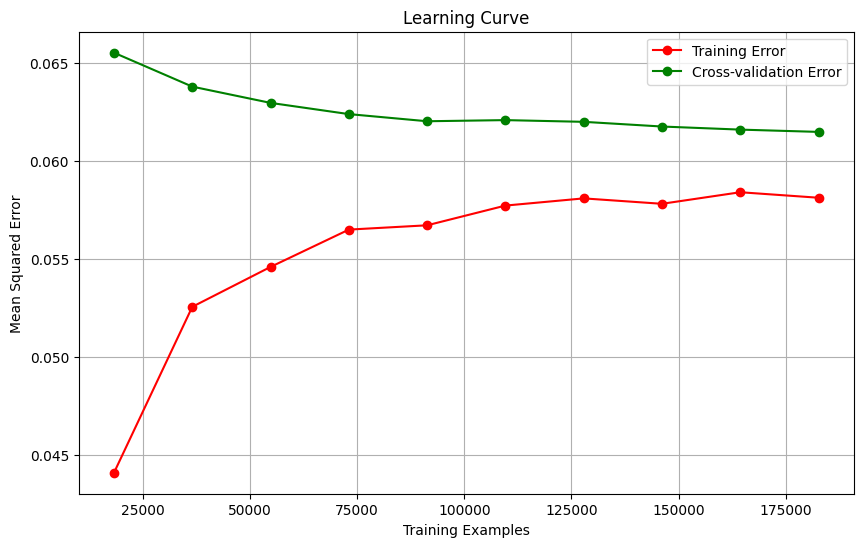

In [99]:
plot_learning_curve(final_model, x, y)

In [39]:
# creating a pkl file

import joblib

joblib.dump(final_model,'model.pkl')

['model.pkl']

Testing the performance of artificial neural network(ANN)

In [59]:

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)



model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

loss, mae = model.evaluate(x_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

predictions = model.predict(x_test)

r2 = r2_score(y_test, predictions)
print(f'r2 Score on Test Set: {r2}')
print("MAPE is",mean_absolute_percentage_error(y_test,predictions))


Epoch 1/100
3497/3497 [==============================] - 12s 3ms/step - loss: 14.3613 - mae: 0.7417 - val_loss: 0.2095 - val_mae: 0.3548
Epoch 2/100
3497/3497 [==============================] - 11s 3ms/step - loss: 0.2273 - mae: 0.3601 - val_loss: 0.1398 - val_mae: 0.2756
Epoch 3/100
3497/3497 [==============================] - 11s 3ms/step - loss: 0.2575 - mae: 0.3841 - val_loss: 0.1763 - val_mae: 0.3174
Epoch 4/100
3497/3497 [==============================] - 12s 3ms/step - loss: 0.2471 - mae: 0.3753 - val_loss: 0.1621 - val_mae: 0.3019
Epoch 5/100
3497/3497 [==============================] - 9s 2ms/step - loss: 0.2447 - mae: 0.3746 - val_loss: 0.2909 - val_mae: 0.4351
Epoch 6/100
3497/3497 [==============================] - 9s 3ms/step - loss: 0.2335 - mae: 0.3643 - val_loss: 0.2097 - val_mae: 0.3572
Epoch 7/100
3497/3497 [==============================] - 9s 2ms/step - loss: 0.2301 - mae: 0.3621 - val_loss: 0.2484 - val_mae: 0.3988
Epoch 8/100
3497/3497 [===========================

# CONCLUSION:
We have successfully created a Regression model for predicting the rental prices of houses in Germany using GradientBoostingRegressor,The model initially had a r2 score of 0.720 and an MAPE of 0.033 in the testing dataset.

We have tuned the hyperparameters and achieved a r2 score of 0.770 and an MAPE of 0.029 in the test set
At the same time has got an r2 score of 0.782 and MAPE of 3.01 and the patterns in the learning curve shows a slight overfitting of the training data
But we have a decreasing cross-validation error curve and training error curve which might converge indicating a well generalized model
and that can be found out by training the model with more data and better regularization of the model.

Check the implimation of this machile learning model,using python-flask micro framework below:

https://germanatliv.onrender.com